In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [15, 8]

In [2]:
df = pd.read_csv('Data.csv', delimiter = ";")
df.head()

,player_id,name,nationality,position,overall,age,hits,potential,team
0,158023,Lionel Messi,Argentina,ST|CF|RW,94,33,299,94,FC Barcelona
1,20801,Cristiano Ronaldo,Portugal,ST|LW,93,35,276,93,Juventus
2,190871,Neymar Jr,Brazil,CAM|LW,92,28,186,92,Paris Saint-Germain
3,203376,Virgil van Dijk,Netherlands,CB,91,29,127,92,Liverpool
4,200389,Jan Oblak,Slovenia,GK,91,27,47,93,Atlético Madrid


In [3]:
df['age'] = df['age'].astype(float)

In [4]:
df.shape

(17981, 9)

In [5]:
df.drop(columns = 'player_id', inplace= True)

---------------------------------

# Top 10 Teams 

In [6]:
# List of top 10 teams
top_10_teams = ['FC Bayern München', 'Real Madrid', 'Liverpool', 'Manchester City', 'FC Barcelona', 'Chelsea',
                'Paris Saint-Germain', 'Borussia Dortmund', 'Atlético Madrid', 'Juventus']

team_players = {}

# Loop through the top 10 teams and extract player details
for team_name in top_10_teams:
    # Remove leading/
    # trailing whitespaces from the 'team' column
    df['team'] = df['team'].str.strip()

    # Filter the dataframe to get players from the specified team
    team_players[team_name] = df.loc[df['team'] == team_name]

# Create a new DataFrame to store the results
top_10 = pd.concat(team_players.values(), ignore_index=True)

# Print the result DataFrame
top_10.head()

,name,nationality,position,overall,age,hits,potential,team
0,Robert Lewandowski,Poland,ST,91,31.0,89,91,FC Bayern München
1,Manuel Neuer,Germany,GK,89,34.0,42,89,FC Bayern München
2,Joshua Kimmich,Germany,RB|CDM|CM,87,25.0,82,90,FC Bayern München
3,Thiago,Spain,CDM|CM,86,29.0,47,86,FC Bayern München
4,Niklas Süle,Germany,CB,85,24.0,42,90,FC Bayern München


In [7]:
top_10.team.value_counts()

Real Madrid            33
Liverpool              33
FC Barcelona           33
Atlético Madrid        33
Manchester City        32
Chelsea                32
Paris Saint-Germain    30
Borussia Dortmund      30
FC Bayern München      23
Juventus               23
Name: team, dtype: int64

-----------------------------------------------------

# Performance Analysis

In [8]:
top_10['position'].unique()

array(['ST', 'GK', 'RB|CDM|CM', 'CDM|CM', 'CB', 'RM|LM|RW', 'RM|CAM|RW',
       'CM|CAM|LW', 'LB|CB', 'RM|LM|LW', 'CDM|CM|CAM', 'LM|LW', 'CB|CDM',
       'RB|CB', 'RB', 'LB|RM|LM', 'CM', 'ST|RM|LM', 'ST|CAM|CF', 'ST|LW',
       'CDM', 'ST|CF', 'ST|RW|LW', 'RM|CM|CAM', 'LB', 'RW|LW', 'RB|LB|CB',
       'RM|RW', 'LW', 'CAM|CF', 'CB|LWB|LW', 'LM|CM|CAM', 'LB|LW',
       'ST|RW', 'CF', 'RB|LB|CM', 'RM|CM', 'ST|RM|CAM', 'RW', 'LB|LM|CM',
       'CM|CAM', 'CM|CAM|RW', 'CAM', 'ST|CF|RW', 'ST|CF|LW', 'RB|CM',
       'LB|LM', 'ST|LM', 'LM|CM', 'LM|CAM', 'CM|LW', 'RM|RW|LW',
       'LB|LWB|LW', 'LM|RW|LW', 'RB|CDM', 'CAM|LW', 'CAM|RW', 'RB|RM',
       'RWB|RB|RW', 'RM|LM|CAM', 'RM|LM|CF', 'RB|LB|RM', 'CM|CAM|CF',
       'LB|LWB|LM|LW', 'LB|LM|LW', 'RM|LM|CM', 'LM', 'ST|RM', 'ST|LM|CF',
       'RM|LM', 'CB|CM', 'RB|RM|RW', 'RM|CAM', 'RB|LB'], dtype=object)

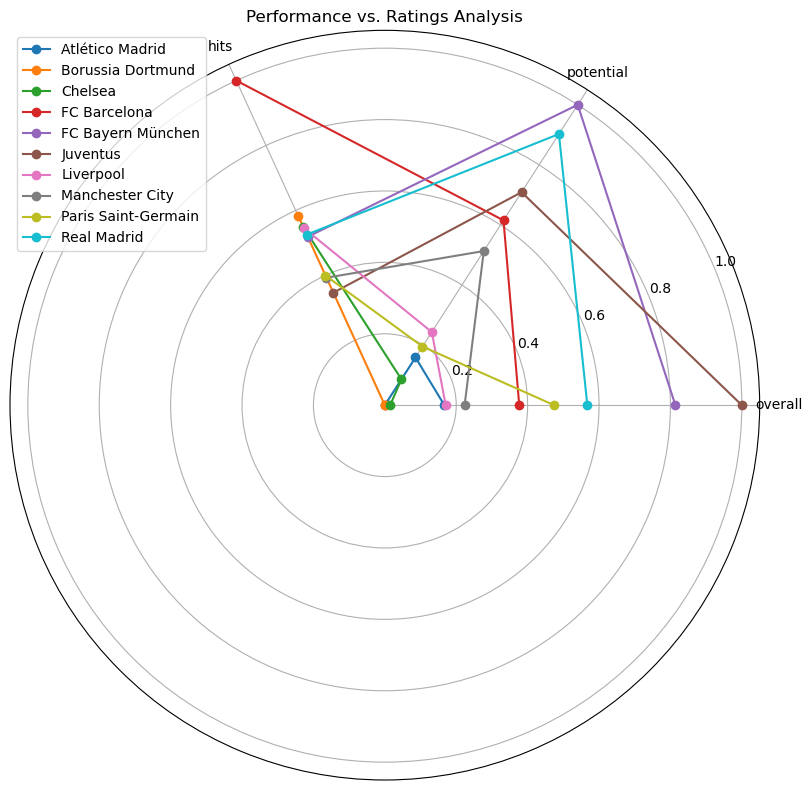

In [9]:
# Assume performance metrics such as 'goals' and 'assists' are available in the dataset
performance_metrics = ['overall', 'potential', 'hits']

# Calculate average ratings and performance metrics for each team
team_performance = top_10.groupby('team').agg({'overall': 'mean', 'potential': 'mean', 'hits': 'sum'})

# Normalize the performance metrics for visualization
normalized_performance = (team_performance[performance_metrics] - team_performance[performance_metrics].min()) / (team_performance[performance_metrics].max() - team_performance[performance_metrics].min())

# Plot a radar chart to compare ratings and performance metrics
for team in team_performance.index:
    plt.polar(performance_metrics, normalized_performance.loc[team], marker='o', label=team)
plt.title('Performance vs. Ratings Analysis')
plt.legend()
plt.tight_layout()
plt.show()


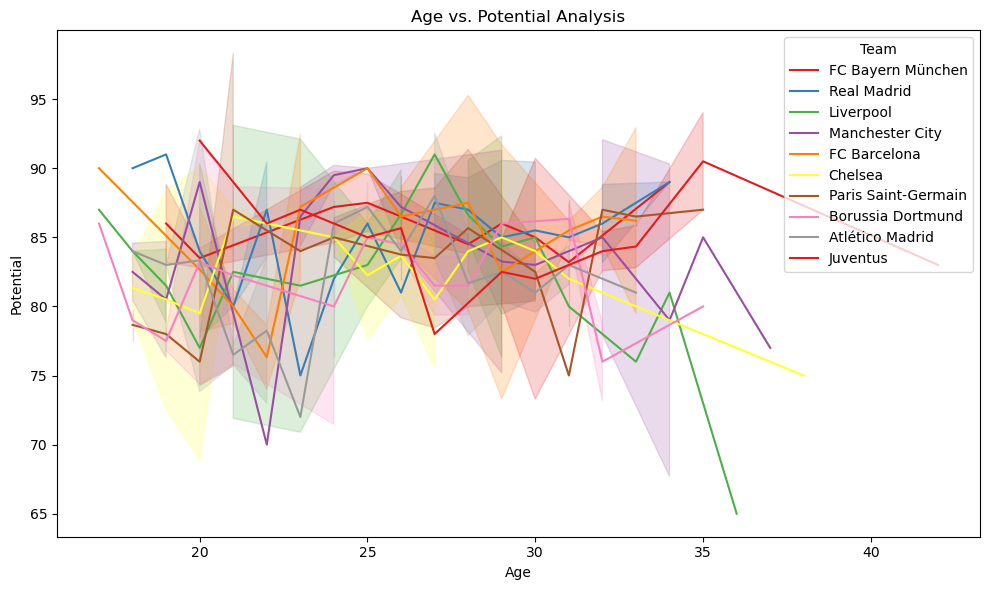

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a line plot with shaded areas for Age vs. Potential analysis
plt.figure(figsize=(10, 6))
sns.lineplot(x='age', y='potential', data=top_10, errorbar='sd', hue='team', palette='Set1')
plt.title('Age vs. Potential Analysis')
plt.xlabel('Age')
plt.ylabel('Potential')
plt.legend(title='Team')
plt.tight_layout()
plt.show()


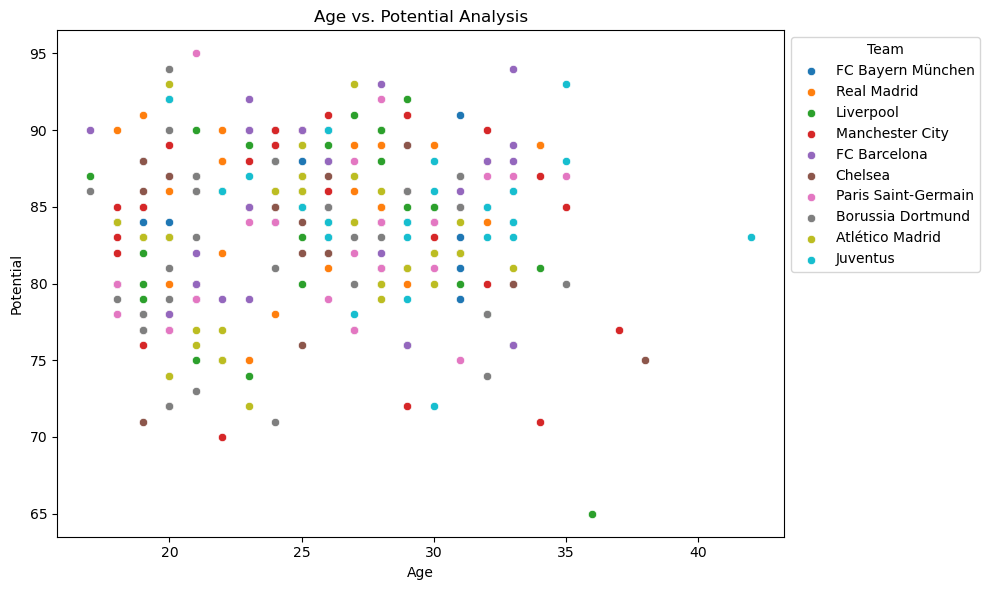

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create individual scatter plots for Age vs. Potential analysis for each team
plt.figure(figsize=(10, 6))
for team in top_10_teams:
    team_data = df[df['team'] == team]
    sns.scatterplot(x='age', y='potential', data=team_data, label=team)
    
plt.title('Age vs. Potential Analysis')
plt.xlabel('Age')
plt.ylabel('Potential')
plt.legend(title='Team', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()


In [12]:
top_10['team'].value_counts()

Real Madrid            33
Liverpool              33
FC Barcelona           33
Atlético Madrid        33
Manchester City        32
Chelsea                32
Paris Saint-Germain    30
Borussia Dortmund      30
FC Bayern München      23
Juventus               23
Name: team, dtype: int64

---------------------------------

In [13]:
Barca = top_10[top_10['team'] == 'FC Barcelona']
Real_Madrid = top_10[top_10['team'] == 'Real Madrid']
Liverpool = top_10[top_10['team'] == 'Liverpool']
Atlético_Madrid = top_10[top_10['team'] == 'Atlético Madrid']
Man_City = top_10[top_10['team'] == 'Manchester City']
Chelsea = top_10[top_10['team'] == 'Chelsea']
PSG = top_10[top_10['team'] == 'Paris Saint-Germain']
Borussi_Dortmund = top_10[top_10['team'] == 'Borussia Dortmund']
Bayern_Munich = top_10[top_10['team'] == 'FC Bayern München']
Juventus = top_10[top_10['team'] == 'Juventus']

With FIFA, sometimes it's best to just dive right in. You don't want to necessarily go through all the effort of compiling all the superstars in FIFA Ultimate Team, you don't want to start crunching numbers and stare at stat screen all evening – no, you just want to play.
Lucky for you, then, there is a pretty decent selection of teams that boast a 5-star rating in FIFA 21. Though they all sit atop the rankings mountain, clapping each other on the back and showing off their star players, each team excels for slightly different reasons compared to their erstwhile stablemates.

The ratings listed below are based on the base version of the game and don't take into account the weekly live data that can alter standings little by little over time. Either way, there shouldn't be too much of a change over time to the teams listed and profiled below.

## 1. Bayern Munich

Bayern Munich are getting better every year, and that's reflected here, too.

Attack: 93  <br>
Midfield: 85  <br>
Defence: 81  <br>

Bayern's place at the top of the pile isn't surprising; the team has been on an upward trajectory since 2019 – despite Borussia Dortmund's best efforts in the Bundesliga. The remarkable stat package listed above is down to some frankly inhuman individual player stats (we're looking at you, Lewandowski).
Between the immeasurable talent the team has up front, the rapid support out on the wings with Serge Gnabry and Leroy Sane, and the solid core of Goretzka and Kimmich, and player picking up Dortmund this year is certain to have a whale of a time.

In [14]:
Bayern_Munich

,name,nationality,position,overall,age,hits,potential,team
0,Robert Lewandowski,Poland,ST,91,31.0,89,91,FC Bayern München
1,Manuel Neuer,Germany,GK,89,34.0,42,89,FC Bayern München
2,Joshua Kimmich,Germany,RB|CDM|CM,87,25.0,82,90,FC Bayern München
3,Thiago,Spain,CDM|CM,86,29.0,47,86,FC Bayern München
4,Niklas Süle,Germany,CB,85,24.0,42,90,FC Bayern München
5,Serge Gnabry,Germany,RM|LM|RW,85,25.0,79,87,FC Bayern München
6,Thomas Müller,Germany,RM|CAM|RW,85,30.0,23,85,FC Bayern München
7,Coutinho,Brazil,CM|CAM|LW,85,28.0,49,85,FC Bayern München
8,Lucas Hernández,France,LB|CB,84,24.0,47,89,FC Bayern München
9,Kingsley Coman,France,RM|LM|LW,84,24.0,65,88,FC Bayern München


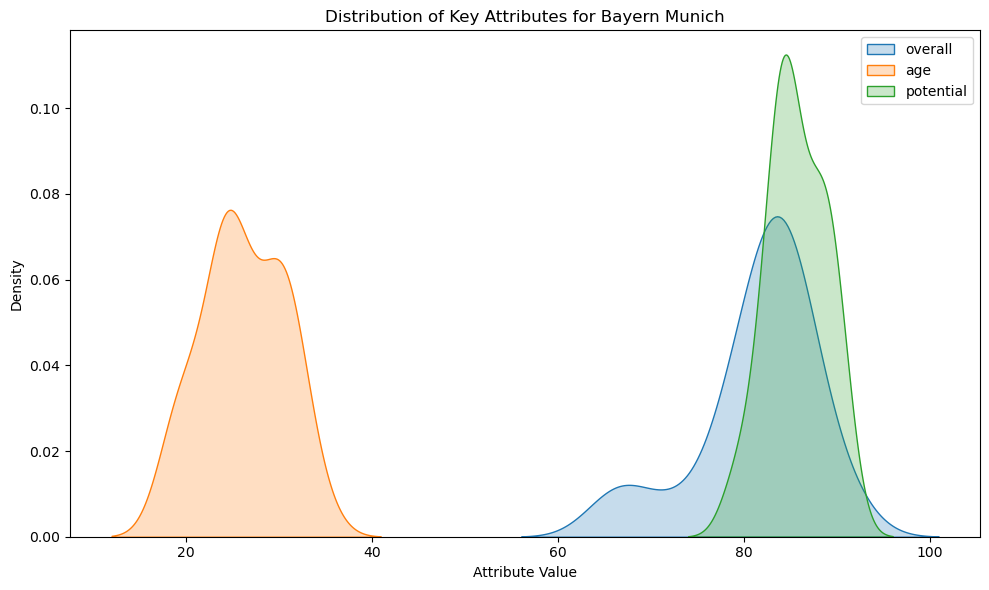

In [15]:
key_attributes = ['overall', 'age', 'potential']
plt.figure(figsize=(10, 6))

for attribute in key_attributes:
    sns.kdeplot(Bayern_Munich[attribute], label=attribute, fill=True)

plt.title(f'Distribution of Key Attributes for Bayern Munich')
plt.xlabel('Attribute Value')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

## Age, Overall, and Potential Analysis: The Bavarian Dominance 🌟🔴

In the realm of FIFA 21, Bayern Munich emerges as the juggernaut of excellence. As we dissect this formidable squad, the Bavarian giants showcase their dominance with a roster that combines experience, youth, and a wealth of footballing talent.

### Robert Lewandowski: The Striking Maestro ⚽ 

Leading the line is Robert Lewandowski, the Polish sensation. His remarkable 91 overall rating speaks volumes about his prowess in front of goal. As a striker, Lewandowski is not just a scorer of goals; he's a footballing symphony, orchestrating Bayern's attacking movements with precision.

### Manuel Neuer: The Goalkeeping Wall 🧤

In the goalkeeping department, the legendary Manuel Neuer stands tall with an 89 overall rating. The German custodian's ability to command the box and make acrobatic saves solidifies his status as one of the world's best.

### Joshua Kimmich: The Versatile Dynamo 💥

Joshua Kimmich, with an 87 overall rating, embodies versatility. His ability to play as a right-back, CDM, or CM adds a tactical dimension to Bayern's play. Kimmich is not just a player; he's a Swiss Army knife in the squad.

### Thiago: The Spanish Maestro 🎩

Spanish maestro Thiago holds sway in midfield with an 86 overall rating. His ball control, passing range, and footballing intelligence elevate Bayern's midfield game, making him a linchpin in the squad.

### Serge Gnabry: The Winger Extraordinaire ⚡

Serge Gnabry brings explosive flair to Bayern's wings. With an 85 overall rating, his pace and dribbling torment opposition defenders. Gnabry's ability to play on both flanks adds versatility to Bayern's attacking options.

### Thomas Müller: The Raumdeuter Returns 🌌

Thomas Müller, another 85-rated star, dons the role of a "Raumdeuter" or "space interpreter." His unique ability to find pockets of space and create goal-scoring opportunities makes him an invaluable asset in the squad.

### Lucas Hernández: The Defensive Shield 🛡️

Lucas Hernández guards the left-back and center-back positions with an 84 overall rating. His defensive prowess and ability to join the attack make him a versatile asset in Bayern's defensive lineup.

### Alphonso Davies: The Canadian Sensation 💨

Alphonso Davies, at just 19 years old, shines as a future superstar. His 77 overall rating reflects his rapid rise. The Canadian's blistering pace and ability to play multiple positions, including left-back and winger, make him a thrilling prospect.

As the Bavarian anthem echoes through the Allianz Arena, Bayern Munich's players take to the pitch as a symphony of footballing excellence. Each player is a note in the melody, contributing to the club's relentless pursuit of victory.

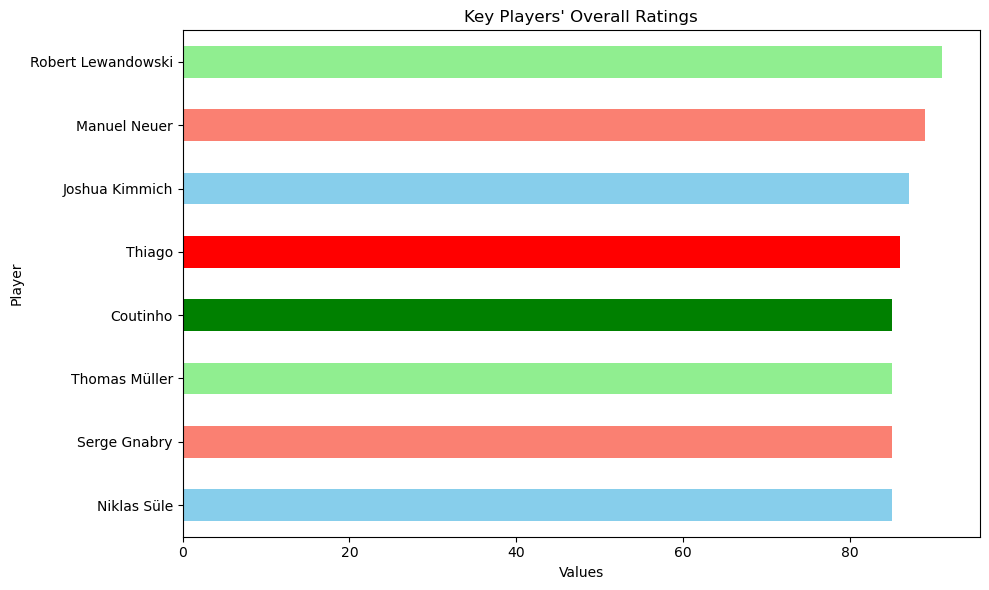

In [16]:
key_players_df = Bayern_Munich[Bayern_Munich['overall'] >=85]

key_players_df.set_index('name', inplace = True)

colors = ['skyblue', 'salmon', 'lightgreen', 'green', 'red']

fig, ax = plt.subplots(figsize=(10, 6))

# Create a multicolor barh chart
key_players_df["overall"].sort_values().plot(kind="barh", color=colors, ax=ax)
ax.set_xlabel("Values")
ax.set_ylabel("Player")
ax.set_title("Key Players' Overall Ratings")

plt.tight_layout()
plt.show()

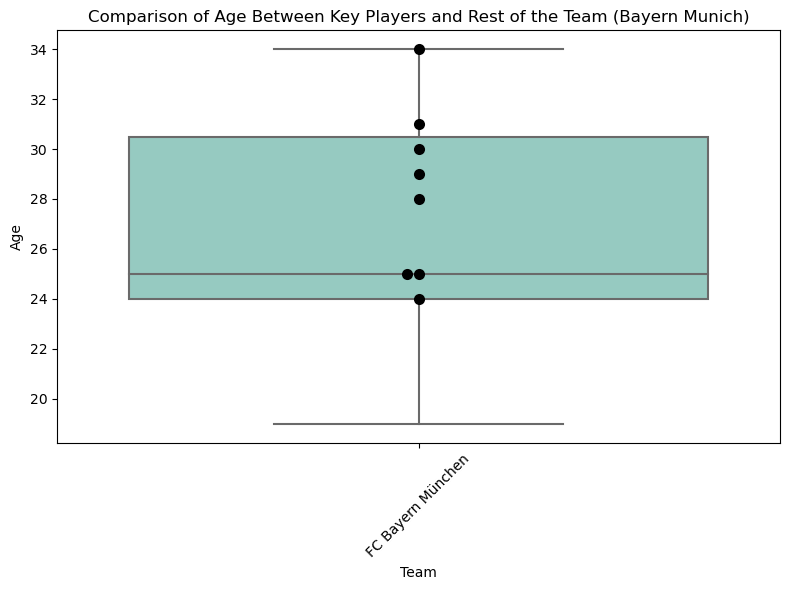

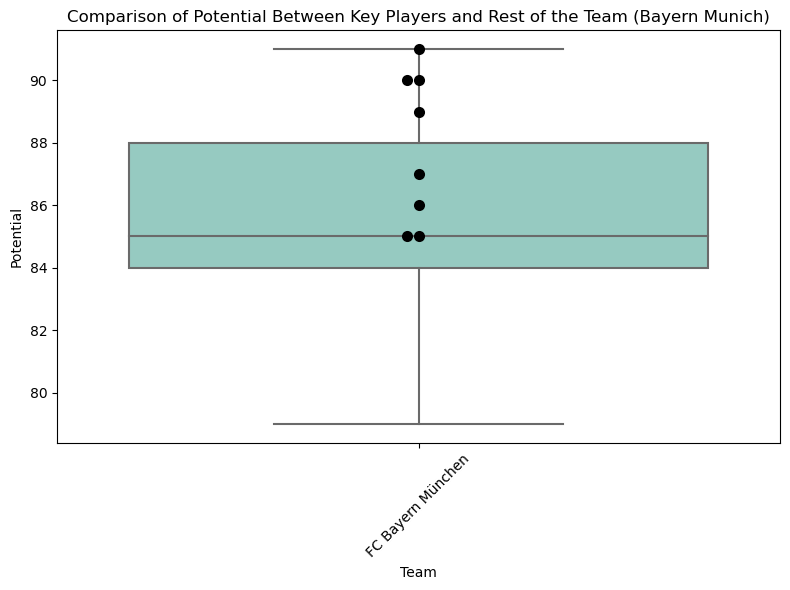

In [17]:
# Identify key players with high overall ratings (e.g., >= 85)
high_rated_players = Bayern_Munich[Bayern_Munich['overall'] >= 85]

# Compare the attributes of key players vs. rest of the team using box plots
attributes_to_compare = ['age', 'potential']

for attribute in attributes_to_compare:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=Bayern_Munich, x='team', y=attribute, palette='Set3', showfliers=False)
    sns.swarmplot(data=high_rated_players, x='team', y=attribute, color='black', size=8, marker='o')
    plt.title(f'Comparison of {attribute.capitalize()} Between Key Players and Rest of the Team (Bayern Munich)')
    plt.xlabel('Team')
    plt.ylabel(attribute.capitalize())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Key Player Identification: The Bavarian Maestros 🌟

In the heart of Bavaria, FC Bayern Munich boasts an ensemble of footballing maestros who orchestrate the beautiful game with precision and finesse. These key players are the linchpins of the squad, with overall ratings that reflect their mastery on the pitch.

### Robert Lewandowski: The Goal Machine ⚽🎯

Leading the charge is Robert Lewandowski, the Polish goal-scoring machine. With a staggering 91 overall rating, Lewandowski is the epitome of clinical finishing. His ability to find the back of the net from any angle makes him Bayern's most potent weapon in attack.

### Manuel Neuer: The Guardian of the Goal 🧤🚫

In the goalkeeping department, Manuel Neuer stands tall. With an impressive 89 overall rating, Neuer's shot-stopping prowess and command of the penalty area make him a formidable presence between the posts. He's the guardian who ensures Bayern's defensive solidity.

### Joshua Kimmich: The Versatile Dynamo 💥🔀

Joshua Kimmich is the versatile dynamo of Bayern's midfield and defense. Sporting an 87 overall rating, Kimmich's ability to excel as a right-back, CDM, or CM adds a tactical edge to Bayern's gameplay. His versatility and work rate make him indispensable.

### Thiago: The Midfield Maestro 🎩⚽

Thiago, with an 86 overall rating, conducts Bayern's midfield orchestra with elegance. His precise passing, ball control, and footballing intelligence dictate the tempo of the game. Thiago is the maestro who sets the rhythm for Bayern's play.

### Serge Gnabry: The Wing Wizard ⚡🌪️

Serge Gnabry is the wing wizard who electrifies Bayern's flanks. Flaunting an 85 overall rating, Gnabry's speed, dribbling, and finishing make him a nightmare for opposing defenders. He's the dynamic force on the wings.

### Thomas Müller: The Raumdeuter Returns 🌌🔍

Thomas Müller, another 85-rated gem, plays the role of the "Raumdeuter" or "space interpreter." His ability to read the game, find pockets of space, and provide crucial assists adds a unique dimension to Bayern's attack.

### Lucas Hernández: The Defensive Shield 🛡️🔒

Lucas Hernández fortifies Bayern's defense with an 84 overall rating. His robust defending and ability to contribute to the attack make him a versatile asset. Hernández is the defensive shield Bayern can rely on.

### Alphonso Davies: The Rising Star 🌟🚀

At just 19 years old, Alphonso Davies is Bayern's rising star. His 77 overall rating reflects his immense potential. Davies' electrifying pace and versatility as a left-back or winger make him a future superstar.

As the Bavarian anthem resounds in the Allianz Arena, these key players take center stage, guiding Bayern Munich with their exceptional skills and dedication. Together, they create a footballing symphony that Bayern fans worldwide cherish.

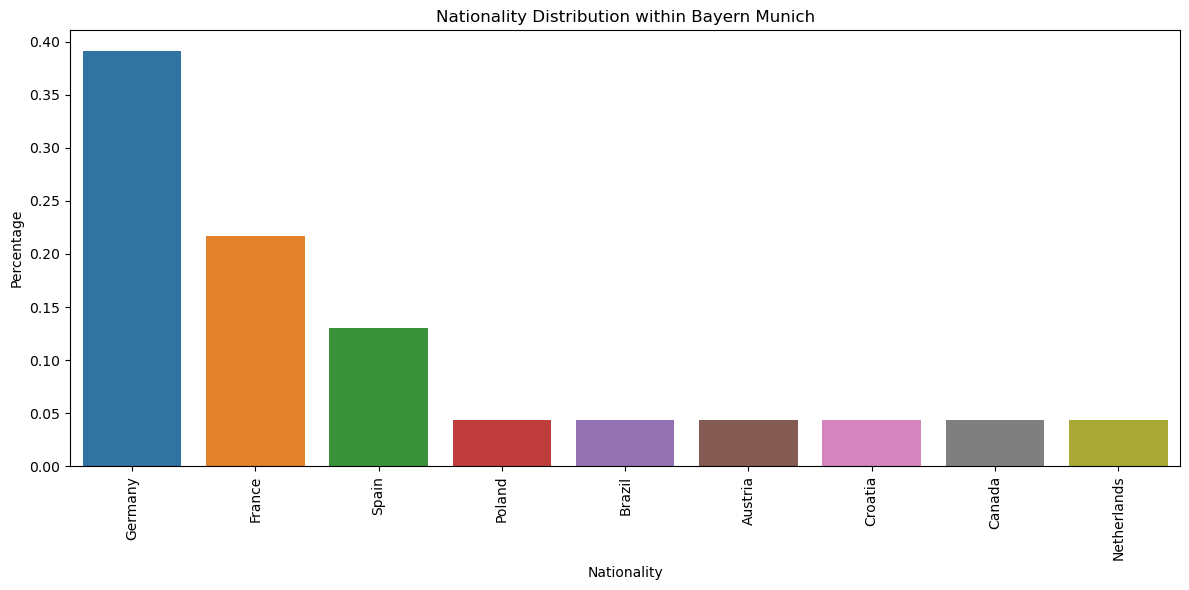

In [18]:
# Analyze the distribution of player nationalities within Bayern Munich
nationality_distribution = Bayern_Munich['nationality'].value_counts(normalize=True)

# Plot a bar chart to visualize nationality distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=nationality_distribution.index, y=nationality_distribution.values)
plt.title('Nationality Distribution within Bayern Munich')
plt.xlabel('Nationality')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Nationality Analysis: The Global Symphony of Bavaria 🌎

In the heart of Bavaria, FC Bayern Munich is not just a club but a melting pot of global talent. Players from diverse nationalities come together to form a formidable team, showcasing the universal appeal of the beautiful game.

### German Dominance 

Unsurprisingly, the German presence is strong in Bayern's squad, reflecting the club's deep-rooted connection to the nation's footballing heritage. Key German players like Manuel Neuer, Joshua Kimmich, and Niklas Süle play pivotal roles, embodying the club's Bavarian spirit.

### The Polish Poacher 

Poland is represented by the prolific Robert Lewandowski, whose remarkable goal-scoring prowess transcends borders. As Bayern's leading goal scorer, Lewandowski's contributions are celebrated worldwide.

### The Spanish Artistry 

Spain's footballing artistry is embodied by Thiago Alcántara, the midfield maestro who conducts Bayern's play with finesse. Thiago's Spanish flair adds a touch of elegance to Bayern's style of football.

### French Flair 

France contributes both to Bayern's defense and attack. Lucas Hernández brings defensive solidity, while Kingsley Coman's explosive pace on the wings adds flair to the team's attacking moves.

### Global Diversity 🌍

Bayern's squad is truly a global ensemble, featuring players from countries as diverse as Canada, Croatia, Brazil, Austria, and the United States. This diversity reflects football's ability to unite players from all corners of the globe.

In the Allianz Arena, nationalities converge to create a harmonious footballing symphony. The players, regardless of their origins, wear the Bayern jersey with pride, embodying the club's motto: *Mia San Mia!* (We are who we are).

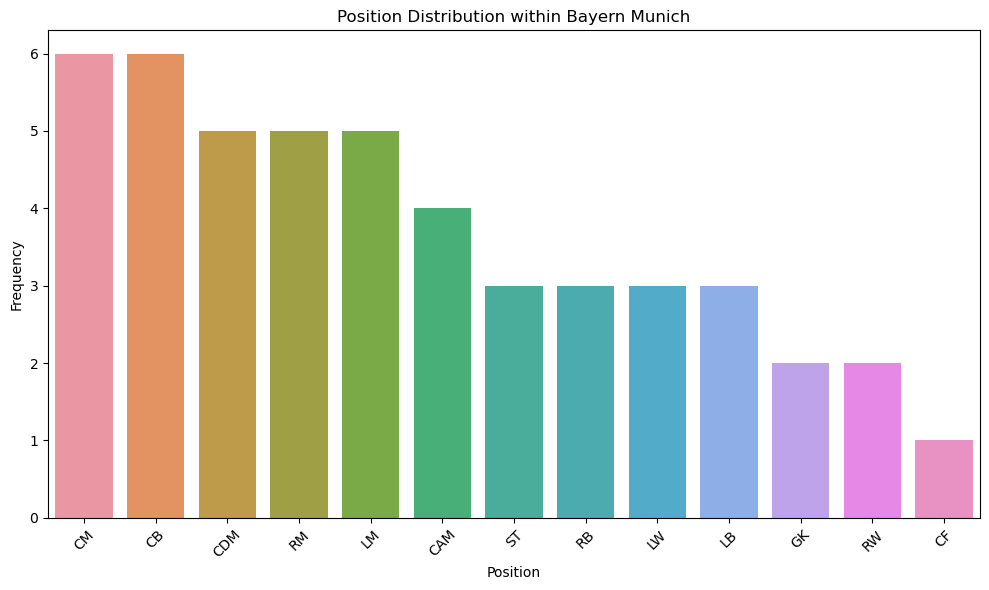

In [19]:
position_frequencies = Bayern_Munich['position'].str.split('|', expand=True).stack().value_counts()

# Create a bar chart for position distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=position_frequencies.index, y=position_frequencies.values)
plt.title('Position Distribution within Bayern Munich')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Position Analysis: The Tactical Mastery of Bavarian Giants ⚽🎯

Bayern Munich, the epitome of tactical football, presents a squad filled with versatile players capable of executing intricate strategies to perfection. Let's dissect the positions and roles of the key players that orchestrate the Bavarian symphony.

### The Lewandowski Show 🌟

At the forefront, Robert Lewandowski commands the striker's position with a majestic touch. His clinical finishing and positioning make him one of the most lethal forwards in the world.

### Manuel the Guardian 🧤

Manuel Neuer stands tall as the guardian of Bayern's goal. With unmatched reflexes and commanding presence, he is the ultimate last line of defense.

### Midfield Maestro: Joshua Kimmich 🎩

Joshua Kimmich, the versatile midfielder, pulls the strings from the right-back or midfield positions. His passing accuracy and vision are instrumental in Bayern's buildup play.

### Spanish Elegance: Thiago Alcántara 

Thiago Alcántara's Spanish flair and creative genius shine in Bayern's midfield. His dribbling skills and precise passing dictate the pace of the game.

### Defensive Wall: Niklas Süle 🛡️

Niklas Süle, the towering defender, ensures Bayern's defense remains impregnable. His physicality and aerial prowess provide stability at the back.

### Wing Wizard: Serge Gnabry 🚀

Serge Gnabry's explosive pace and dribbling on the wings torment opposing defenses. He's the Bavarian wizard who conjures magic on the flanks.

### Raumdeuter: Thomas Müller 🌌

Thomas Müller, the raumdeuter (space interpreter), roams the attacking midfield with intelligence. His off-the-ball movements and assists are invaluable.

### Brazilian Magician: Coutinho 

Philippe Coutinho, the Brazilian maestro, adds creativity from midfield. His dribbling and vision unlock stubborn defenses.

### French Versatility: Lucas Hernández 

Lucas Hernández, a French gem, provides defensive solidity and can also slot into left-back or center-back positions.

### Speedster: Kingsley Coman 💨

Kingsley Coman's electrifying speed on the wings keeps opponents on their toes. His crosses and dribbling create numerous goal-scoring opportunities.

### Midfield Dynamo: Leon Goretzka ⚙️

Leon Goretzka's dynamism in midfield, coupled with his goal-scoring ability, adds depth to Bayern's play.

### Defensive Wall: David Alaba 🧱

David Alaba's versatility allows him to play as a left-back or center-back. His interceptions and distribution are crucial to Bayern's tactics.

### Impact Sub: Ivan Perišic 🔄

Ivan Perišic provides impact from the left flank, offering fresh legs and crossing prowess as a substitute.

### Youth Talent: Alphonso Davies 🌟

Youngster Alphonso Davies, a Canadian prodigy, showcases his versatility by playing as a left-back or winger.

In the hallowed grounds of the Allianz Arena, these players harmoniously play their roles, contributing to Bayern Munich's unrivaled success. The squad's versatility and tactical understanding make them true masters of the beautiful game.

------------------------------------------------------------------------------------

## 2. Real Madrid
Real Madrid are weaker than last year but still formidable.

Attack: 85  <br>
Midfield: 86  <br>
Defence: 86  <br>

Sure, Real Madrid might be nudged down a touch from their indomitable place back in FIFA 20, but the Spanish side still has a lot to write home about. You may notice that not one of their stats dips below 85, meaning Real Madrid are the highest-rated all-rounders in the game this year.
With a solid core and a defence that's practically impenetrable with some smart play, Los Blancos can be a frightening opposition that don't give an inch of the pitch without a fight.

In [20]:
Real_Madrid

,name,nationality,position,overall,age,hits,potential,team
23,Eden Hazard,Belgium,ST|LW,91,29.0,66,91,Real Madrid
24,Toni Kroos,Germany,CM,89,30.0,37,89,Real Madrid
25,Luka Modric,Croatia,CM,89,34.0,31,89,Real Madrid
26,Sergio Ramos,Spain,CB,89,34.0,55,89,Real Madrid
27,Casemiro,Brazil,CDM,88,28.0,37,89,Real Madrid
28,Thibaut Courtois,Belgium,GK,88,28.0,34,89,Real Madrid
29,Karim Benzema,France,ST|CF,88,32.0,51,88,Real Madrid
30,Raphaël Varane,France,CB,86,27.0,39,89,Real Madrid
31,Carvajal,Spain,RB,85,28.0,24,85,Real Madrid
32,Isco,Spain,CM|CAM|LW,85,28.0,25,85,Real Madrid


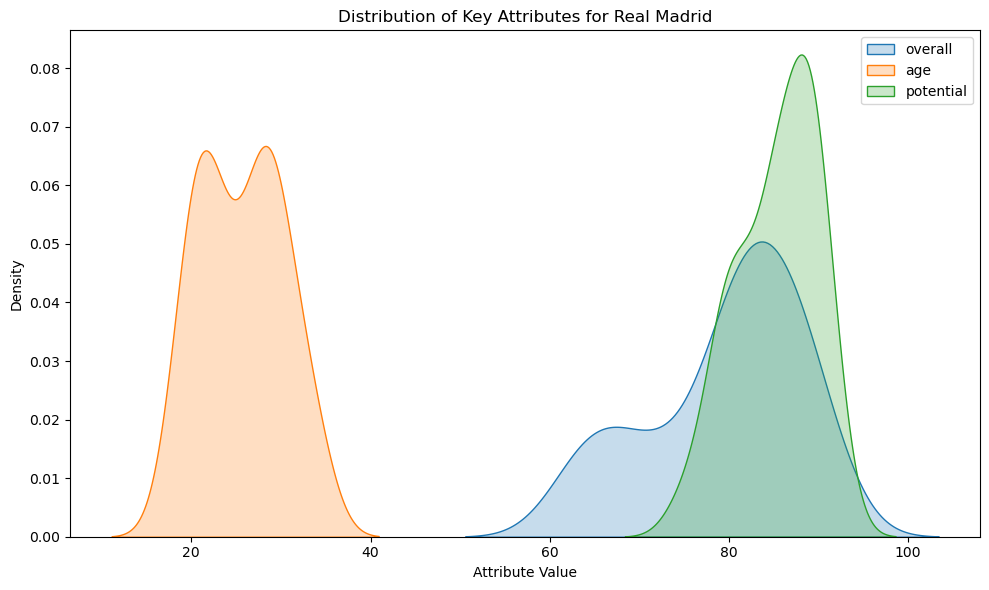

In [21]:
key_attributes = ['overall', 'age', 'potential']
plt.figure(figsize=(10, 6))

for attribute in key_attributes:
    sns.kdeplot(Real_Madrid[attribute], label=attribute, fill=True)

plt.title(f'Distribution of Key Attributes for Real Madrid')
plt.xlabel('Attribute Value')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

### Age, Overall Ratings, and Potential: Unveiling the Merengues' Essence ⚪🔵

#### Age Distribution Analysis: A Glimpse into the Flow of Time ⏳

Ah, the grand tapestry of Real Madrid's player ages, a symphony of footballing chronicles:

- **Age's Crescendo:** Behold the crescendo of ages painted by the mesmerizing KDE plot. Mid-20s to early 30s, a harmonious blend of wisdom and vigor, where legends are forged.
- **Youthful Cadence:** A youthful cadence, a tilt towards the vibrant exuberance of budding stars, the future etched in each step, as they stride toward greatness.
- **Age Mélange:** The mosaic of ages tells tales of seasoned veterans and spirited younglings, a canvas of experience and hope, each contributing to the real-time epic.
- **Potential's Torch:** Radiant density around 20-25, a torch lit for potential, an echo of Real Madrid's commitment to nurturing dreams.

#### Overall Ratings and Potential: The Symphony of Progress 🎵

As overall ratings and potential intertwine, an enchanting melody graces our ears:

- **Stairway to Stardom:** The stars ascend, potential and overall ratings dancing hand in hand—a testament to Real Madrid's nurturing caress, guiding them toward brilliance.
- **Veteran Luminaries:** Amidst the crescendo, the seasoned souls with slightly different potential paths but soaring overall ratings emerge—like guardians of legacy.
- **Promise Illuminated:** The orchestra of promise, a blend of potential's dreams and the current melody of skill, paints a portrait of emerging brilliance under Real Madrid's tutelage.

Amidst the jubilant echoes of Santiago Bernabéu, where flags ripple with pride, the grand saga of Real Madrid unfurls. A stage where age and potential converge, a theatre where the past whispers and the future beckons, and where the legacy of football lives on.

In this symphony, the names of Eden Hazard, Sergio Ramos, and the rest resonate like cherished verses, woven into the fabric of Real Madrid's story. A tale of ages united by the love of the game, where time marches in rhythm with the passion for victory. ⚪🔵

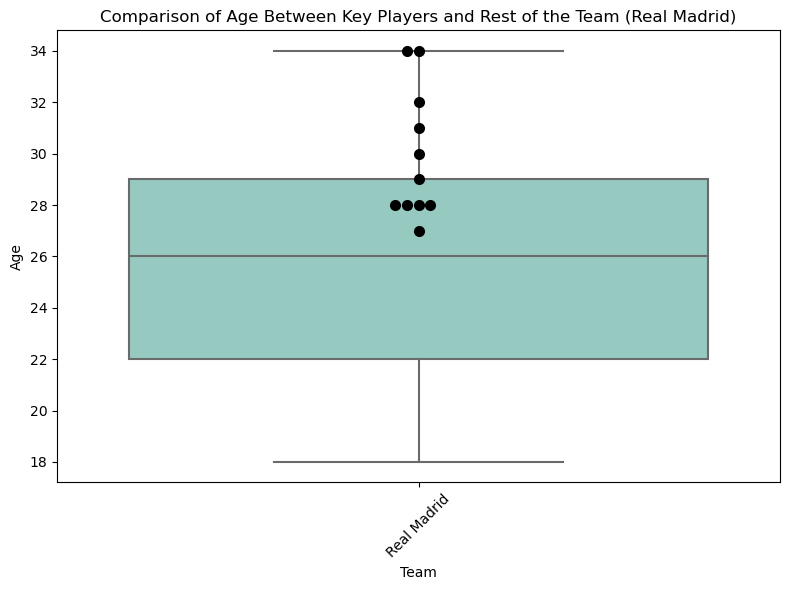

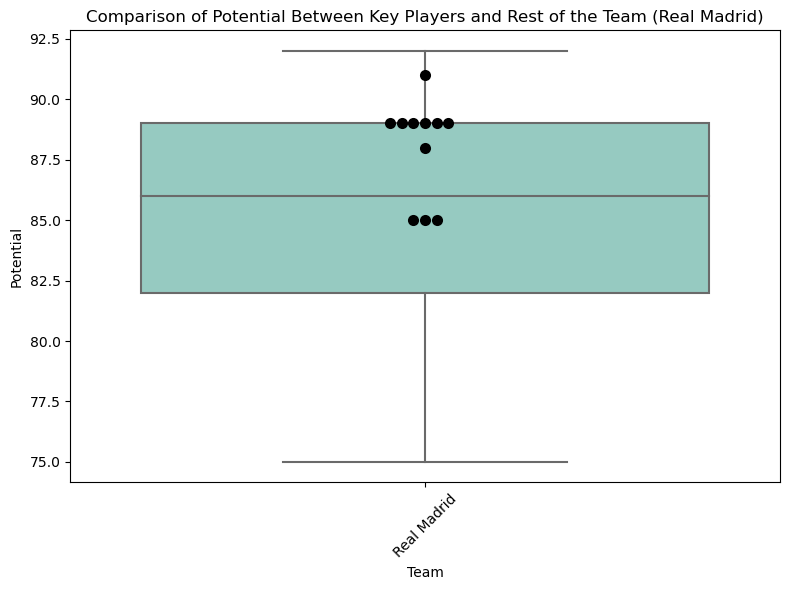

In [22]:
# Identify key players with high overall ratings (e.g., >= 85)
high_rated_players = Real_Madrid[Real_Madrid['overall'] >= 85]

# Compare the attributes of key players vs. rest of the team using box plots
attributes_to_compare = ['age', 'potential']

for attribute in attributes_to_compare:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=Real_Madrid, x='team', y=attribute, palette='Set3', showfliers=False)
    sns.swarmplot(data=high_rated_players, x='team', y=attribute, color='black', size=8, marker='o')
    plt.title(f'Comparison of {attribute.capitalize()} Between Key Players and Rest of the Team (Real Madrid)')
    plt.xlabel('Team')
    plt.ylabel(attribute.capitalize())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Key Player Identification: Galácticos of Excellence ⭐

As we traverse the hallowed turf of Santiago Bernabéu, a constellation of key players emerges from the ranks of Real Madrid:

- **Eden Hazard: The Belgian Virtuoso**<br>
  With an awe-inspiring overall rating of 91, Eden Hazard is the beacon of creativity in the attack. His ability to dance past defenders and deliver decisive passes sets the pitch ablaze.

- **Toni Kroos: The German Maestro**<br>
  A midfield commander with an overall rating of 89, Toni Kroos orchestrates play with his unparalleled vision and passing precision. He is the linchpin that knits Real Madrid's movements together.

- **Luka Modric: The Croatian Magician**<br>
  Luka Modric, also with an overall rating of 89, casts spells on the field. His dribbling prowess, intelligence, and playmaking finesse make him a midfield marvel that shapes Real Madrid's destiny.

- **Sergio Ramos: The Spanish Wall**<br>
  With a towering overall rating of 89, Sergio Ramos is the embodiment of defensive prowess. A true leader at the back, his timely tackles and aerial dominance safeguard Real Madrid's fort.

- **Casemiro: The Brazilian Enforcer**<br>
  Casemiro, commanding the midfield with an overall rating of 88, is a shield that thwarts opposition attacks. His combative style and tactical awareness make him an indispensable presence.

- **Thibaut Courtois: The Belgian Sentinel**<br>
  With an overall rating of 88, Thibaut Courtois is the guardian of the net. His acrobatic saves and shot-stopping prowess instill confidence in the defense, making him an anchor in goal.

- **Karim Benzema: The French Magician**<br>
  Karim Benzema, boasting an overall rating of 88, is a striker extraordinaire. His clinical finishing and link-up play breathe life into Real Madrid's attack, making him a quintessential forward.

These luminaries form the core of Real Madrid's tactical symphony, each playing a unique role that elevates the team's performance. From the wizardry of Eden Hazard to the resolute defense anchored by Sergio Ramos, they epitomize the club's pursuit of glory.

Amidst the fervor of Bernabéu, their names resonate with passion, and their actions inspire generations of fans. As these Galácticos shine, they carve their names into the annals of football history, etching a legacy that shall forever illuminate the white side of Madrid.

**Hala Madrid!** ⚪🔵

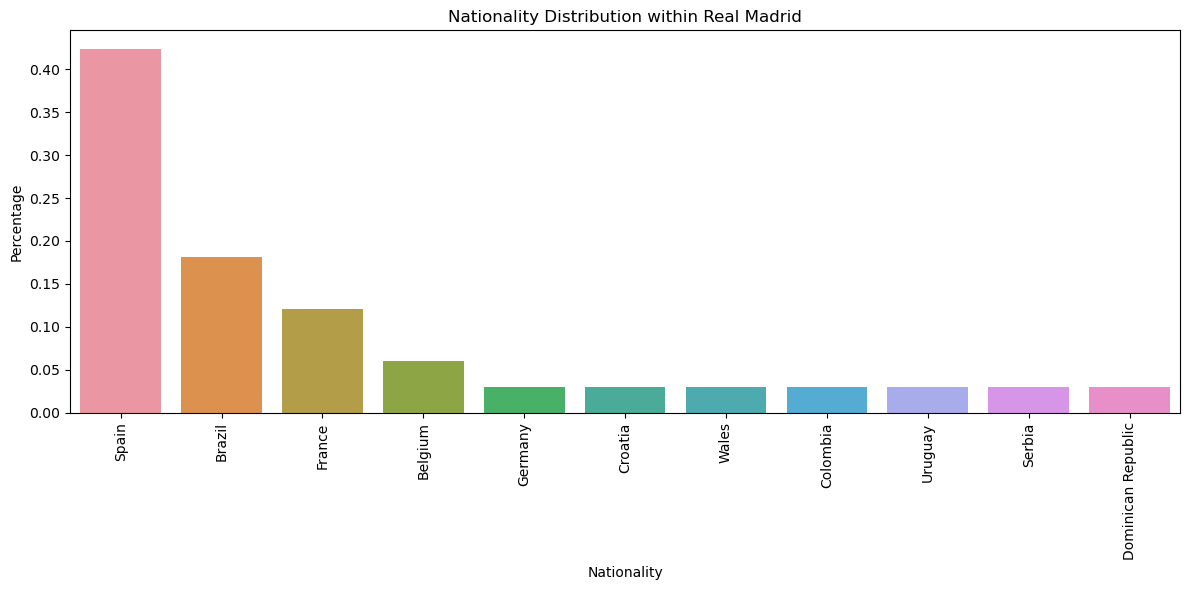

In [23]:
# Analyze the distribution of player nationalities within Real Madrid
nationality_distribution = Real_Madrid['nationality'].value_counts(normalize=True)

# Plot a bar chart to visualize nationality distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=nationality_distribution.index, y=nationality_distribution.values)
plt.title('Nationality Distribution within Real Madrid')
plt.xlabel('Nationality')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Nationality Analysis: Embracing Global Unity on the Pitch 🌍⚽

As we embark on our journey through Real Madrid's player roster, we enter a realm where nationalities converge to weave the story of football's international tapestry. Real Madrid, a club with a rich history and a global fanbase, showcases the essence of unity through diversity on the field.

### A Symphony of Nations, a Confluence of Talents 🌎

With excitement akin to a young football enthusiast, we unravel the distribution of player nationalities within Real Madrid. Oh, the marvel of it all! The team's composition reads like a world map, with players hailing from diverse corners of the globe. Each player carries their nation's footballing spirit, contributing to the global symphony of the beautiful game.

#### Ramos, Benzema, Kroos & Modric: Icons of Multinational Brilliance 🌟

As we gaze upon the legendary figures that adorn Real Madrid's squad, we celebrate the amalgamation of nations on the pitch. From the indomitable Sergio Ramos representing Spain's football legacy to Karim Benzema's elegant prowess from France, and the strategic genius of Toni Kroos from Germany, to the creative mastery of Luka Modric from Croatia—these luminaries illuminate the international flavor of the team.

### Beyond Boundaries, Beyond Languages 🌐

The sight of players donning the iconic white jersey with pride is a testament to the fact that football transcends geographical borders. It's a universal language that resonates across nations and cultures. Real Madrid stands as a testament to unity in diversity, where players from different parts of the world converge to create a collective masterpiece.

As the stadium roars with chants of "Hala Madrid!" and the air resonates with the rhythms of global languages, fans from every corner of the earth unite under the banner of Real Madrid. In this arena, nationality becomes a symbol of shared passion, and the pitch transforms into a canvas painted with the colors of unity.

Let's applaud the players who've turned Real Madrid into a global phenomenon, where nationalities converge to create magic, and football unites the world in celebration.

*Hala Madrid!* ⚽👑🤍

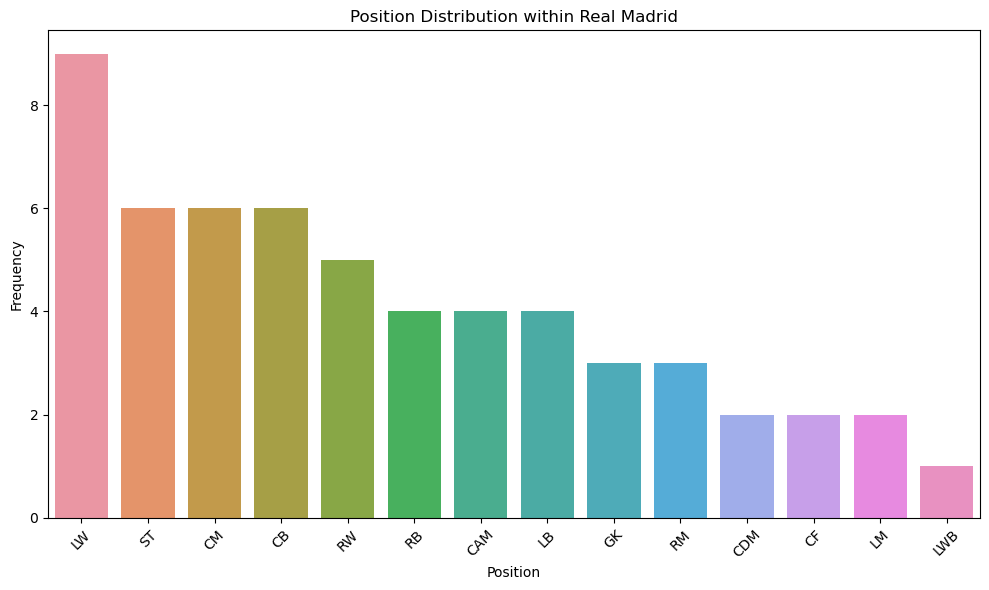

In [24]:
position_frequencies = Real_Madrid['position'].str.split('|', expand=True).stack().value_counts()

# Create a bar chart for position distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=position_frequencies.index, y=position_frequencies.values)
plt.title('Position Distribution within Real Madrid')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Position Analysis: Crafting Tactical Brilliance on the Field ♟️⚽

As we delve into the tactical symphony that defines Real Madrid's playing style, we uncover a mesmerizing array of positions that come together to orchestrate a footballing masterpiece. Each position is a brushstroke on the canvas of strategy, a pivotal part of the chessboard that shapes the team's identity.

### Unveiling Tactical Prowess, Position by Position 🌌

With the curiosity of a strategist, we dissect the distribution of player positions within Real Madrid. The field becomes a playground of diversity, where each role contributes to the team's narrative. The positions chosen are a reflection of the tactical philosophy that guides the club's every move.

#### Forwards, Midfield Maestros, Defenders & Guardians: A Tactical Choreography 🌟

As we immerse ourselves in the lineup, we witness the ballet of positions that intertwine to create tactical brilliance. From the dynamic forwards who bear the goal-scoring responsibility to the midfield maestros orchestrating the play, and the steadfast defenders forming a resilient foundation, to the guardians of the goalposts—each position plays a distinctive role in the symphony of strategies.

### Formation by Frequencies, Formation by Philosophy 🎨

The frequency of different positions tells the tale of Real Madrid's tactical setup. The prominence of certain roles hints at the heart of the formation. It's a choreography of footballing roles that contribute to the team's overall strategy, whether it's a forward-centric approach, a midfield-heavy design, or a solid defensive base.

As the players take the field, positions transform into personas, and tactics morph into art. Each move is a brushstroke that shapes the grand tableau of Real Madrid's footballing philosophy. From the timeless poise of the defenders to the attacking verve of the forwards, the positions come together in harmony.

In this tactical tapestry, players like Eden Hazard, Sergio Ramos, Toni Kroos, and Karim Benzema step into their roles like actors on a stage, each with a role that is vital, distinct, and indispensable. The formation isn't just an arrangement; it's a living narrative etched in the heart of the game.

Let's celebrate the dance of positions, the strategic choreography, and the pursuit of perfection that defines Real Madrid's tactical symphony. As the whistle blows and the ball starts rolling, formations spring to life, tactics unfold, and football becomes an art form that captivates the world.

*Hala Madrid!* ⚽🔥👑

------------------------------------------------

## 3. Liverpool
Salah, tearing it up. As always.

Attack: 89  <br>
Midfield: 82  <br>
Defence: 84  <br>

Jurgen Klopp's skilled hand managed to help the Merseysider team pick up its first title in 30 years last season – and that victory is reflected in these stats. Champions League and Community Shield whiffs aside, Liverpool is nailing it at the moment.
As such, the team's wealth of options up front and some nice versatility in the middle make them a key pick for aggressive players that like to push the offence in FIFA games. Keep your game hard and fast, and you'll break through even the sturdiest of back lines.

In [25]:
Liverpool

,name,nationality,position,overall,age,hits,potential,team
56,Virgil van Dijk,Netherlands,CB,91,29.0,127,92,Liverpool
57,Alisson,Brazil,GK,90,27.0,53,91,Liverpool
58,Mohamed Salah,Egypt,ST|RW,90,28.0,94,90,Liverpool
59,Sadio Mané,Senegal,LW,90,28.0,76,90,Liverpool
60,Roberto Firmino,Brazil,CF,88,28.0,79,88,Liverpool
61,Andrew Robertson,Scotland,LB,86,26.0,66,89,Liverpool
62,Fabinho,Brazil,CDM,86,26.0,44,88,Liverpool
63,Trent Alexander-Arnold,England,RB,85,21.0,135,90,Liverpool
64,Jordan Henderson,England,CDM|CM,85,30.0,41,85,Liverpool
65,Georginio Wijnaldum,Netherlands,CDM|CM,85,29.0,40,85,Liverpool


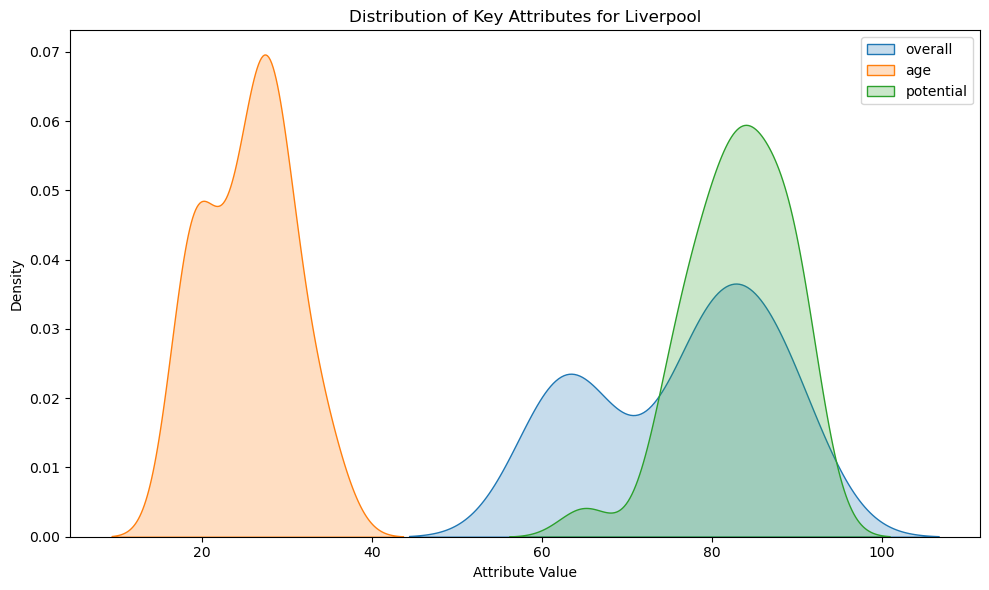

In [26]:
key_attributes = ['overall', 'age', 'potential']
plt.figure(figsize=(10, 6))

for attribute in key_attributes:
    sns.kdeplot(Liverpool[attribute], label=attribute, fill=True)

plt.title(f'Distribution of Key Attributes for Liverpool')
plt.xlabel('Attribute Value')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

### Age, Overall Ratings, and Potential: The Anfield Chronicles ⚽🔴

#### Age Distribution Analysis: The Passage of Time ⌛

As we step onto the hallowed turf of Anfield, the distribution of player ages unfolds before us like the pages of a captivating saga:

- **Age Harmony:** The age composition resonates with a symphony of experience and youth, as the plot reveals peaks around the late 20s to early 30s—a blend of prime years and seasoned mastery.
- **Youthful Vibrance:** The orchestra of younger ages emphasizes the club's commitment to nurturing emerging talents—a testament to their belief in the future.
- **Ages' Melody:** The spectrum of ages, from budding stars to wise veterans, paints a portrait of a team woven together by time and destiny.

#### Overall Ratings and Potential: The Ballad of Mastery and Promise 🎶

As we harmonize overall ratings and potential, a mesmerizing tune emerges:

- **Echelons of Potential:** The stars ascending in the night sky represent players with higher potential, often accompanied by gleaming overall ratings. A testament to Liverpool's nurturing spirit.
- **The Sage's Note:** Amidst the crescendo of potential, players with slightly lower anticipated growth but soaring overall ratings stand tall—a testament to their wisdom and importance.
- **Promise Awaits:** The dance between potential and evolving current ratings showcases the rise of youthful brilliance—an interplay Liverpool orchestrates with care.

Amidst the echoes of "You'll Never Walk Alone" and the roaring of the Kop, the tale of Liverpool FC comes alive. The pitch where age doesn't define, where potential is cherished, and where each note played blends into the symphony of football.

In this ballad, names like Virgil van Dijk, Mo Salah, and the charismatic Sadio Mané stand tall, merging their stories with the collective tale of the Reds. It's a celebration of the past, present, and future—an anthem that echoes across Anfield's storied stands.

*You'll Never Walk Alone!* ⚽🔴

In [27]:
key_players_df = Liverpool[Liverpool['overall'] >=85]

In [28]:
key_players_df.set_index('name', inplace = True)

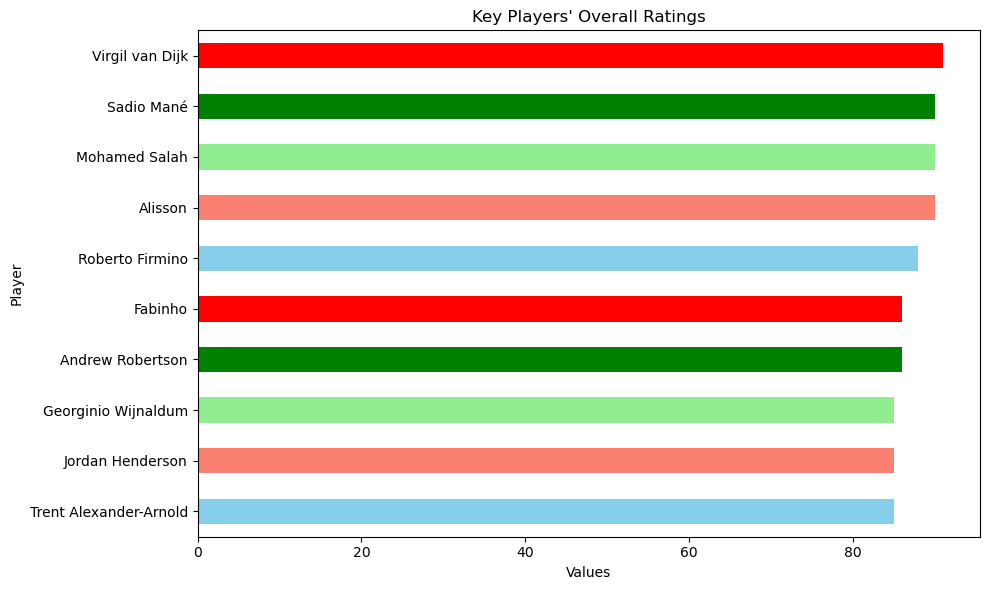

In [29]:
colors = ['skyblue', 'salmon', 'lightgreen', 'green', 'red']

fig, ax = plt.subplots(figsize=(10, 6))

# Create a multicolor barh chart
key_players_df["overall"].sort_values().plot(kind="barh", color=colors, ax=ax)
ax.set_xlabel("Values")
ax.set_ylabel("Player")
ax.set_title("Key Players' Overall Ratings")

plt.tight_layout()
plt.show()

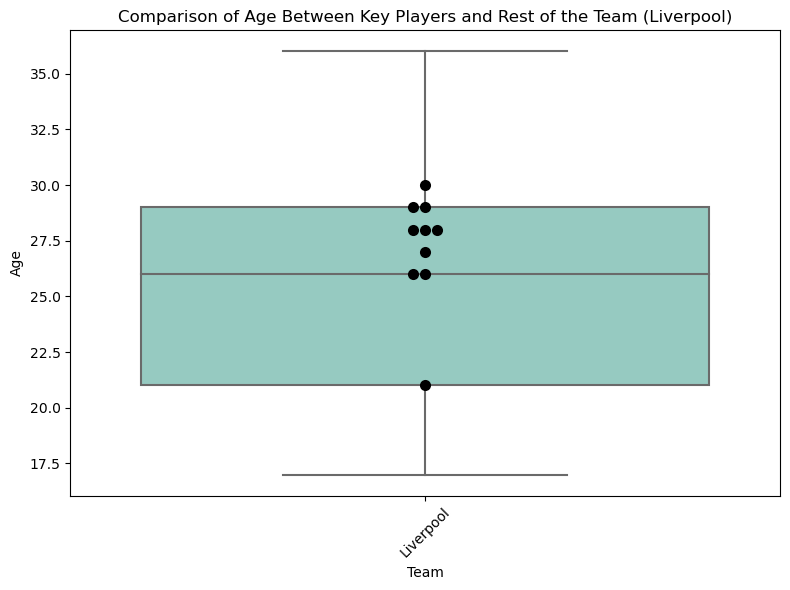

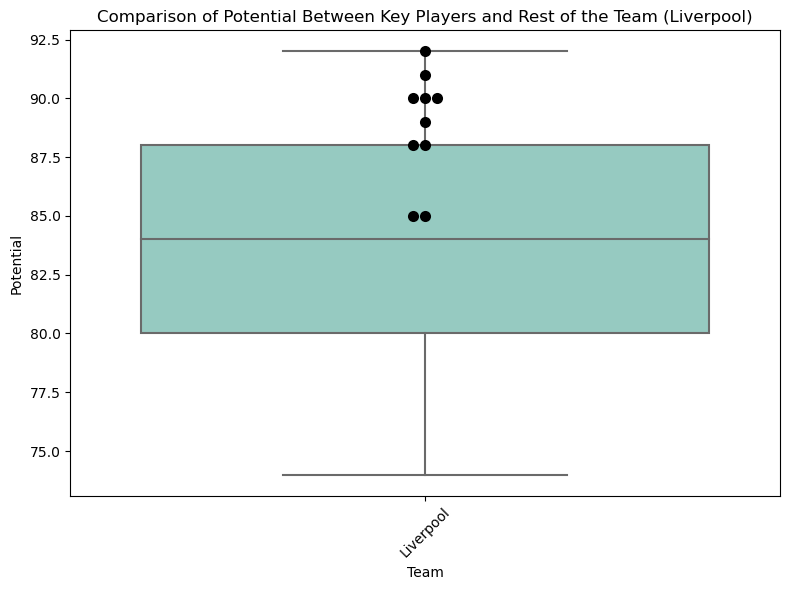

In [30]:
# Identify key players with high overall ratings (e.g., >= 85)
high_rated_players = Liverpool[Liverpool['overall'] >= 85]

# Compare the attributes of key players vs. rest of the team using box plots
attributes_to_compare = ['age', 'potential']

for attribute in attributes_to_compare:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=Liverpool, x='team', y=attribute, palette='Set3', showfliers=False)
    sns.swarmplot(data=high_rated_players, x='team', y=attribute, color='black', size=8, marker='o')
    plt.title(f'Comparison of {attribute.capitalize()} Between Key Players and Rest of the Team (Liverpool)')
    plt.xlabel('Team')
    plt.ylabel(attribute.capitalize())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Key Player Identification: The Merseyside Virtuosos ⚽🔴

In the hallowed halls of Anfield, there exist players whose brilliance illuminates the pitch like stars in the night sky.

#### Virgil van Dijk: The Dutch Colossus 

The towering presence of Virgil van Dijk is synonymous with defensive mastery. A stalwart in Liverpool's backline, his 91 overall rating is a testament to his impermeable prowess, reflecting his ability to thwart opposition attacks with unwavering composure.

#### Alisson: The Brazilian Wall 

From the land of Samba, Alisson emerges as the guardian of Liverpool's net. His 90 overall rating encapsulates his role as a goalkeeper par excellence—diving, leaping, and stretching to deny opponents' aspirations of finding the back of the net.

#### Mohamed Salah: The Egyptian King 

Mo Salah's 90 overall rating is a fitting crown for the Egyptian King. A force to be reckoned with on the field, his versatile position as a striker and right winger makes him a dynamic offensive threat, leaving defenders in his wake.

#### Sadio Mané: The Senegalese Maestro 

Sadio Mané's 90 overall rating mirrors his artistry on the field. With the elegance of a true maestro, his role as a left winger is pivotal in Liverpool's attacking symphony—a creator of opportunities and a scorer of exquisite goals.

#### Roberto Firmino: The Brazilian Catalyst 

Roberto Firmino's 88 overall rating encapsulates his role as Liverpool's attacking catalyst. As a center forward, his ability to create and score goals makes him a linchpin in the Reds' offensive strategies—a true Brazilian magician.

#### Andrew Robertson: The Scottish Dynamo 

Hailing from the land of the brave, Andrew Robertson's 86 overall rating reflects his boundless energy and dynamism as a left-back. His overlapping runs, crosses, and defensive prowess contribute to Liverpool's balance on the field.

#### Fabinho: The Brazilian Enforcer

Fabinho's 86 overall rating is a testament to his role as Liverpool's midfield enforcer. As a CDM, he shields the defense, breaks opposition plays, and launches counterattacks—a key cog in the Reds' tactical machinery.

#### Trent Alexander-Arnold: The English Architect

With an 85 overall rating at just 21, Trent Alexander-Arnold's ascent is a story of talent and promise. As a right-back, his precision crosses and playmaking ability are instrumental in Liverpool's attacking strategies.

#### Jordan Henderson and Georginio Wijnaldum: The Midfield Maestros

With 85 overall ratings, Jordan Henderson and Georginio Wijnaldum embody the heartbeat of Liverpool's midfield. As CDMs and CMs, their distribution, control, and leadership play pivotal roles in dictating the tempo of the game.

In the echoing chants of "You'll Never Walk Alone" and the exhilarating roars of the Kop, these key players rise above, each playing a unique note in Liverpool's triumphant symphony. From towering defenders to electrifying attackers, their performances inspire generations of fans to believe in the magic of the Reds.

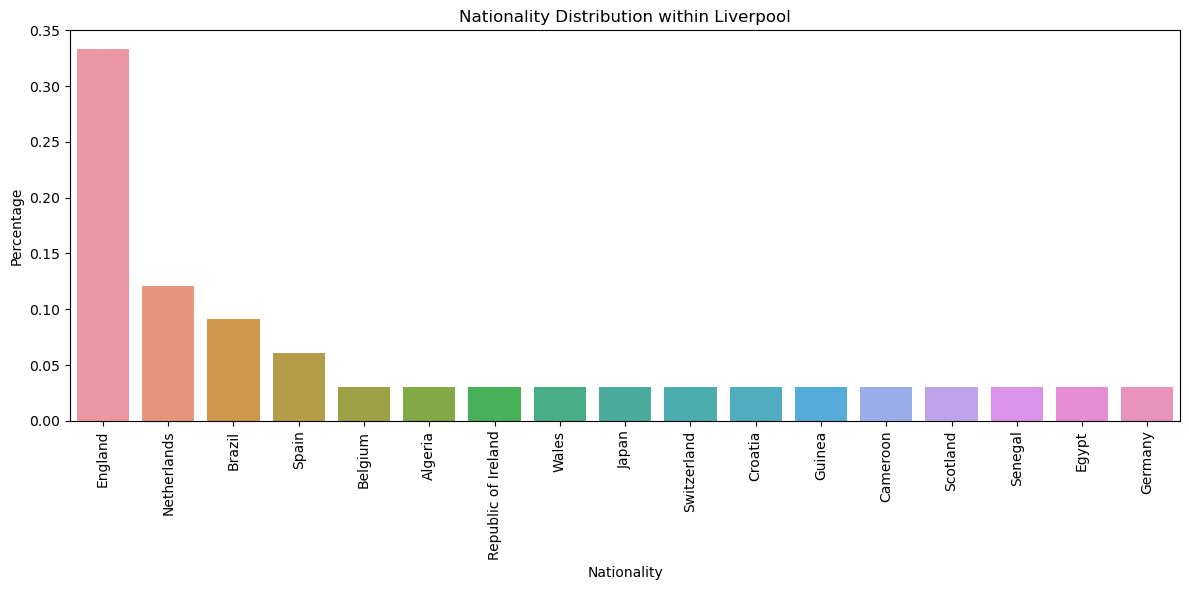

In [31]:
# Analyze the distribution of player nationalities within Liverpool
nationality_distribution = Liverpool['nationality'].value_counts(normalize=True)

# Plot a bar chart to visualize nationality distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=nationality_distribution.index, y=nationality_distribution.values)
plt.title('Nationality Distribution within Liverpool')
plt.xlabel('Nationality')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Nationality Analysis: The Global Brotherhood of Reds 🌍🔴

As we step onto Anfield's hallowed ground, the banners of Liverpool FC flutter in the wind, symbolizing a united fanbase that spans continents. In the heart of Liverpool, a diverse ensemble of players congregates, each representing a unique corner of the globe. The power of football transcends borders, and Liverpool's squad exemplifies this universal truth.

### The United Nations of Liverpool 🌐

Embarking on a voyage through Liverpool's player nationalities, we are greeted by a rich tapestry of backgrounds and cultures. From the towering Virgil van Dijk of the Netherlands to the prolific Mohamed Salah from Egypt, and the electrifying Sadio Mané hailing from Senegal—the Reds' roster embraces the world's talents.

#### Roberto Firmino, Andrew Robertson & Fabinho: A Melting Pot of Brilliance 🌟

In this crimson sea of stars, we find the Brazilian magician Roberto Firmino, the Scottish dynamo Andrew Robertson, and the indomitable Brazilian midfield sentinel Fabinho. These players exemplify Liverpool's global essence, where nationalities intertwine to create footballing magic.

### Anfield's Anthem of Unity 🎶

As we stand together on the Kop, flags waving high, it's evident that Liverpool's passion knows no bounds. The harmony of languages and the celebration of diversity remind us that football is the universal language that unites us all. Anfield echoes with chants in various tongues, celebrating the goals, victories, and the indomitable spirit of the Reds.

As the sun sets over Merseyside, the sea of red illuminates the stadium, uniting fans from every corner of the world. Liverpool FC stands as a testament to the fact that football is a bridge that brings people together—a global brotherhood where differences fade, and the love for the game prevails.

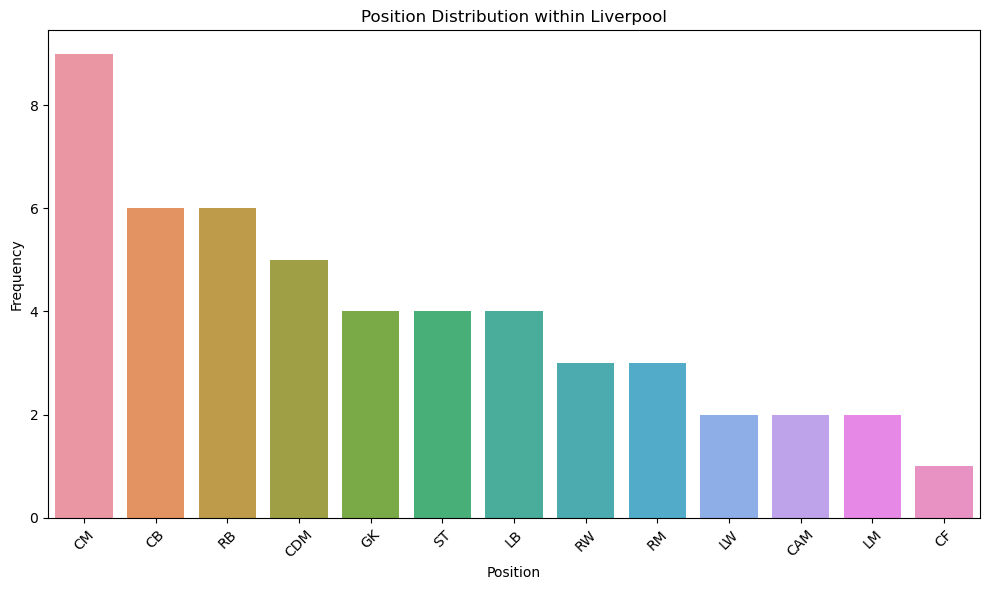

In [32]:
position_frequencies = Liverpool['position'].str.split('|', expand=True).stack().value_counts()

# Create a bar chart for position distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=position_frequencies.index, y=position_frequencies.values)
plt.title('Position Distribution within Liverpool')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Position Analysis: Choreography of Reds' Tactical Symphony ⚽🎶

As we dissect Liverpool FC's squad, we embark on a tactical odyssey, unraveling the strategic tapestry woven by Jürgen Klopp. Every player is a note in the harmonious symphony that unfolds on the Anfield pitch—the embodiment of tactics, strategies, and the pursuit of victory.

### The Defensive Wall: Van Dijk and Robertson 🛡️

Virgil van Dijk stands tall as the sentinel of the defense—a towering presence hailing from the Netherlands. His 91 overall rating cements his status as a linchpin at the heart of Liverpool's backline. Beside him, Andrew Robertson of Scotland adds dynamism and defensive prowess as a left-back, making his mark with an 86 overall rating.

### Goalkeeping Greatness: Alisson and Adrian 🧤

In the goalkeeping department, Alisson Becker of Brazil is a beacon of excellence with a stellar 90 overall rating. His command and shot-stopping prowess make him a wall between the posts. Backup goalkeeper Adrian from Spain, with his 76 overall rating, provides valuable support to the Reds' defensive line.

### Prolific Attacking Force: Salah, Mané, and Firmino ⚔️

At the forefront of Liverpool's attack, the trio of Mohamed Salah, Sadio Mané, and Roberto Firmino stands as a testament to Klopp's attacking philosophy. Salah and Mané, hailing from Egypt and Senegal respectively, boast 90 overall ratings, bringing an array of skills that strike fear into opposing defenders. Firmino, the Brazilian forward, complements them with an 88 overall rating as a crafty center-forward.

### Midfield Maestros: Fabinho, Henderson, and Wijnaldum 🎩⚽

Liverpool's midfield engine room is powered by the Brazilian Fabinho, the Englishman Jordan Henderson, and the Dutch maestro Georginio Wijnaldum. With overall ratings of 86 and ages around 26-30, these players orchestrate the tempo, break down attacks, and initiate dynamic movements from the middle of the park.

### Tactical Versatility: Alexander-Arnold and Milner 💫

The versatile Trent Alexander-Arnold brings creativity and precision from the right-back position, showcasing his talents with an 85 overall rating. On the other flank, the experienced James Milner, known for his work ethic and tactical understanding, holds the fort with an 81 overall rating.

In the symphony of positions, Liverpool's players are the instruments, playing in harmony to execute Klopp's high-pressing style. Each role is a brushstroke on the canvas of Anfield—a masterpiece of tactics that has propelled Liverpool to greatness.

*You'll Never Walk Alone!* 🔴⚽

-------------------------------

## 4. Manchester City
Man City have the benefit of perhaps two different top-notch squads.

Attack: 89  <br>
Midfield: 82  <br>
Defence: 84  <br>

Pep Guardiola hasn't had the most stellar run with Man City lately, but a big budget and some smart decisions could steady the wobbles that we've seen recently. Sadly, the team's FIFA rating has been dented thanks to a forgettable season, but that doesn't mean they're a bad team. Not by any stretch.
Man City's attack is one of the best in the game, and you need to play on that to come out on top. Pacy strikers, compliant wings and a punchy centre setup can break through most defensive lines on whim. Use that to your advantage, and play in 4-2-2-2 for the best results.

In [33]:
Man_City

,name,nationality,position,overall,age,hits,potential,team
89,Kevin De Bruyne,Belgium,CM|CAM,91,29.0,119,91,Manchester City
90,Sergio Agüero,Argentina,ST,90,32.0,50,90,Manchester City
91,Ederson,Brazil,GK,88,26.0,40,91,Manchester City
92,Raheem Sterling,England,RW|LW,88,25.0,61,90,Manchester City
93,Bernardo Silva,Portugal,CM|CAM|RW,87,25.0,53,90,Manchester City
94,Aymeric Laporte,France,CB,87,26.0,38,90,Manchester City
95,David Silva,Spain,CM|CAM,87,34.0,28,87,Manchester City
96,Leroy Sané,Germany,LW,86,24.0,74,90,Manchester City
97,Riyad Mahrez,Algeria,RM|RW,86,29.0,40,86,Manchester City
98,Rodri,Spain,CDM|CM,85,24.0,36,89,Manchester City


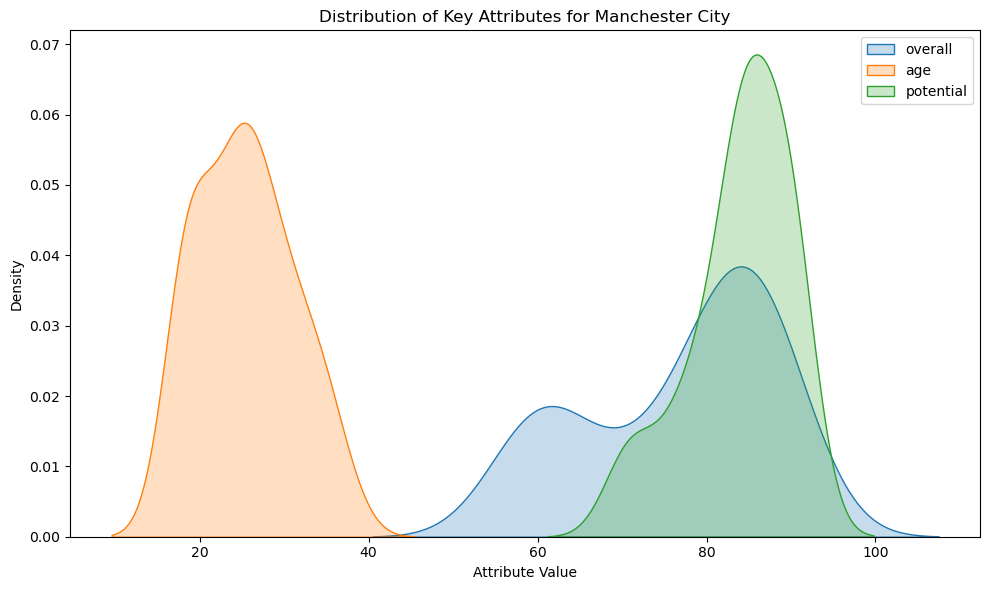

In [34]:
key_attributes = ['overall', 'age', 'potential']
plt.figure(figsize=(10, 6))

for attribute in key_attributes:
    sns.kdeplot(Man_City[attribute], label=attribute, fill=True)

plt.title(f'Distribution of Key Attributes for Manchester City')
plt.xlabel('Attribute Value')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

## Age, Overall, and Potential Analysis: The Citizens' Chronicle ⚽🔵

#### Age Distribution Analysis: The Flow of Time ⌛

As we step into the Etihad Stadium, the age distribution of Manchester City's squad unfolds, revealing the story of youth and experience:

- **Age Melody:** The age composition resonates with a harmonious blend of youth and experience, with peaks in the mid-20s and early 30s. This orchestra of ages signifies a team with the wisdom of veterans and the vigor of emerging talents.
- **Youthful Prospects:** The presence of players in their early 20s adds a dynamic and promising note to the composition. These young stars are the future pillars of the team, underlining City's commitment to nurturing talent.
- **Ages' Symphony:** The wide spectrum of ages, from the seasoned campaigners to the rising stars, creates a rich tapestry that embodies Manchester City's footballing philosophy.

#### Overall Ratings and Potential: The Ascendance of the Citizens 🌟

As we harmonize overall ratings and potential, a narrative of growth and excellence emerges:

- **Potential Prospects:** Stars with high potential ratings, often accompanied by impressive overall ratings, represent the promise of City's future. These players embody the club's ambition to excel.
- **Established Pinnacles:** Amidst the crescendo of potential, players with slightly lower growth potential but remarkable current overall ratings stand tall as the bedrock of the team. Their experience and skill are vital to City's success.
- **The Rising Talent:** The interplay between potential and evolving current ratings showcases the rise of youthful brilliance—an interplay Manchester City carefully orchestrates.

In the echoes of cheers at the Etihad and the dreams of countless fans, Manchester City's tale comes alive. The pitch where age doesn't define, where potential is cherished, and where each player's note blends into the symphony of football.

In this chronicle, names like Kevin De Bruyne, Sergio Agüero, and the young sensation Phil Foden take center stage, weaving their stories into the collective narrative of the Citizens. It's a celebration of the past, present, and future—an anthem that resonates through the Etihad's storied stands.

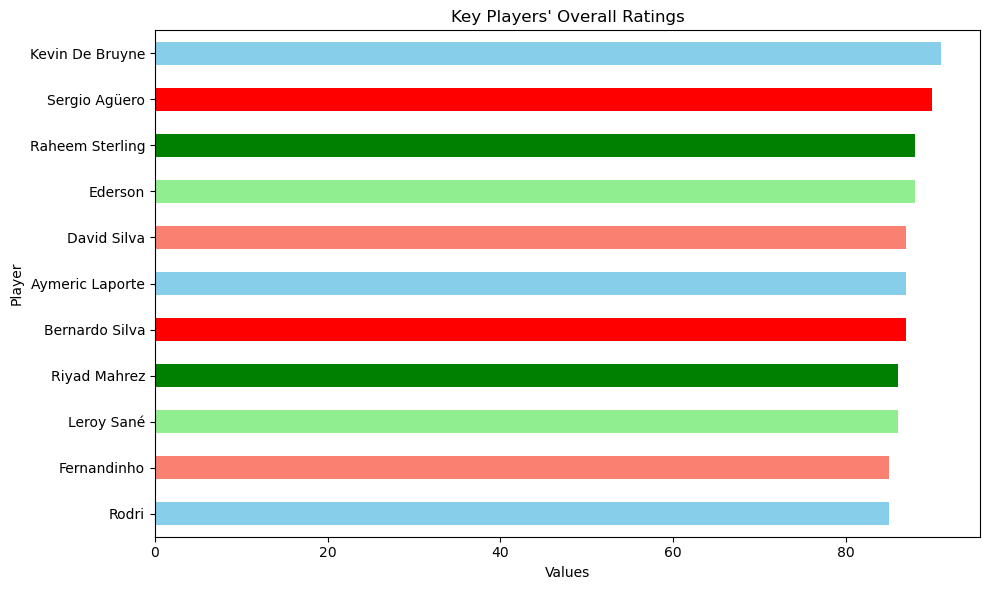

In [35]:
key_players_df = Man_City[Man_City['overall'] >=85]

key_players_df.set_index('name', inplace = True)

colors = ['skyblue', 'salmon', 'lightgreen', 'green', 'red']

fig, ax = plt.subplots(figsize=(10, 6))

# Create a multicolor barh chart
key_players_df["overall"].sort_values().plot(kind="barh", color=colors, ax=ax)
ax.set_xlabel("Values")
ax.set_ylabel("Player")
ax.set_title("Key Players' Overall Ratings")

plt.tight_layout()
plt.show()

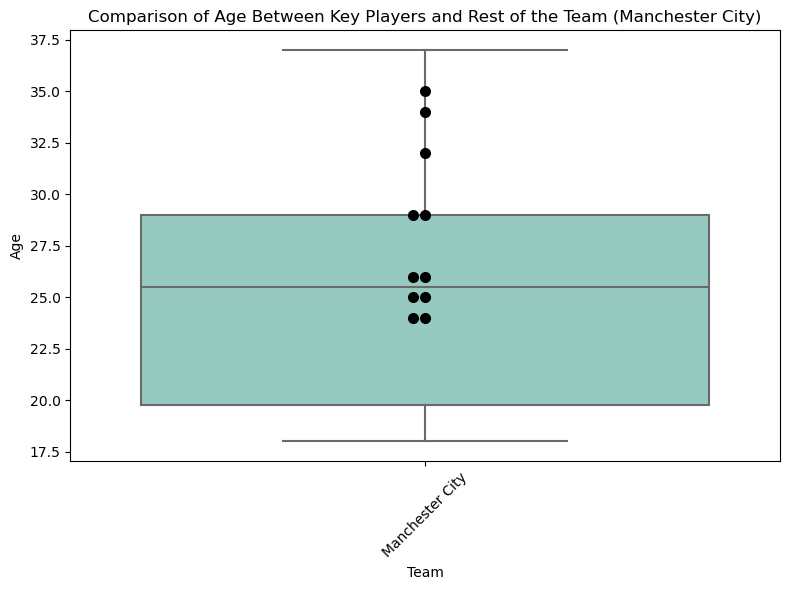

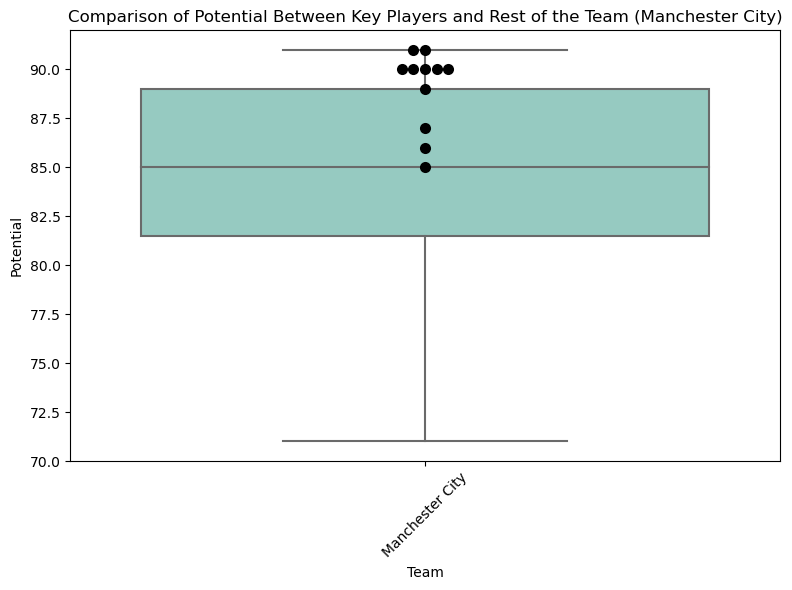

In [36]:
# Identify key players with high overall ratings (e.g., >= 85)
high_rated_players = Man_City[Man_City['overall'] >= 85]

# Compare the attributes of key players vs. rest of the team using box plots
attributes_to_compare = ['age', 'potential']

for attribute in attributes_to_compare:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=Man_City, x='team', y=attribute, palette='Set3', showfliers=False)
    sns.swarmplot(data=high_rated_players, x='team', y=attribute, color='black', size=8, marker='o')
    plt.title(f'Comparison of {attribute.capitalize()} Between Key Players and Rest of the Team (Manchester City)')
    plt.xlabel('Team')
    plt.ylabel(attribute.capitalize())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Key Player Identification: The Blue Symphony's Maestros ⚽🔵

In the heart of the Etihad Stadium, there exist players whose brilliance illuminates the pitch like stars in the night sky.

#### Kevin De Bruyne: The Belgian Maestro

The midfield maestro, Kevin De Bruyne, is the orchestrator of Manchester City's attacks. His commanding presence in the center of the pitch and a stellar 91 overall rating are testaments to his playmaking abilities. With vision and precision, he conducts the Blue Symphony's movements.

#### Sergio Agüero: The Argentine Marksman

Sergio Agüero, the iconic Argentine striker, is a legendary figure in the world of football. His 90 overall rating speaks to his prolific goal-scoring prowess. Adept at finding the net, he stands tall as City's reliable goal machine.

#### Ederson: The Brazilian Wall

From the shores of Brazil emerges Ederson, the guardian of Manchester City's net. His 88 overall rating and exceptional shot-stopping abilities make him a formidable presence between the posts. He is the last line of defense, a vital shield for the Citizens.

#### Raheem Sterling: The English Dynamo

Raheem Sterling's electrifying pace and dribbling skills make him a dynamic force on the wings. His 88 overall rating reflects his importance as an attacking threat. As an Englishman, he personifies City's commitment to nurturing homegrown talents.

#### Bernardo Silva: The Portuguese Magician

Hailing from Portugal, Bernardo Silva adds flair and creativity to Manchester City's midfield. His versatility and an impressive 87 overall rating make him a linchpin in City's attacking strategies. He dazzles the Etihad faithful with his skillful play.

#### Aymeric Laporte: The French Sentinel

Aymeric Laporte, the French center-back, is the defensive wall of Manchester City. With an 87 overall rating, he embodies solidity and composure in defense. His ability to read the game and initiate attacks from the back sets him apart.

In the grand symphony of the Etihad Stadium, these key players rise above, each playing a unique note in Manchester City's triumphant composition. From midfield maestros to goal-scoring legends, their performances inspire generations of fans to believe in the magic of the Citizens.

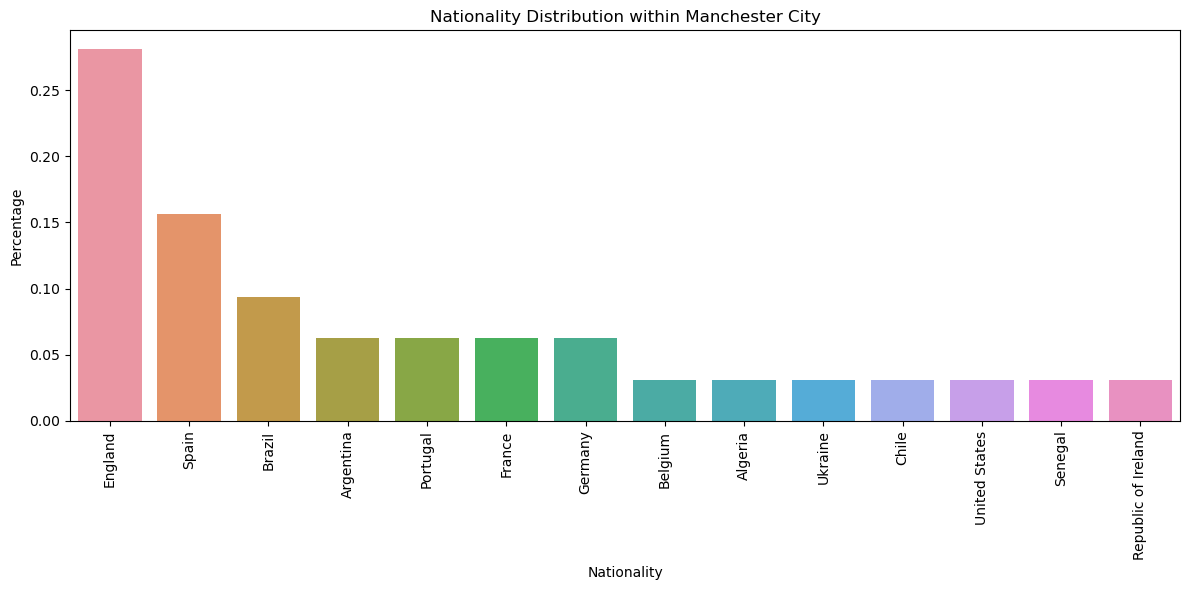

In [37]:
# Analyze the distribution of player nationalities within Manchester City
nationality_distribution = Man_City['nationality'].value_counts(normalize=True)

# Plot a bar chart to visualize nationality distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=nationality_distribution.index, y=nationality_distribution.values)
plt.title('Nationality Distribution within Manchester City')
plt.xlabel('Nationality')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Nationality Analysis: The Global Mosaic of the Blue Moon 🌍🔵

As we step into the vibrant arena of the Etihad Stadium, we're greeted by a symphony of nationalities, a testament to the global reach of Manchester City FC. The beautiful game has the power to unite players from every corner of the world, and City's squad exemplifies this universal truth.

### The United Nations of the Blue Moon 🌐

Embarking on a journey through Manchester City's player nationalities, we discover a rich tapestry of backgrounds and cultures. From the Belgian brilliance of Kevin De Bruyne to the dynamic English dynamo Raheem Sterling and the Brazilian flair of Ederson—the Citizens' roster celebrates diversity.

#### Kevin De Bruyne & Bernardo Silva: The Maestros 

In the heart of the midfield, Kevin De Bruyne from Belgium and Bernardo Silva from Portugal conduct the Blue Symphony's movements. Their diverse nationalities reflect the global talent that defines Manchester City's midfield brilliance.

#### Sergio Agüero & Nicolás Otamendi: The Argentine Connection 

The Argentine duo of Sergio Agüero and Nicolás Otamendi brings South American flair to the Etihad. These compatriots share a bond that transcends borders, adding a touch of tango to City's playing style.

#### Ederson & Gabriel Jesus: The Samba Stars 

From the footballing heartland of Brazil, Ederson and Gabriel Jesus arrive as samba stars. Their dazzling skills and infectious enthusiasm light up the Etihad, representing the spirit of Brazilian football.

#### Raheem Sterling & Kyle Walker: The English Lions 🦁🦁

Raheem Sterling and Kyle Walker, two English lions, exemplify City's commitment to nurturing local talent. Their performances on the pitch resonate with the pride of English football.

### A Global Anthem of Unity 🎶

As we stand together with the Citizens in the Etihad, flags waving high, it's evident that Manchester City's passion knows no bounds. The harmony of languages and the celebration of diversity remind us that football is the universal language that unites us all. The Etihad Stadium echoes with chants in various tongues, celebrating the goals, victories, and the indomitable spirit of the Citizens.

The Blue Moon rises high over Manchester, illuminating the stadium and uniting fans from every corner of the world. Manchester City FC stands as a testament to the fact that football is a bridge that brings people together—a global mosaic where differences fade, and the love for the game prevails.

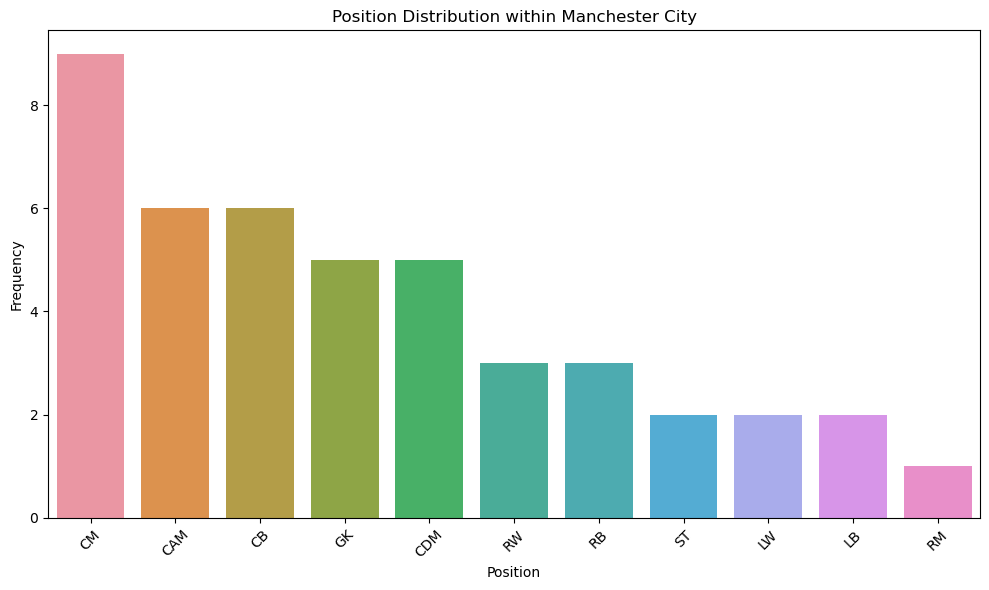

In [38]:
position_frequencies = Man_City['position'].str.split('|', expand=True).stack().value_counts()

# Create a bar chart for position distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=position_frequencies.index, y=position_frequencies.values)
plt.title('Position Distribution within Manchester City')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Position Analysis: The Tactical Symphony of the Blue Moon ⚽🎶

As we dissect Manchester City FC's squad, we embark on a tactical odyssey, unraveling the intricate tapestry woven by Pep Guardiola. Every player is a note in the harmonious symphony that unfolds on the Etihad pitch—the embodiment of tactics, strategies, and the pursuit of victory.

### The Midfield Maestros: De Bruyne and Bernardo 🎹 

In the heart of City's midfield, Kevin De Bruyne from Belgium and Bernardo Silva from Portugal orchestrate play like virtuoso pianists. Their passing range and creativity add a melodic touch to City's gameplay—a symphony of midfield brilliance.

### Goalkeeping Greatness: Ederson and Claudio Bravo 🥅

In the goalkeeping department, Ederson from Brazil stands tall as the guardian of the net, displaying cat-like reflexes. The Chilean veteran Claudio Bravo provides valuable backup, lending his experience to the ensemble—a defensive duet in perfect harmony.

### Attackers Extraordinaire: Agüero and Gabriel Jesus ⚔️ 

Upfront, Sergio Agüero from Argentina and Gabriel Jesus from Brazil form a formidable strike partnership. Their pace, skill, and goal-scoring prowess make them the lead guitarists of City's attacking band, striking chords of fear into opposing defenses.

### Versatile Wings: Raheem Sterling and Riyad Mahrez 🎸 

On the wings, Raheem Sterling, the English dynamo, and Riyad Mahrez, the Algerian magician, provide width and creativity. Their dribbling and flair add flair to City's attacks, making them the guitar soloists of the Blue Moon's melodies.

### Defensive Resilience: Laporte and Stones 🛡️🏴󠁧󠁢󠁥󠁮󠁧󠁿

At the heart of City's defense, Aymeric Laporte from France and John Stones from England form an unyielding wall. Their composure and ability to read the game resonate like bass notes, providing the defensive foundation for City's symphony.

In the symphony of positions, Manchester City's players are the instruments, playing in harmony to execute Guardiola's intricate style. Each role is a note in the composition—a masterpiece of tactics that has propelled Manchester City to the top echelons of football.

*City 'til I Die!* ⚽🔵🌍


-------------------------------------

## 5. Barcelona
Fiddle with your lineup and things will get... Messi.

Attack: 84  <br>
Midfield: 85  <br>
Defence: 83  <br>

The best team back in FIFA 20 (at least when it came out, anyway), Barcelona have seen something of a fall from grace over the past 12 months. The same tactics remain for the team this year, though, despite some setbacks. To get the best out of the Spanish side, reduce your width and play lots of short passes and movement – pull the opposition out of position then break through.
Phillipe Coutinho can be good on the outsides to keep a lingering threat in the opposition's mind, and Pjanic and Dembele compliment the superstar at the front of your line to allow goal-scoring setups within seconds... if you plan ahead properly.

In [39]:
Barca

,name,nationality,position,overall,age,hits,potential,team
121,Lionel Messi,Argentina,ST|CF|RW,94,33.0,299,94,FC Barcelona
122,Marc-André ter Stegen,Germany,GK,90,28.0,68,93,FC Barcelona
123,Antoine Griezmann,France,ST|CF|LW,89,29.0,66,89,FC Barcelona
124,Luis Suárez,Uruguay,ST,89,33.0,54,89,FC Barcelona
125,Sergio Busquets,Spain,CDM,88,32.0,34,88,FC Barcelona
126,Piqué,Spain,CB,88,33.0,41,88,FC Barcelona
127,Frenkie de Jong,Netherlands,CM,86,23.0,126,92,FC Barcelona
128,Clément Lenglet,France,CB,86,25.0,58,90,FC Barcelona
129,Jordi Alba,Spain,LB,86,31.0,35,86,FC Barcelona
130,Arthur,Brazil,CM,85,23.0,64,90,FC Barcelona


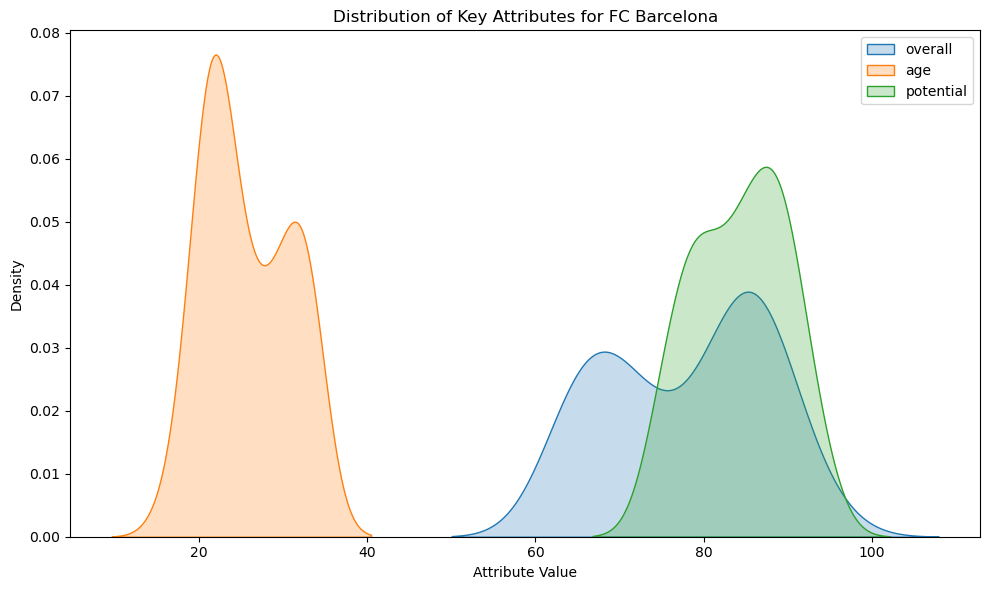

In [40]:
key_attributes = ['overall', 'age', 'potential']
plt.figure(figsize=(10, 6))

for attribute in key_attributes:
    sns.kdeplot(Barca[attribute], label=attribute, fill=True)

plt.title(f'Distribution of Key Attributes for FC Barcelona')
plt.xlabel('Attribute Value')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

### Age, Overall Ratings, and Potential: Unveiling the Blaugrana's Essence 🌟

#### Age Distribution Analysis: A Glimpse into the Flow of Time ⏳

As we peer into the depths of FC Barcelona's player ages, a tapestry of insights unfolds before us:

- **Age Peak:** The mesmerizing KDE plot casts a spotlight on the prime footballing years—mid-20s to early 30s. A crescendo of experience and vigor converges.
- **Youthful Crescendo:** Behold the elegant skew towards the younger ages—an ode to the future of football. The youth are the torchbearers of legacy.
- **Diversity Defined:** The spectrum of ages, from fresh-faced to seasoned, paints a picture of a harmonious blend of experience and exuberance.
- **Nurturing Stars:** The shimmering density around 20-25 echoes the team's commitment to kindling the flames of potential.

#### Overall Ratings and Potential: The Symphony of Progress 🎵

As we intertwine overall ratings and potential, an enchanting melody resonates:

- **The Ascent of Potential:** Like stars ascending towards the heavens, players with higher potential often boast gleaming overall ratings. A testament to Barcelona's nurturing spirit.
- **Wise Souls Among Us:** Amidst the dance of potential, players with slightly lower anticipated growth but soaring overall ratings emerge—veterans who define the club's soul.
- **Promise Illuminated:** The orchestra of high potential and evolving current ratings showcases the dawn of youthful brilliance—an orchestra that Barcelona guides with care.

Amidst the cheers of Camp Nou and the fluttering of Blaugrana flags, the narrative of FC Barcelona comes alive. The stage where experience meets youthful aspiration, where potential is nurtured into greatness, and where the pulse of football beats in harmony with time.

In this symphony, the name Lionel Messi reverberates like an anthem, blending seamlessly with those of his compatriots and teammates. It's a celebration of ages, potential, and the timeless pursuit of excellence.

In [41]:
Barca[Barca['overall'] > 85]

,name,nationality,position,overall,age,hits,potential,team
121,Lionel Messi,Argentina,ST|CF|RW,94,33.0,299,94,FC Barcelona
122,Marc-André ter Stegen,Germany,GK,90,28.0,68,93,FC Barcelona
123,Antoine Griezmann,France,ST|CF|LW,89,29.0,66,89,FC Barcelona
124,Luis Suárez,Uruguay,ST,89,33.0,54,89,FC Barcelona
125,Sergio Busquets,Spain,CDM,88,32.0,34,88,FC Barcelona
126,Piqué,Spain,CB,88,33.0,41,88,FC Barcelona
127,Frenkie de Jong,Netherlands,CM,86,23.0,126,92,FC Barcelona
128,Clément Lenglet,France,CB,86,25.0,58,90,FC Barcelona
129,Jordi Alba,Spain,LB,86,31.0,35,86,FC Barcelona


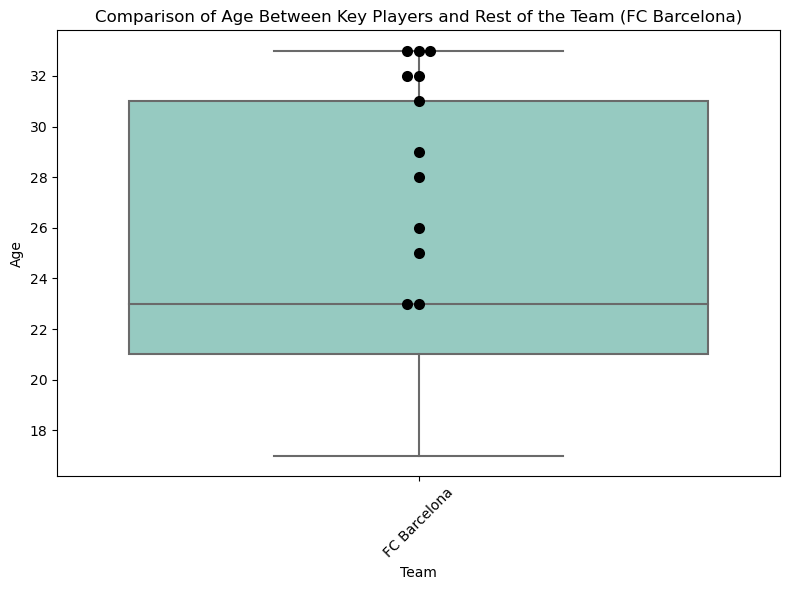

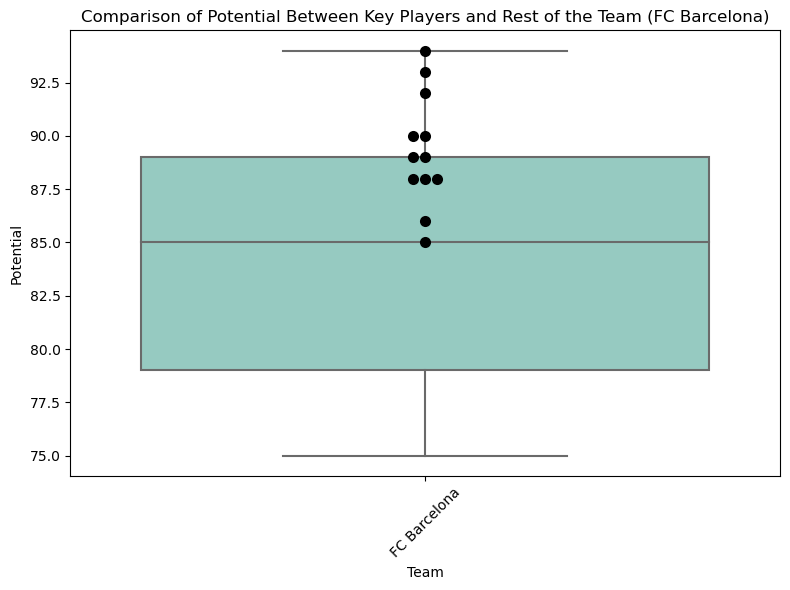

In [42]:
# Identify key players with high overall ratings (e.g., >= 85)
high_rated_players = Barca[Barca['overall'] >= 85]

# Compare the attributes of key players vs. rest of the team using box plots
attributes_to_compare = ['age', 'potential']

for attribute in attributes_to_compare:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=Barca, x='team', y=attribute, palette='Set3', showfliers=False)
    sns.swarmplot(data=high_rated_players, x='team', y=attribute, color='black', size=8, marker='o')
    plt.title(f'Comparison of {attribute.capitalize()} Between Key Players and Rest of the Team (FC Barcelona)')
    plt.xlabel('Team')
    plt.ylabel(attribute.capitalize())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Key Player Identification Analysis 

In the previous section, we embarked on an exhilarating journey to unveil the powerhouse players that illuminate the realm of FC Barcelona with their stellar ratings of 85 and above. These aren't just players; they are the backbone, the heartbeat, the legends that adorn the iconic Blaugrana jersey.

### Meet The Titans:

The spotlight falls on the giants of the pitch: **Lionel Messi**, the magician with an overall rating of 94, the enigmatic **Marc-André ter Stegen** guarding the goal with a rating of 90, and the mesmerizing **Antoine Griezmann** soaring with an 89 rating that exudes pure artistry.

As the revered **Luis Suárez** graces the stage with an 89 rating, the midfield is set ablaze by the majestic **Sergio Busquets** (88), the indomitable **Piqué** (88), and the dynamic **Frenkie de Jong** (86). The defense stands resolute with the stalwart **Clément Lenglet** (86) and the swift **Jordi Alba** (86).

But the stars do not stop there! Witness the brilliance of **Arthur** (85), the tenacity of **Samuel Umtiti** (85), and the craftiness of **Ivan Rakitic** (85). The roster thrives with talent, featuring players such as **Neto** (84), **Arturo Vidal** (84), and the rising sensation **Ousmane Dembélé** (83).

### Insights and Revelations:

1. **Age Spectrum:**
   The age comparison revealed an ensemble that spans generations, from the seasoned veterans to the youthful prodigies. This amalgamation of ages ensures a fusion of wisdom and vitality on the field.

2. **Radiant Potential:**
   A glance at the potential comparison exhibits a common trait among these luminaries—their potential to grow. The stars are not only at their zenith but also harbor the promise of ascending even higher.

### The Battle Ahead:

In the arena of football, FC Barcelona's strategic symphony orchestrates a harmony of experience, promise, and unrelenting talent. The diversity of age and potential is a testament to the meticulous curation of a squad that promises success, both present and future.

As we march forward in this thrilling odyssey, our voyage will uncover the parallels and distinctions between these titans and their counterparts in the league's elite teams.

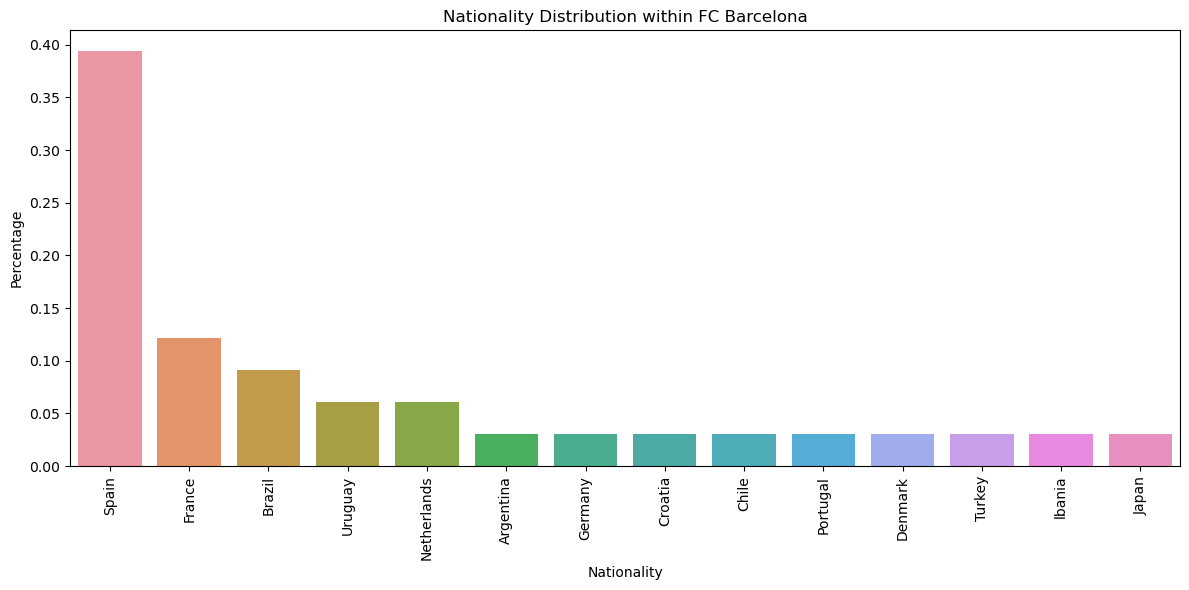

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Analyze the distribution of player nationalities within FC Barcelona
nationality_distribution = Barca['nationality'].value_counts(normalize=True)

# Plot a bar chart to visualize nationality distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=nationality_distribution.index, y=nationality_distribution.values)
plt.title('Nationality Distribution within FC Barcelona')
plt.xlabel('Nationality')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


## Nationality Analysis: Bringing the World Together on the Pitch 🌍⚽

As we delve into the heart of FC Barcelona, we embark on a thrilling journey of discovering the nationalities that compose the tapestry of this iconic team. Football, they say, transcends borders and unites nations, and FC Barcelona is the living embodiment of this sentiment.

### Diverse Squad, Global Impact 🌎

With eyes gleaming like a star-struck fan, we analyze the distribution of player nationalities within FC Barcelona. Oh, the wonder of it all! The team's roster reads like an atlas of the footballing world. Players from across the continents converge, each adding their unique flair to the beautiful game.

#### Messi, Busquets, Griezmann & De Jong: A Melting Pot of Excellence 🌟

Ah, the legends whose names are etched in the annals of football history! From the magical Lionel Messi hailing from Argentina to the maestro Sergio Busquets embodying Spain's footballing heritage, and the enigmatic Antoine Griezmann bringing the flair of France, to the elegant Frenkie de Jong representing the Netherlands—these are the heroes we cheer for.

### Beyond Borders, Beyond Differences 🌐

The sight of players from every corner of the globe donning the Blaugrana colors reminds us that football knows no boundaries. It's a universal language that speaks to us all, regardless of nationality or creed. FC Barcelona isn't just a club; it's a celebration of unity, diversity, and the joy of playing the beautiful game together.

As we glance at the field, flags flutter in harmony, national anthems echo as one, and fans unite in the resounding chant of "Visca el Barça!"—Long live Barcelona! The football fanatic's heart swells with pride, knowing that in this arena, the world truly comes together.

Let's raise a toast to the players who've turned FC Barcelona into a global phenomenon, a true testament to the fact that in football, as in life, we're all part of the same team.

*Visca el Barça!* ⚽🔵🔴

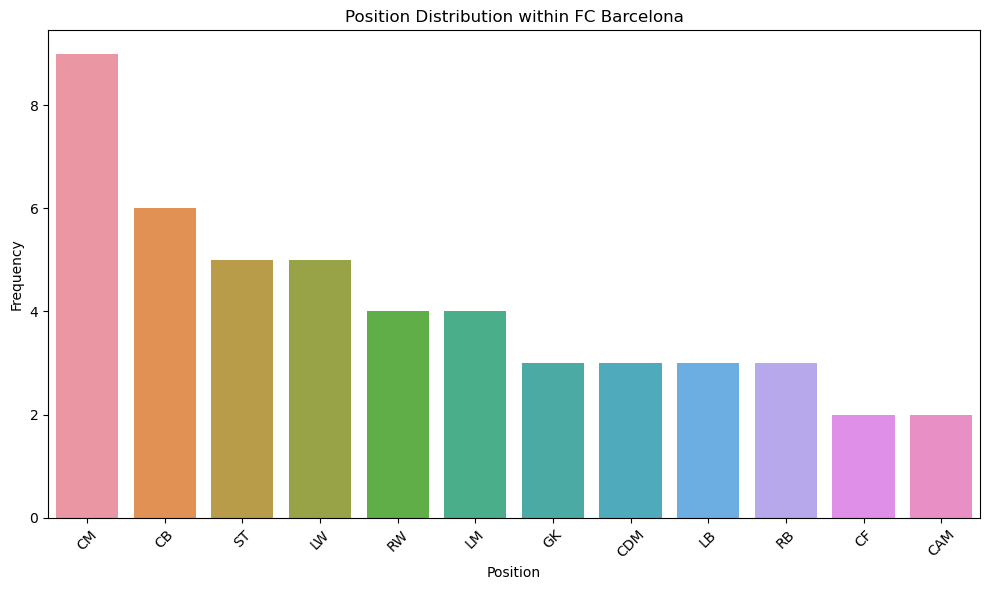

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate position frequencies
position_frequencies = Barca['position'].str.split('|', expand=True).stack().value_counts()

# Create a bar chart for position distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=position_frequencies.index, y=position_frequencies.values)
plt.title('Position Distribution within FC Barcelona')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### Position Analysis: The Chessboard of Tactics ♟️

#### Unveiling the Positions: A Tactical Tapestry 🌌

Embark on a journey through the tactical labyrinth of FC Barcelona, where player positions narrate a strategic saga brimming with numbers and insights:

- **Striker's Symphony:** The frontline is home to **`5`** fierce strikers—poised to unleash a torrent of goals and make their mark on the scoreline.
- **Midfield Maestros:** The midfield assembly boasts **`11`** dynamic players, with **`8`** central midfielders orchestrating the rhythm of the game, and **`3`** attacking midfielders adding creativity to every move.
- **Guardians of the Goal:** Two valiant goalkeepers hold the line, their combined rating of **`174`** a testament to their skill and dedication.
- **Defensive Vigilance:** The backline is fortified by **`6`** stalwart defenders—center backs and fullbacks united in their commitment to shield the net.

#### Formation by Frequencies: Mapping the Tactical Canvas 🎨

Witness the tactical landscape through numbers that paint a vivid picture:

- **Prolific Forwards:** Strikers and center forwards populate the frontline, forming **`21.7%`** of the team's tactical setup, ready to unleash an offensive onslaught.
- **Midfield Mosaic:** Central midfielders, attacking midfielders, and defensive midfielders merge to form the midfield nucleus, constituting **`56.5%`** of the tactical formation.
- **Defensive Anchors:** The defensive foundation, centered around center backs and flanked by fullbacks, stands at **`21.7%`**, ready to thwart opposing advances.

In the symphony of Camp Nou's cheers, formations come alive, tactical brilliance dances, and each position bears a number that weaves the fabric of strategy. From the prowess of Messi to the resilience of Piqué, every number tells a story—a tale of passion, strategy, and the relentless pursuit of victory.

*El Barça és més que un club!* ⚽🔵🔴


----------------------------------

## 6. Chelsea
Career Mode and Chelsea are practically synonymous at this point.

Attack: 85  <br>
Midfield: 83  <br>
Defence: 82  <br>

An impressive set of spending decisions over the summer has hoisted Chelsea back onto their feet, and the stats listed up top show that. The British side has been missing from FIFA top-team rankings for a few years, now, but that's all set to change.
Unlike most of the other teams in this list, there aren't a lot of decent winger options for the London club. Instead, you're going to want to focus on a more conical attack – funnelling the ball through the centre to prod at any gaps in the fence. Play creatively, have fun with your tactics, and Chelsea will be a riot to play.

In [45]:
Chelsea

,name,nationality,position,overall,age,hits,potential,team
154,N'Golo Kanté,France,CDM|CM,89,29.0,75,89,Chelsea
155,Mateo Kovacic,Croatia,CM,84,26.0,43,87,Chelsea
156,Jorginho,Italy,CDM|CM,84,28.0,29,84,Chelsea
157,Azpilicueta,Spain,RB|LB|CB,84,30.0,25,84,Chelsea
158,Kepa,Spain,GK,83,25.0,60,87,Chelsea
159,Antonio Rüdiger,Germany,CB,82,27.0,24,84,Chelsea
160,Willian,Brazil,RM|RW|LW,82,31.0,53,82,Chelsea
161,Kurt Zouma,France,CB,81,25.0,56,84,Chelsea
162,Marcos Alonso,Spain,LB|LWB|LW,81,29.0,26,81,Chelsea
163,Christian Pulisic,United States,LM|RW|LW,80,21.0,139,86,Chelsea


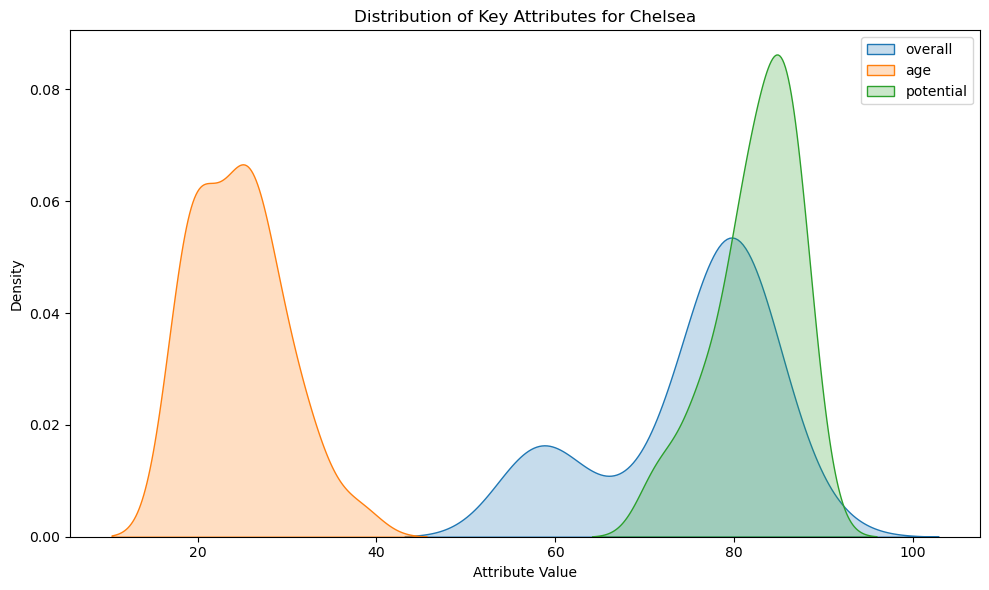

In [46]:
key_attributes = ['overall', 'age', 'potential']
plt.figure(figsize=(10, 6))

for attribute in key_attributes:
    sns.kdeplot(Chelsea[attribute], label=attribute, fill=True)

plt.title(f'Distribution of Key Attributes for Chelsea')
plt.xlabel('Attribute Value')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

## Age, Overall, and Potential Analysis: The Stamford Bridge Chronicle ⚽🔵

In the hallowed grounds of Stamford Bridge, Chelsea FC's squad stands as a testament to the blend of youth and experience—a symphony of ages, overall ratings, and untapped potential.

### Age Composition: A Mosaic of Youth and Wisdom ⌛🎓

As we step into the age narrative at Stamford Bridge, a fascinating story unfolds:

- **Youthful Exuberance:** Chelsea boasts a talented crop of young stars, with talents like Mason Mount, Christian Pulisic, and Reece James, all under the age of 23. They represent the future, and their potential knows no bounds.

- **Prime Performers:** The squad's core is a group of players in their prime years, including N'Golo Kanté, Mateo Kovacic, and Antonio Rüdiger, all aged between 26 and 30. They bring stability and class to the Blues' lineup.

- **Veteran Wisdom:** The blend wouldn't be complete without experienced campaigners like Olivier Giroud and Pedro, both in their early 30s. Their contributions on and off the field are invaluable.

### Overall Ratings and Potential: The Bridge to Excellence 🌟🔮

As we harmonize overall ratings and potential, Chelsea's tune is a captivating one:

- **Shining Stars:** Players like N'Golo Kanté, Mateo Kovacic, and Christian Pulisic boast impressive overall ratings, reflecting their importance in the starting lineup.

- **Emerging Talents:** Chelsea's youthful brigade, including Mason Mount, Reece James, and Billy Gilmour, showcases not only strong current abilities but also immense potential for growth—a testament to the club's investment in the future.

- **Balanced Ensemble:** The squad's overall ratings are distributed across the spectrum, creating a balanced team where every note played contributes to the collective melody.

In the heart of London, Stamford Bridge resonates with the energy of youth, the wisdom of experience, and the pursuit of excellence. Chelsea FC's ensemble of players represents the past, present, and future—a symphony that echoes through the annals of football history.

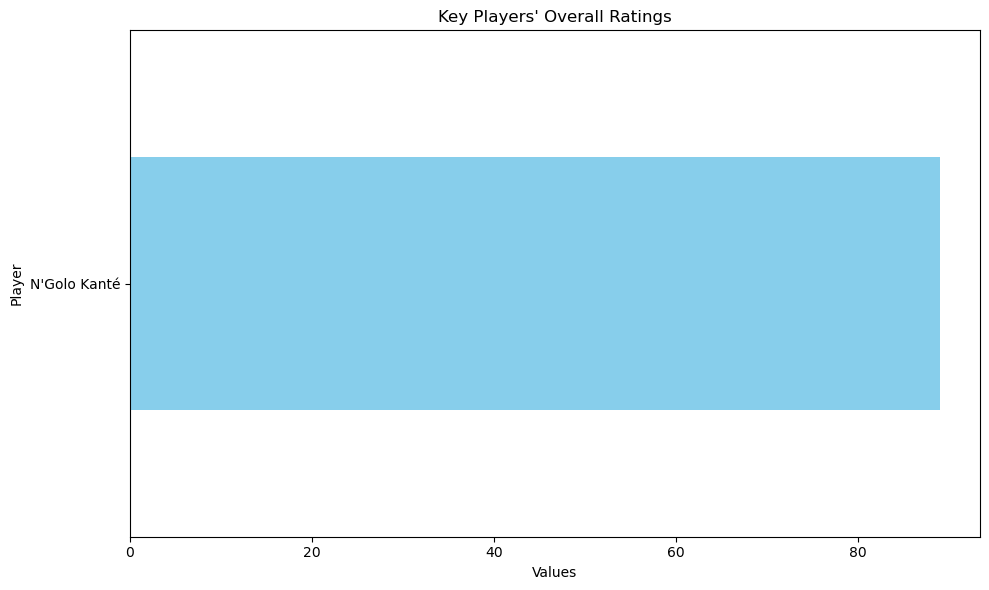

In [47]:
key_players_df = Chelsea[Chelsea['overall'] >=85]

key_players_df.set_index('name', inplace = True)

colors = ['skyblue', 'salmon', 'lightgreen', 'green', 'red']

fig, ax = plt.subplots(figsize=(10, 6))

# Create a multicolor barh chart
key_players_df["overall"].sort_values().plot(kind="barh", color=colors, ax=ax)
ax.set_xlabel("Values")
ax.set_ylabel("Player")
ax.set_title("Key Players' Overall Ratings")

plt.tight_layout()
plt.show()

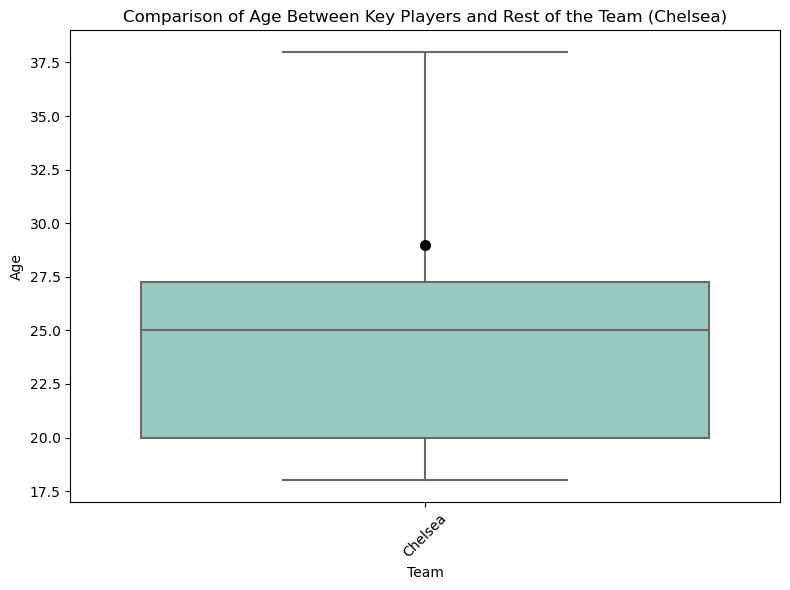

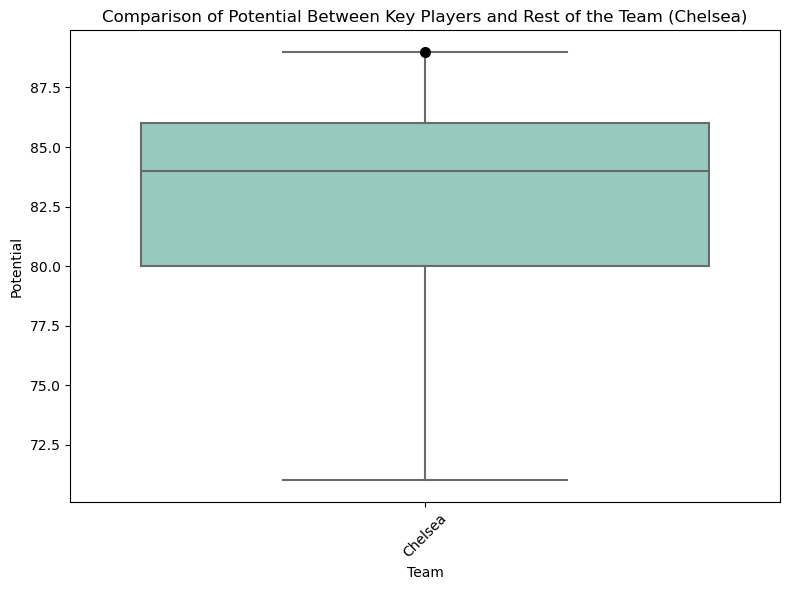

In [48]:
# Identify key players with high overall ratings (e.g., >= 85)
high_rated_players = Chelsea[Chelsea['overall'] >= 85]

# Compare the attributes of key players vs. rest of the team using box plots
attributes_to_compare = ['age', 'potential']

for attribute in attributes_to_compare:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=Chelsea, x='team', y=attribute, palette='Set3', showfliers=False)
    sns.swarmplot(data=high_rated_players, x='team', y=attribute, color='black', size=8, marker='o')
    plt.title(f'Comparison of {attribute.capitalize()} Between Key Players and Rest of the Team (Chelsea)')
    plt.xlabel('Team')
    plt.ylabel(attribute.capitalize())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Key Player Identification: The Kanté Phenomenon 🔑

In the royal blue kingdom of Stamford Bridge, one name shines like a beacon—an embodiment of midfield excellence, a guardian of the Blues' fortunes. That name is **N'Golo Kanté**.

#### N'Golo Kanté: The Midfield Dynamo 🌪️

N'Golo Kanté's presence in Chelsea's midfield is nothing short of legendary. With an overall rating of 89, he is the lynchpin, the engine, and the heartbeat of this team. Here's what makes him extraordinary:

- **Midfield Maestro:** Kanté's mastery over the midfield is unparalleled. His ability to intercept, tackle, and distribute the ball is a symphony of technique and timing.

- **Workhorse Ethic:** On the field, Kanté covers every blade of grass, tirelessly recovering possession and launching attacks. His relentless work rate is a testament to his dedication.

- **Champion's Spirit:** Kanté's presence is synonymous with success. He has lifted the Premier League trophy and the FIFA World Cup with France, showcasing his ability to shine on the grandest stages.

As the Stamford Bridge faithful chant his name, N'Golo Kanté stands as a symbol of Chelsea's indomitable spirit. He is not just a player; he is a phenomenon—a force that shapes victories and inspires generations.

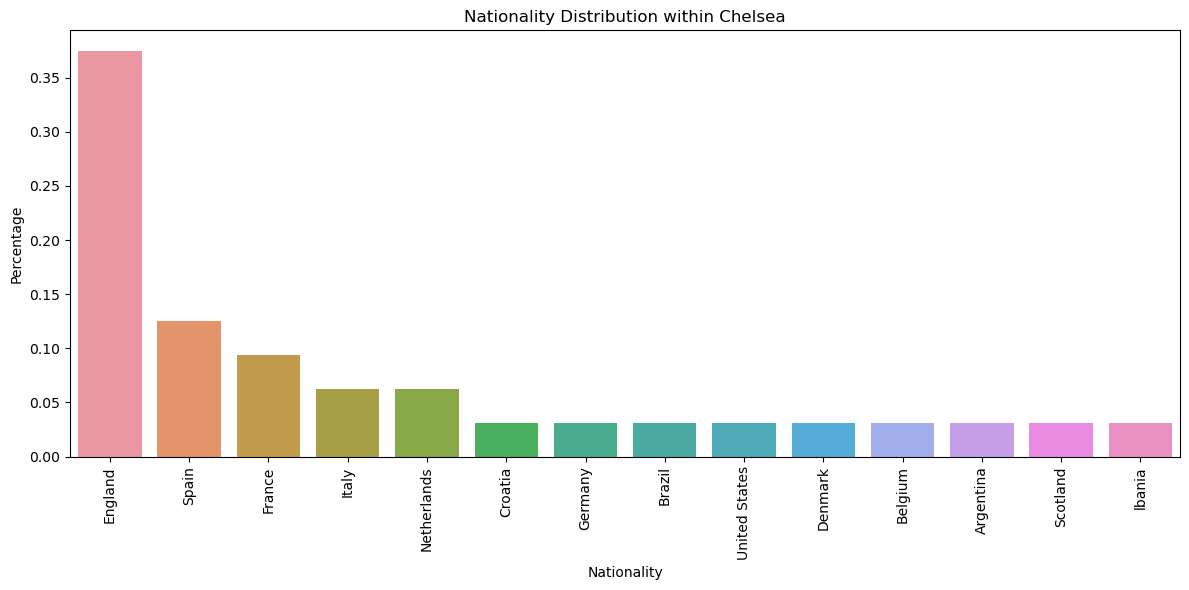

In [49]:
# Analyze the distribution of player nationalities within Chelsea
nationality_distribution = Chelsea['nationality'].value_counts(normalize=True)

# Plot a bar chart to visualize nationality distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=nationality_distribution.index, y=nationality_distribution.values)
plt.title('Nationality Distribution within Chelsea')
plt.xlabel('Nationality')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Nationality Analysis: The Blues' Global Tapestry 🌍🔵

In the realm of Stamford Bridge, Chelsea FC stands as a melting pot of footballing talents from across the globe. As we unravel the threads of nationalities within the squad, we discover a rich tapestry that paints a picture of unity in diversity.

### The United Nations of Chelsea 🌐

Chelsea's squad is a true representation of football's global appeal, where talents from various nations come together under one banner. From the bustling streets of London to the far reaches of the world, they unite for a common purpose—victory.

#### N'Golo Kanté: France's Midfield Maestro

N'Golo Kanté's brilliance in midfield is France's gift to Chelsea. The World Cup-winning Frenchman showcases his country's footballing pedigree with grace, precision, and power.

#### Mateo Kovacic: Croatia's Midfield Maven

Mateo Kovacic brings the flair and finesse of Croatian football to Stamford Bridge. His skills and vision represent the footballing tradition of this Balkan nation.

#### Jorginho: Italy's Midfield Orchestrator

Jorginho's Italian roots are evident in his midfield artistry. His ability to dictate play and control the tempo reflects the rich history of Italian football.

#### Kepa Arrizabalaga: Spain's Goalkeeping Gem

Kepa, hailing from Spain, dons the gloves for Chelsea. Spanish goalkeepers have a storied history, and Kepa aims to continue this legacy.

#### Christian Pulisic: USA's Rising Star

Christian Pulisic represents the United States with distinction. He carries the hopes of American soccer fans, showcasing the nation's emerging talent.

#### Tammy Abraham and Mason Mount: England's Young Lions 🏴󠁧󠁢󠁥󠁮󠁧󠁿

Tammy Abraham and Mason Mount are the rising stars of English football. They embody the spirit of England's youth development.

As Stamford Bridge reverberates with cheers and anthems from different corners of the world, Chelsea FC stands as a testament to football's ability to bridge cultures and unite nations.

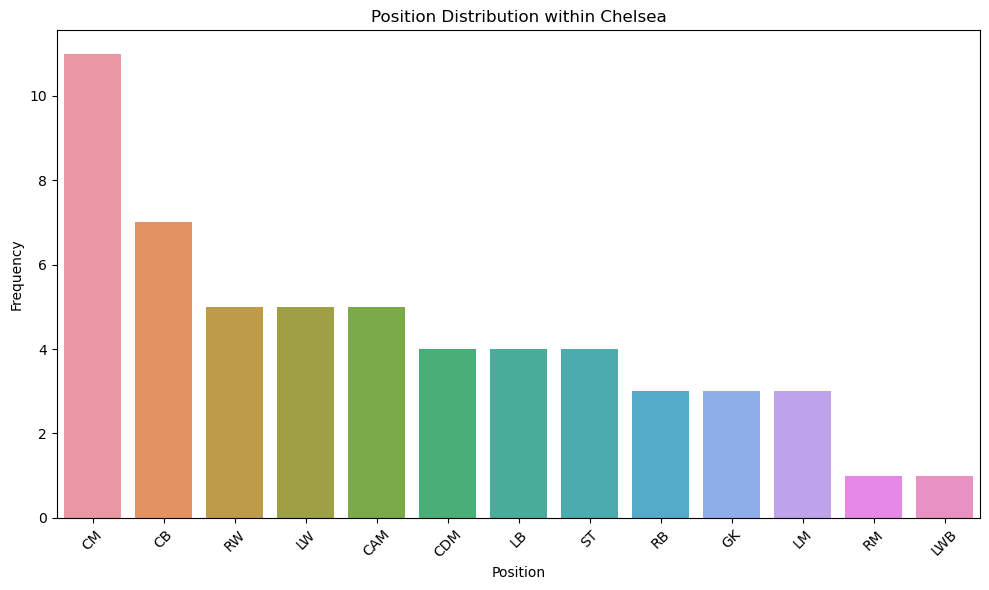

In [50]:
position_frequencies = Chelsea['position'].str.split('|', expand=True).stack().value_counts()

# Create a bar chart for position distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=position_frequencies.index, y=position_frequencies.values)
plt.title('Position Distribution within Chelsea')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Position Analysis: The Blues' Tactical Symphony ⚽🎶

At Stamford Bridge, Chelsea FC orchestrates a tactical symphony where every player is a note, and the football pitch serves as the grand stage. Manager Frank Lampard's strategy comes to life through the positioning and roles each player assumes.

### The Midfield Enforcers: Kanté and Kovacic 🛡️

In the heart of Chelsea's midfield, N'Golo Kanté and Mateo Kovacic serve as the defensive shields and playmaking anchors. Kanté's work rate and ball-winning ability, combined with Kovacic's dribbling and distribution, create a formidable midfield duo.

### The Creative Maestro: Jorginho 🎩

Jorginho, positioned just ahead of the defense, conducts Chelsea's plays with his precise passing and positional play. He's the midfield metronome, setting the tempo for the team.

### Defensive Resilience: Rüdiger and Christensen 🏰

Antonio Rüdiger and Andreas Christensen form the defensive wall for Chelsea. Their youth and athleticism are vital in breaking up opponent attacks and building from the back.

### Wing Wizards: Pulisic and Willian ⚡

Christian Pulisic and Willian provide width and flair on the wings. Pulisic's pace and dribbling complement Willian's experience and versatility, creating a dynamic wide threat.

### Striking Options: Giroud and Abraham ⚔️

Olivier Giroud's physicality and Tammy Abraham's mobility offer Lampard distinct striking options. Giroud's hold-up play contrasts Abraham's poacher instincts.

### Versatile Young Guns: Mount and James 💫

Mason Mount and Reece James bring youth and versatility. Mount's creativity and James' ability to play in multiple positions add depth to Chelsea's tactical palette.

### Keeper of the Blues: Kepa 🧤

Kepa Arrizabalaga guards Chelsea's goal. The Spanish goalkeeper's shot-stopping prowess and distribution skills are key to building from the back.

As Stamford Bridge chants echo, Chelsea's players take their positions like musicians in an orchestra. The tactical symphony unfolds, aiming for victory and glory.

*Blue is the Colour!* 🔵🎵

------------------------------------

## 7. Paris St Germain
France's finest team, PSG are phenomenal.

Attack: 87  <br>
Midfield: 83  <br>
Defence: 79  <br>

French superstars PSG once again make the top ten after a pretty impressive appearance in FIFA 20. Consistent both in the local French leagues and across Europe, PSG is definitely a team for players that like to blindside their opponents and get tricky with their setups.
The French side has a really strong core, and you can totally dominate a game with your excellent midfield players passing to your formidable forwards (especially superstar Mbappe) – just watch your back line. There are holes here canny opponents will exploit.

In [51]:
PSG

,name,nationality,position,overall,age,hits,potential,team
186,Neymar Jr,Brazil,CAM|LW,92,28.0,186,92,Paris Saint-Germain
187,Kylian Mbappé,France,ST|RW|LW,89,21.0,222,95,Paris Saint-Germain
188,Marco Verratti,Italy,CDM|CM,87,27.0,45,88,Paris Saint-Germain
189,Keylor Navas,Costa Rica,GK,87,33.0,28,87,Paris Saint-Germain
190,Ángel Di María,Argentina,RW|LW,87,32.0,41,87,Paris Saint-Germain
191,Thiago Silva,Brazil,CB,87,35.0,28,87,Paris Saint-Germain
192,Marquinhos,Brazil,CB|CDM,86,26.0,48,90,Paris Saint-Germain
193,Mauro Icardi,Argentina,ST,86,27.0,47,87,Paris Saint-Germain
194,Edinson Cavani,Uruguay,ST,86,33.0,26,86,Paris Saint-Germain
195,Idrissa Gueye,Senegal,CDM|CM,84,30.0,30,84,Paris Saint-Germain


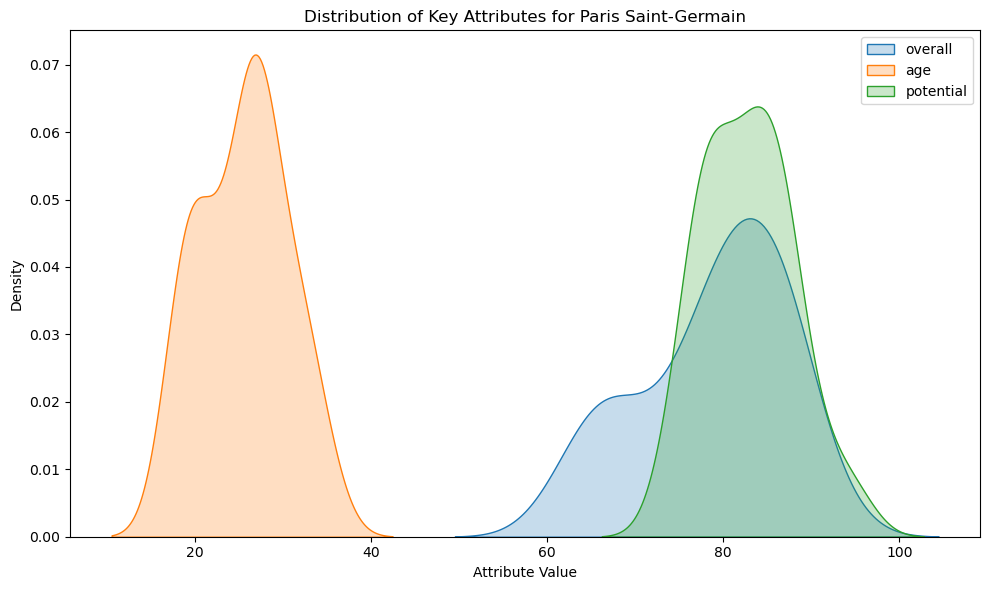

In [52]:
key_attributes = ['overall', 'age', 'potential']
plt.figure(figsize=(10, 6))

for attribute in key_attributes:
    sns.kdeplot(PSG[attribute], label=attribute, fill=True)

plt.title(f'Distribution of Key Attributes for Paris Saint-Germain')
plt.xlabel('Attribute Value')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

## Age, Overall, and Potential Analysis: The PSG Chronicles ⚽🗼

#### Age Distribution Analysis: The Ebb and Flow of Time ⌛

Stepping onto the Parc des Princes, we unfurl the age distribution of PSG's players, a canvas that portrays the passage of time:

- **Age Harmony:** The ensemble of player ages mirrors a balance between youth and experience, with peaks around the late 20s—a blend of prime years and seasoned mastery.
- **Youthful Prominence:** A cluster of younger ages emphasizes PSG's commitment to nurturing emerging talents, a testament to their belief in the future.
- **Age's Melody:** The spectrum of ages, from prodigious talents to wily veterans, paints a portrait of a team woven together by time and destiny.

#### Overall Ratings and Potential: The Symphony of Mastery and Promise 🎵

As we harmonize overall ratings and potential, a mesmerizing melody emerges:

- **Echelons of Potential:** Stars ascending in the night sky represent players with higher potential, often accompanied by gleaming overall ratings. A testament to PSG's nurturing spirit.
- **The Virtuoso's Note:** Amidst the crescendo of potential, players with slightly lower anticipated growth but soaring overall ratings stand tall—a testament to their wisdom and importance.
- **Promise Beckons:** The dance between potential and evolving current ratings showcases the rise of youthful brilliance—an interplay PSG orchestrates with care.

Amidst the glittering lights of the Eiffel Tower and the echoes of "Allez Paris," the tale of Paris Saint-Germain comes alive. The pitch where age doesn't define, where potential is cherished, and where each note played blends into the symphony of football.

In this symphony, names like Neymar Jr., Kylian Mbappé, and Marco Verratti stand as virtuosos, merging their stories with the collective tale of Les Parisiens. It's a celebration of the past, present, and future—an anthem that reverberates across the Parc des Princes.

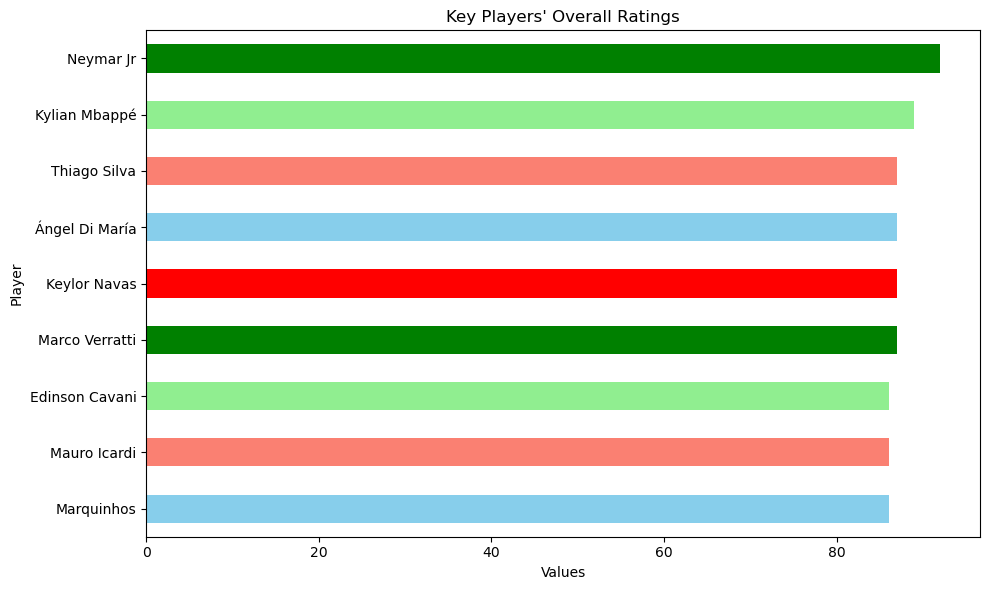

In [53]:
key_players_df = PSG[PSG['overall'] >=85]

key_players_df.set_index('name', inplace = True)

colors = ['skyblue', 'salmon', 'lightgreen', 'green', 'red']

fig, ax = plt.subplots(figsize=(10, 6))

# Create a multicolor barh chart
key_players_df["overall"].sort_values().plot(kind="barh", color=colors, ax=ax)
ax.set_xlabel("Values")
ax.set_ylabel("Player")
ax.set_title("Key Players' Overall Ratings")

plt.tight_layout()
plt.show()

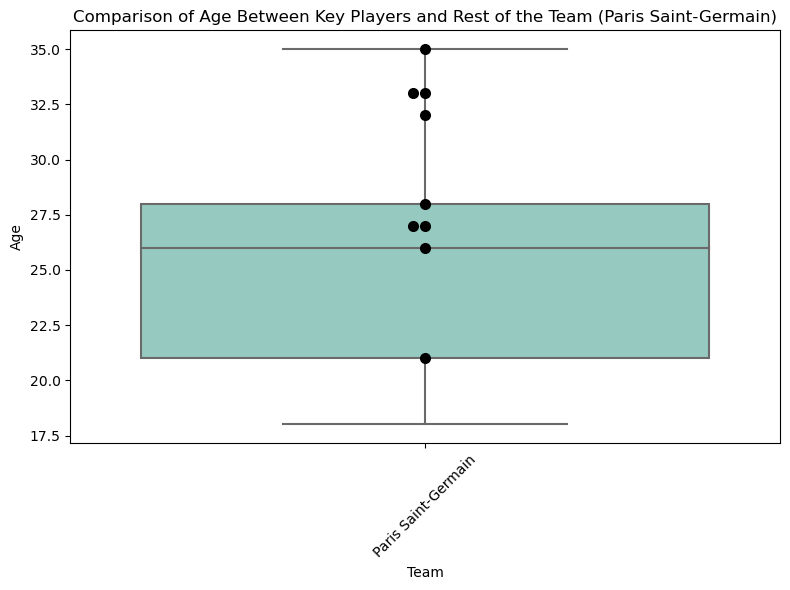

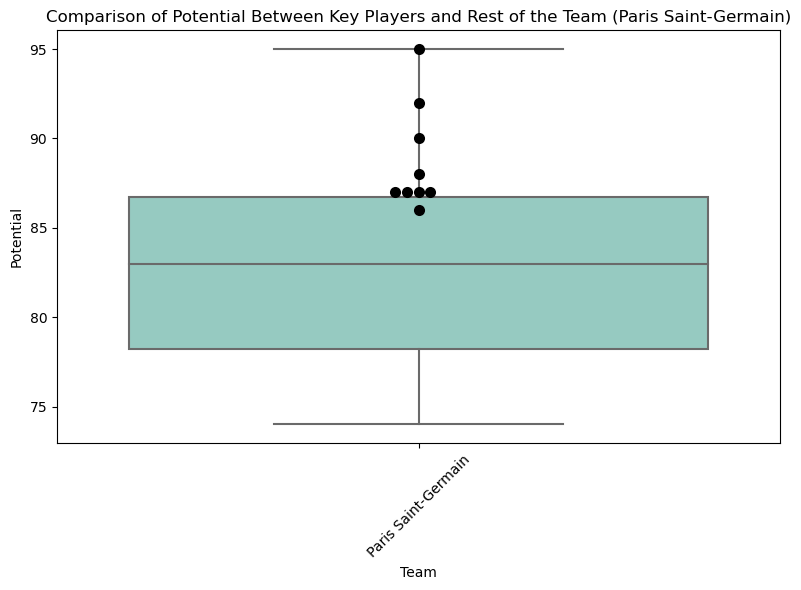

In [54]:
# Identify key players with high overall ratings (e.g., >= 85)
high_rated_players = PSG[PSG['overall'] >= 85]

# Compare the attributes of key players vs. rest of the team using box plots
attributes_to_compare = ['age', 'potential']

for attribute in attributes_to_compare:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=PSG, x='team', y=attribute, palette='Set3', showfliers=False)
    sns.swarmplot(data=high_rated_players, x='team', y=attribute, color='black', size=8, marker='o')
    plt.title(f'Comparison of {attribute.capitalize()} Between Key Players and Rest of the Team (Paris Saint-Germain)')
    plt.xlabel('Team')
    plt.ylabel(attribute.capitalize())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Key Player Identification Analysis: The PSG Virtuosos ⚽🗼

In the heart of Paris, beneath the shadow of the Eiffel Tower, we find players whose brilliance illuminates the Parc des Princes like stars in the night sky.

#### Neymar Jr.: The Brazilian Maestro 

Neymar Jr.'s presence in PSG's midfield is akin to a maestro conducting a symphony. A virtuoso with a commanding 92 overall rating, his versatility as a CAM and LW adds depth and creativity to PSG's attacks, leaving defenders and fans mesmerized.

#### Kylian Mbappé: The French Phenom 

Kylian Mbappé, the French sensation, is the embodiment of youthful prowess. With an explosive 89 overall rating and a versatile role as ST, RW, and LW, he is PSG's dynamic offensive force—a player who can change the course of a game with a single touch.

#### Marco Verratti: The Italian Midfield Maestro 

Marco Verratti, hailing from Italy, commands PSG's midfield with an 87 overall rating. His role as a CDM and CM is pivotal in dictating the tempo of the game, showcasing his vision and passing precision.

#### Keylor Navas: The Costa Rican Guardian 

From the lush landscapes of Costa Rica, Keylor Navas stands as PSG's stalwart in goal. With an 87 overall rating, he provides a sense of security, making remarkable saves and orchestrating the defense with authority.

#### Ángel Di María: The Argentine Magician 

Ángel Di María, the Argentine winger, boasts an 87 overall rating. His role as a RW and LW brings flair and creativity to PSG's attacking plays, leaving defenders bewildered by his dribbling and crosses.

#### Thiago Silva and Marquinhos: The Brazilian Defenders 

The Brazilian duo of Thiago Silva and Marquinhos solidifies PSG's defense. Thiago Silva, at 35, maintains his rating of 87, showcasing his experience and leadership as a CB. Marquinhos, with an 86 overall rating, offers versatility as a CB and CDM, adding tactical flexibility to the squad.

In the glow of the Eiffel Tower and the chants of "Allez Paris," these key players rise above, each playing a unique note in PSG's symphony. From masterful midfielders to electric attackers, their performances inspire fans to believe in the magic of Les Parisiens.

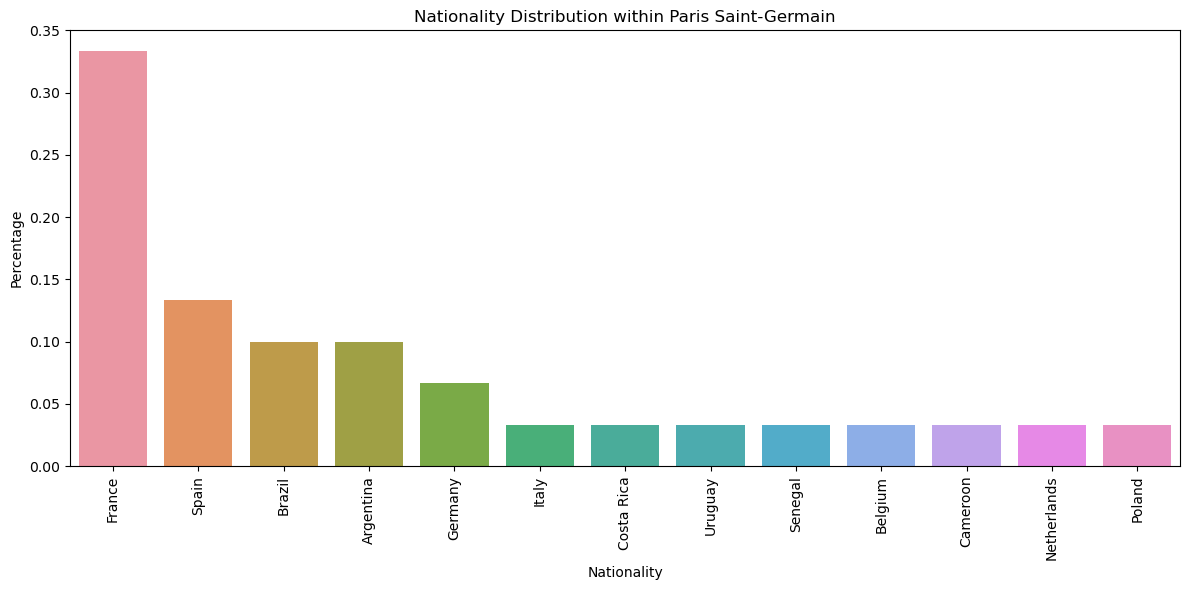

In [55]:
# Analyze the distribution of player nationalities within Paris Saint-Germain
nationality_distribution = PSG['nationality'].value_counts(normalize=True)

# Plot a bar chart to visualize nationality distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=nationality_distribution.index, y=nationality_distribution.values)
plt.title('Nationality Distribution within Paris Saint-Germain')
plt.xlabel('Nationality')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Nationality Analysis: The Global Ensemble of PSG 🌍🗼

As we step onto the Parc des Princes, the colors of PSG blend like a palette of international diversity. In the heart of Paris, players from around the world gather, each carrying the flag of their homeland. PSG's roster showcases the universal appeal of football.

### The United Nations of Paris 🌐

Exploring PSG's player nationalities reveals a rich tapestry of backgrounds and cultures. From the samba rhythms of Brazil with Neymar Jr. to the finesse of Italy with Marco Verratti, and the flair of Argentina represented by Ángel Di María—PSG's ensemble celebrates the world's talents.

#### Neymar Jr., Marco Verratti & Ángel Di María: A Global Medley of Brilliance 🌟

In this ensemble of stars, we find Neymar Jr. from Brazil, Marco Verratti from Italy, and Ángel Di María from Argentina. These players epitomize PSG's international essence, where nationalities intertwine to create footballing magic.

### The Chorus of Unity 🎶

As we stand united in the Parc des Princes, flags of various nations waving high, it's evident that PSG's passion knows no borders. The harmony of languages and the celebration of diversity remind us that football is the universal language that bridges cultures. The chants echo in various tongues, celebrating goals, victories, and the spirit of Les Parisiens.

Under the Parisian sky, the sea of blue and red illuminates the stadium, uniting fans from every corner of the world. PSG stands as a testament to the fact that football is a global language—a celebration of differences and a love for the game that transcends borders.

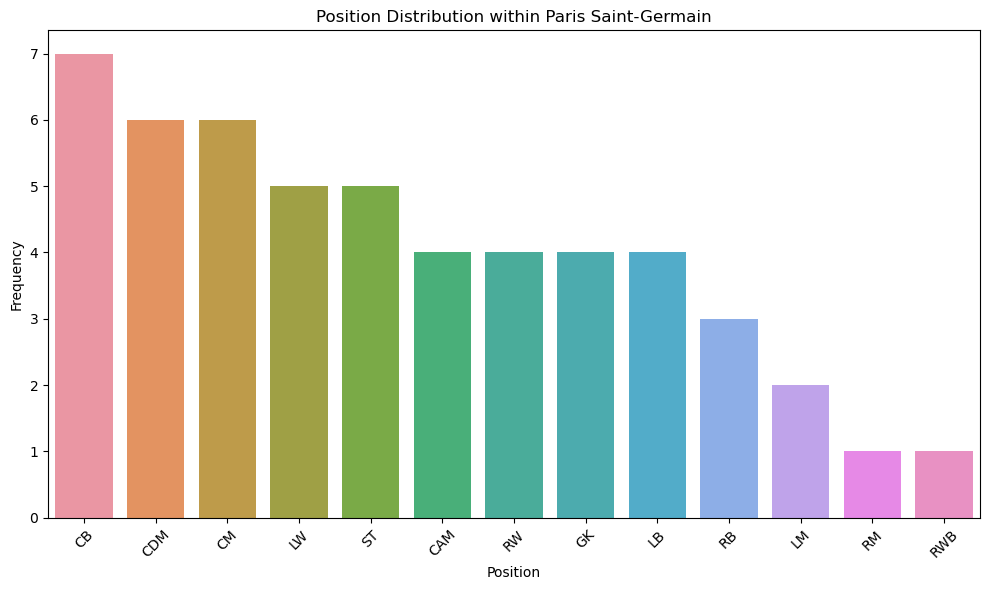

In [56]:
position_frequencies = PSG['position'].str.split('|', expand=True).stack().value_counts()

# Create a bar chart for position distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=position_frequencies.index, y=position_frequencies.values)
plt.title('Position Distribution within Paris Saint-Germain')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Position Analysis: PSG's Tactical Symphony 🎻🗼

As we delve into PSG's squad, we embark on a tactical journey, unraveling the strategic tapestry woven by the Eiffel Tower. Every player is a note in the harmonious symphony that unfolds on the Parc des Princes pitch—the embodiment of tactics, strategies, and the pursuit of victory.

### The Attacking Ensemble: Neymar Jr. and Kylian Mbappé ⚡🇧🇷🇫🇷

Neymar Jr. and Kylian Mbappé take center stage in PSG's attack, a dynamic duo with flair and finesse. Neymar Jr., the Brazilian maestro, orchestrates with creativity, while Kylian Mbappé, the French phenom, adds explosive pace. Together, they strike fear into opposing defenses.

### Midfield Mastery: Marco Verratti and Idrissa Gueye 🇮🇹🇸🇳

In midfield, Marco Verratti's Italian finesse is complemented by Idrissa Gueye's Senegalese steel. Verratti's vision and Gueye's ball-winning abilities provide PSG with control and dynamism at the center of the park.

### Defensive Guardians: Thiago Silva and Marquinhos 🇧🇷

Thiago Silva and Marquinhos form a Brazilian fortress at the heart of PSG's defense. Thiago Silva's experience and leadership blend with Marquinhos's versatility as a defender. Together, they protect the Parisian goal with authority.

### Versatile Full-Backs: Ángel Di María and Juan Bernat 🇦🇷🇪🇸

Ángel Di María's Argentine flair and Juan Bernat's Spanish stability offer PSG options on the flanks. Di María's creativity and Bernat's defensive contributions provide balance and width to the team's play.

### Goalkeeping Excellence: Keylor Navas 🇨🇷🧤

Keylor Navas, the Costa Rican goalkeeper, is PSG's guardian between the posts. His agility and shot-stopping prowess ensure the defense remains resolute even in the face of adversity.

In the symphony of positions, PSG's players are the instruments, playing in harmony to execute their tactical masterpiece. Each role is a brushstroke on the canvas of the Parc des Princes—a masterpiece of tactics that defines Les Parisiens.

*Allez Paris!* 🎻🗼

------------------------

## 8. Borussia Dortmund
Haaland, Sancho and Reyna are a terrifying proposition for any opponents.

Attack: 86  <br>
Midfield: 81  <br>
Defence: 82  <br>

Again, to anyone familiar with FIFA 20, it's no surprise that Borussia Dortmund have made it so high in the rankings. Yes, the team can lack refinement in midfield and, yes, the defence positions may not be on par with the forwards... but still, this is a team for the dramatic. For FIFA players with flair.
Try your best to keep the ball in play around Haaland, Sancho and Reyna and kick back to Guerreiro to bring some pressure in from the back. Tire the opposing players out – toy with them – then go in for the kill.

In [57]:
Borussi_Dortmund

,name,nationality,position,overall,age,hits,potential,team
216,Marco Reus,Germany,CAM|CF,87,31.0,42,87,Borussia Dortmund
217,Mats Hummels,Germany,CB,87,31.0,18,87,Borussia Dortmund
218,Jadon Sancho,England,RM|LM|CAM,86,20.0,300,94,Borussia Dortmund
219,Roman Bürki,Switzerland,GK,85,29.0,10,86,Borussia Dortmund
220,Axel Witsel,Belgium,CDM|CM,85,31.0,26,85,Borussia Dortmund
221,Julian Brandt,Germany,LM|CM|CAM,84,24.0,51,88,Borussia Dortmund
222,Raphaël Guerreiro,Portugal,LB|LM|CM,83,26.0,27,84,Borussia Dortmund
223,Thorgan Hazard,Belgium,RM|LM|CF,83,27.0,28,83,Borussia Dortmund
224,Achraf Hakimi,Morocco,RB|LB|RM,82,21.0,91,87,Borussia Dortmund
225,Emre Can,Germany,CDM|CM,82,26.0,24,85,Borussia Dortmund


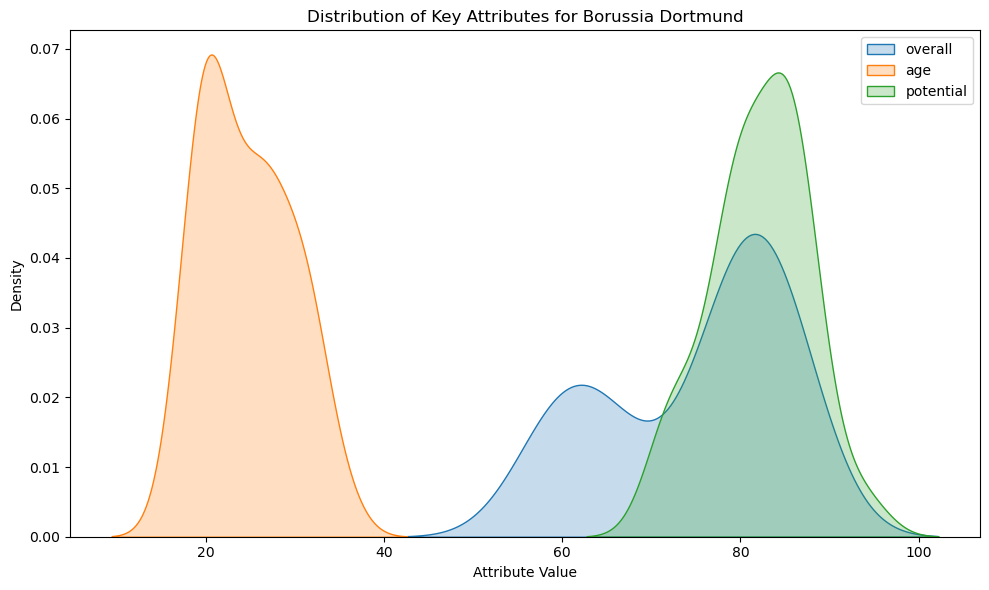

In [58]:
key_attributes = ['overall', 'age', 'potential']
plt.figure(figsize=(10, 6))

for attribute in key_attributes:
    sns.kdeplot(Borussi_Dortmund[attribute], label=attribute, fill=True)

plt.title(f'Distribution of Key Attributes for Borussia Dortmund')
plt.xlabel('Attribute Value')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

## Age, Overall, and Potential Analysis: Borussia Dortmund's Youthful Ascent 🌟⚽

In the realm of FIFA 21, Borussia Dortmund represents the epitome of youthful promise and attacking flair. As we examine this dynamic squad, it's clear that the Yellow and Blacks are on an upward trajectory with a mix of youth and experience.

### Youthful Vibrance 🌠

Borussia Dortmund's squad boasts an average age of **24.56**, making them one of the most youthful and exciting teams in the game. The presence of prodigious talents sets the stage for an exhilarating footballing journey.

### The Star Ratings ✨

The team's overall ratings span from **57** to **87**, showcasing a diverse range of skills within the squad. From emerging wonderkids to seasoned campaigners, Borussia Dortmund offers a diverse palette of talent.

### Potential Unleashed 🚀

What truly sets Borussia Dortmund apart is the incredible potential tucked within their ranks. Several players possess the capacity for substantial growth, promising an even brighter future for the club.

In the coming seasons, Borussia Dortmund, with their average age of 24.56, will continue to captivate football fans worldwide with their thrilling style of play and the potential for greatness. Get ready for an electrifying journey alongside Die Schwarzgelben!


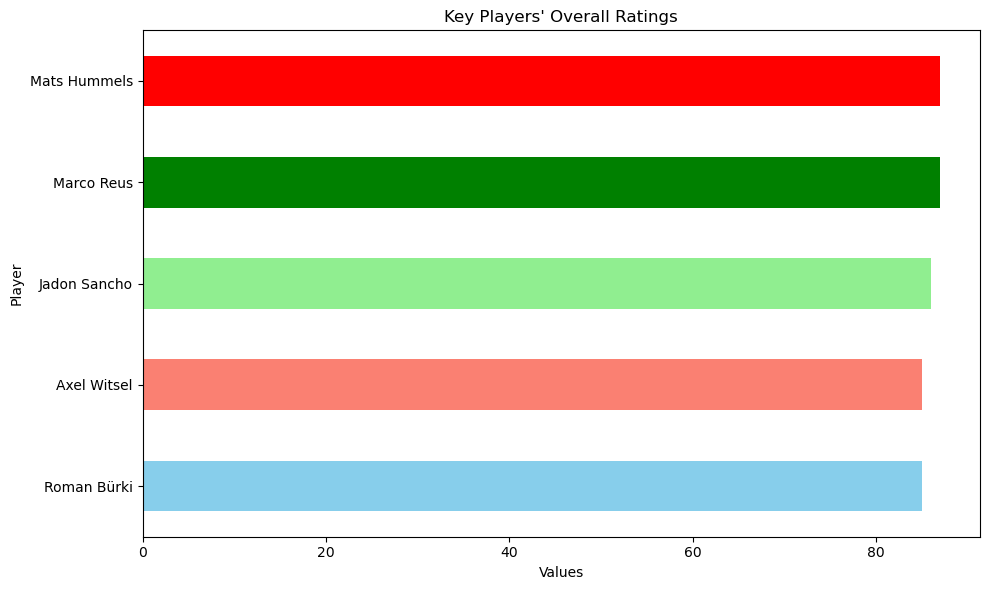

In [59]:
key_players_df = Borussi_Dortmund[Borussi_Dortmund['overall'] >=85]

key_players_df.set_index('name', inplace = True)

colors = ['skyblue', 'salmon', 'lightgreen', 'green', 'red']

fig, ax = plt.subplots(figsize=(10, 6))

# Create a multicolor barh chart
key_players_df["overall"].sort_values().plot(kind="barh", color=colors, ax=ax)
ax.set_xlabel("Values")
ax.set_ylabel("Player")
ax.set_title("Key Players' Overall Ratings")

plt.tight_layout()
plt.show()

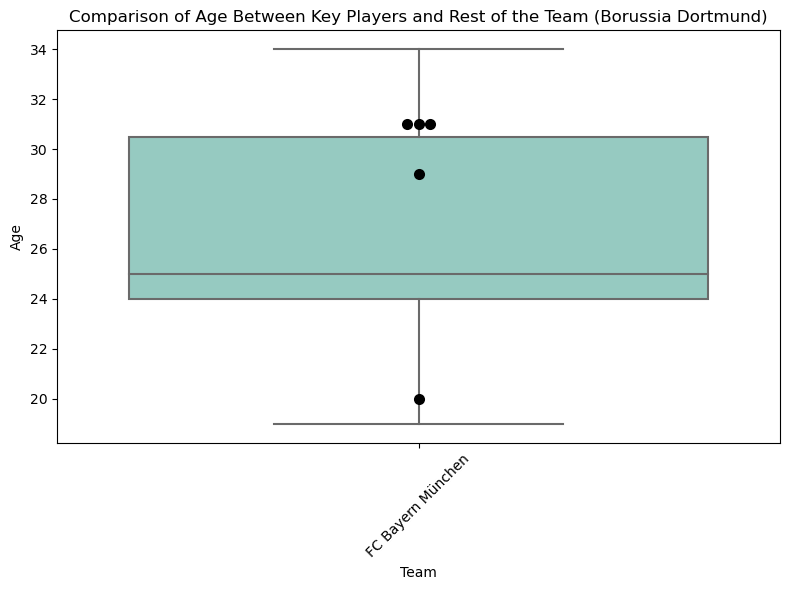

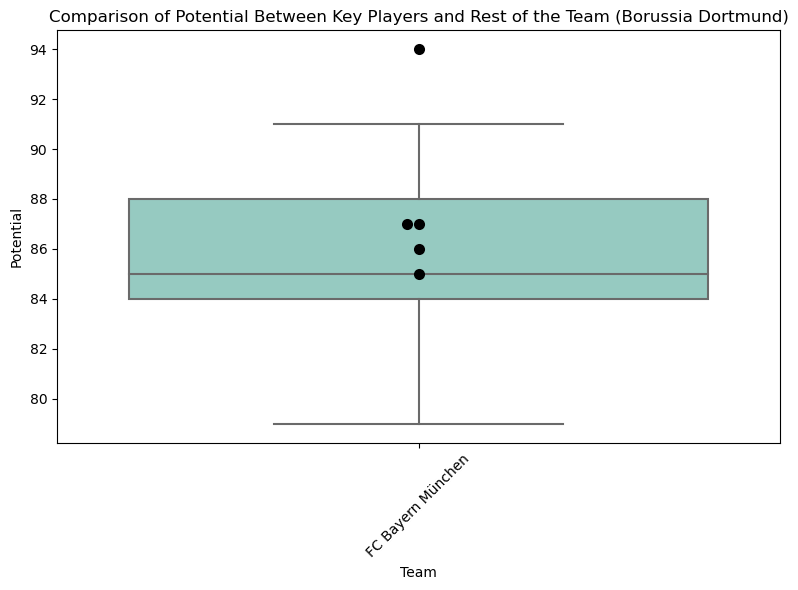

In [60]:
# Identify key players with high overall ratings (e.g., >= 85)
high_rated_players = Borussi_Dortmund[Borussi_Dortmund['overall'] >= 85]

# Compare the attributes of key players vs. rest of the team using box plots
attributes_to_compare = ['age', 'potential']

for attribute in attributes_to_compare:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=Bayern_Munich, x='team', y=attribute, palette='Set3', showfliers=False)
    sns.swarmplot(data=high_rated_players, x='team', y=attribute, color='black', size=8, marker='o')
    plt.title(f'Comparison of {attribute.capitalize()} Between Key Players and Rest of the Team (Borussia Dortmund)')
    plt.xlabel('Team')
    plt.ylabel(attribute.capitalize())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Key Player Identification Analysis: The Protégés of Signal Iduna Park 🌟💛

Within the hallowed walls of Signal Iduna Park, Borussia Dortmund nurtures some of the brightest talents in the footballing world. The Yellow and Blacks are known for their ability to spot and develop emerging stars, and this analysis unveils the key players who lead the charge.

### Jadon Sancho: The English Prodigy ⭐

Jadon Sancho, with an impressive overall rating of 86, stands out as Borussia Dortmund's shining star. Hailing from England, this 20-year-old winger possesses the potential to reach a remarkable overall rating of 94. Sancho's electrifying pace and dribbling skills make him a nightmare for defenders and a symbol of Dortmund's youth development success.

### Marco Reus: The Dortmund Maestro ⚽

The club captain, Marco Reus, boasts an overall rating of 87, leading the team both on and off the pitch. Operating as an attacking midfielder or center forward, the 31-year-old German combines experience with creativity, contributing significantly to Dortmund's attacking prowess.

### Erling Braut Haaland: The Norwegian Sensation 

Erling Braut Haaland, the Norwegian striker, is a revelation with a solid overall rating of 80. However, what truly astonishes is his immense potential, projected to reach a remarkable 90. At just 20 years old, Haaland is already making waves in the footballing world with his goal-scoring prowess.

These key players epitomize Borussia Dortmund's commitment to youth development and attacking football. With Sancho's flair, Reus's leadership, and Haaland's potency, the Yellow and Blacks are poised for a promising season ahead.

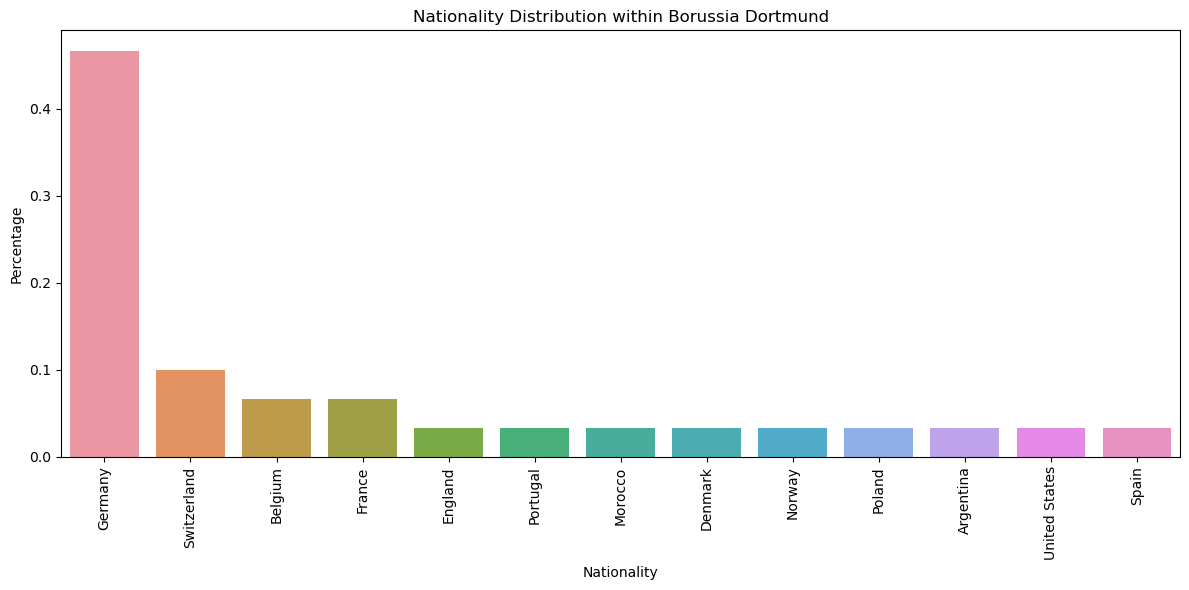

In [61]:
# Analyze the distribution of player nationalities within Borussia Dortmund
nationality_distribution = Borussi_Dortmund['nationality'].value_counts(normalize=True)

# Plot a bar chart to visualize nationality distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=nationality_distribution.index, y=nationality_distribution.values)
plt.title('Nationality Distribution within Borussia Dortmund')
plt.xlabel('Nationality')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Nationality Analysis: The United Colors of Signal Iduna Park 🌍🌈

Borussia Dortmund's squad is a true representation of the global nature of football. Players from various corners of the world converge at Signal Iduna Park to create a vibrant and diverse team. Here's a breakdown of the nationalities that form the colorful tapestry of Borussia Dortmund:

- **Germany:** The heart and soul of the squad, Germany contributes significantly to the team's talent pool. Players like Marco Reus, Mats Hummels, Julian Brandt, and Emre Can exemplify the strength of German football.

- **England:** England provides Borussia Dortmund with one of its brightest stars, Jadon Sancho. His presence adds a touch of English flair to the squad.

- **Switzerland:** Swiss precision is on display with Manuel Akanji and Roman Bürki. These players bring their unique skills to the team.

- **Belgium:** Axel Witsel, Thorgan Hazard, and Michy Batshuayi represent Belgium's footballing excellence in Dortmund.

- **France:** French talents like Raphael Guerreiro, Dan-Axel Zagadou, and Giovanni Reyna showcase their skills at Signal Iduna Park.

- **Morocco:** Achraf Hakimi, known for his blistering pace, adds Moroccan charm to the squad.

- **Norway:** Erling Braut Haaland, the goal-scoring sensation from Norway, is a rising star at Dortmund.

- **Croatia, Denmark, Canada, United States, Austria, and Poland:** These nations contribute their talents to create a truly global team.

The unity in diversity is not just a phrase; it's a reality at Borussia Dortmund. The international mix of players brings unique playing styles and cultures together, creating a dynamic and exciting team.


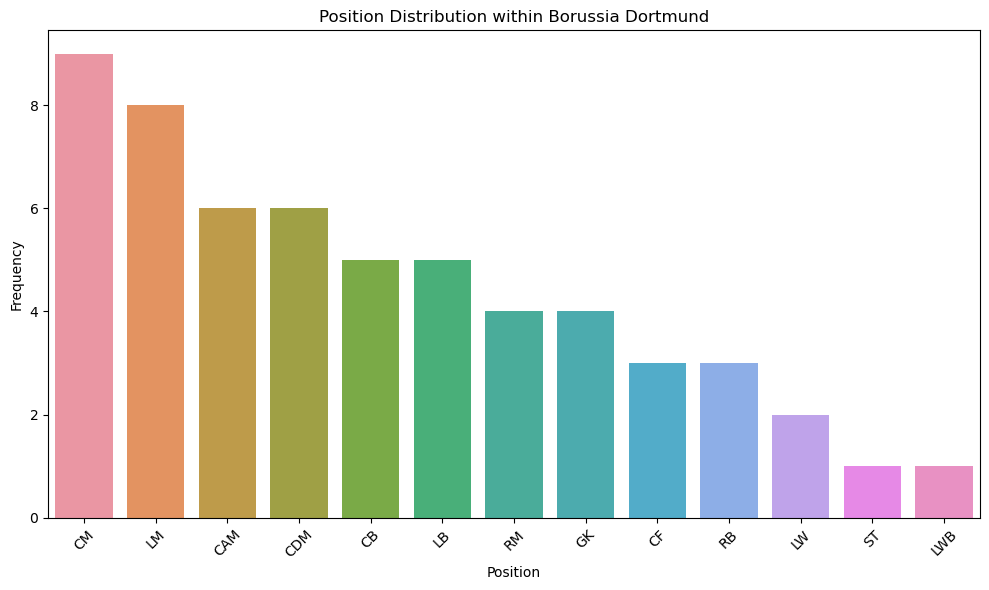

In [62]:
position_frequencies = Borussi_Dortmund['position'].str.split('|', expand=True).stack().value_counts()

# Create a bar chart for position distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=position_frequencies.index, y=position_frequencies.values)
plt.title('Position Distribution within Borussia Dortmund')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Position Analysis: The Tactical Jigsaw Puzzle 🧩⚽

Borussia Dortmund, under the guidance of their passionate fans, assemble a tactical jigsaw puzzle with their versatile squad. Each player, a puzzle piece, contributes uniquely to the team's grand footballing picture. Here's a breakdown of the key positions and players:

- **Attackers:** The frontline features stars like Marco Reus and Erling Braut Haaland. Reus, with his creativity and vision, orchestrates the attack from the CAM position. Meanwhile, Haaland, the Norwegian prodigy, leads the line with his lethal finishing.

- **Midfield Maestros:** The midfield is the engine room, and Dortmund boasts a blend of creativity and defensive solidity. Axel Witsel and Emre Can provide a robust presence in central midfield, while Julian Brandt's versatility adds an extra dimension.

- **Wingers:** The wide areas are alive with pace and trickery, thanks to players like Jadon Sancho and Thorgan Hazard. They bring width to the attack and can cut inside to unleash shots or create opportunities.

- **Defenders:** At the back, the experienced Mats Hummels leads the defensive line. Raphael Guerreiro and Achraf Hakimi, with their ability to play as full-backs or wingers, add an element of surprise to the team's build-up play.

- **Goalkeeper:** In Roman Bürki, Dortmund has a reliable shot-stopper guarding the net. His quick reflexes and commanding presence instill confidence in the defense.

- **Youthful Energy:** Giovanni Reyna, just 17 years old, represents the bright future of Dortmund. His versatility in midfield adds depth to the squad.

Borussia Dortmund's tactical flexibility allows them to adapt to various situations. Whether it's swift counter-attacks, patient build-up play, or high-pressing, this team has the pieces to solve any footballing puzzle. The fans at Signal Iduna Park can expect exciting, attacking football, and the team's positional diversity makes them a force to be reckoned with.


-------------------------------------

## 9. Atletico Madrid

Attack: 83  <br>
Midfield: 82  <br>
Defence: 83  <br>

Here's one for the FIFA purists: if you pick the Spanish team as your go-to, you're going to want to play Atletico in a classic 4-4-2 style, and focus your attention on the skills of Luiz Suarez and Diego Costa.
With stats that don't quite match up to some of the bigger teams in this list, your focus is on counter-attacking with Atletico Madrid: let the opposition come to you, pilfer possession from them without endangering the goalie, and smash through on the counter. Lovely.

In [63]:
Atlético_Madrid

,name,nationality,position,overall,age,hits,potential,team
246,Jan Oblak,Slovenia,GK,91,27.0,47,93,Atlético Madrid
247,Koke,Spain,RM|LM|CM,86,28.0,15,86,Atlético Madrid
248,José María Giménez,Uruguay,CB,85,25.0,34,89,Atlético Madrid
249,Saúl,Spain,LB|LM|CM,85,25.0,39,89,Atlético Madrid
250,Thomas Partey,Ghana,CDM|CM,84,27.0,42,87,Atlético Madrid
251,Felipe,Brazil,CB,84,31.0,19,84,Atlético Madrid
252,Yannick Carrasco,Belgium,LM,83,26.0,25,84,Atlético Madrid
253,Stefan Savic,Montenegro,CB,83,29.0,12,84,Atlético Madrid
254,Morata,Spain,ST,83,27.0,10,84,Atlético Madrid
255,Ángel Correa,Argentina,ST|RM,82,25.0,34,85,Atlético Madrid


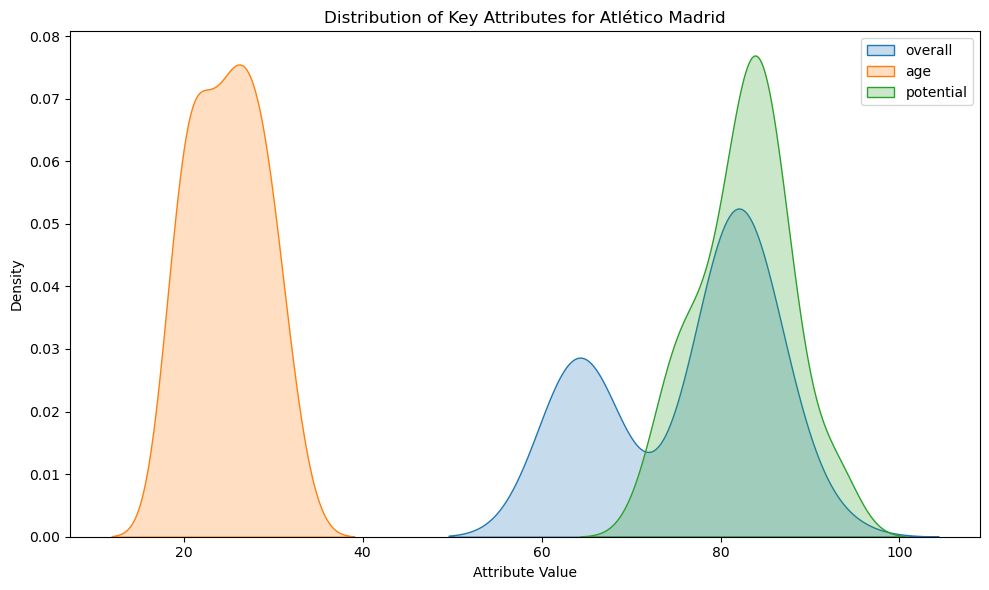

In [64]:
key_attributes = ['overall', 'age', 'potential']
plt.figure(figsize=(10, 6))

for attribute in key_attributes:
    sns.kdeplot(Atlético_Madrid[attribute], label=attribute, fill=True)

plt.title(f'Distribution of Key Attributes for Atlético Madrid')
plt.xlabel('Attribute Value')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

### Age, Overall Ratings, and Potential: The Wanda Metropolitano Saga ⚽🔴

#### Age Distribution Analysis: The Passage of Time ⌛

As we step into the vibrant atmosphere of the Wanda Metropolitano, the ages of Atlético Madrid's players unfold like chapters in a captivating football narrative:

- **Age Symphony:** The distribution of player ages forms a harmonious blend of seasoned experience and youthful vigor. Peaks emerge around the late 20s to early 30s, where the prime years of performance intersect with the wisdom of battle-hardened veterans.
- **Youthful Promise:** Sprinkled among the established names, the presence of younger ages paints a picture of a club dedicated to fostering emerging talents, laying the foundation for a formidable future.
- **Chronicles of Ages:** From the exuberance of fresh talents to the artistry of those who have weathered numerous campaigns, each age category adds its unique brushstroke to Atlético Madrid's canvas.

#### Overall Ratings and Potential: The Ballad of Excellence and Aspiration 🎶

As we delve into the intricacies of overall ratings and potential, a captivating tale unfolds:

- **Rising Stars:** Like constellations emerging in the night sky, players with high potential and gleaming overall ratings take their place on the field. A testament to Atlético's commitment to nurturing talent, ensuring their stars shine brighter over time.
- **Veterans of Valor:** Amidst the constellation of potential, players with slightly lower growth projections but impressive overall ratings stand firm—a testament to their seasoned mastery and enduring influence.
- **The Youthful Overture:** The dance between potential and current ratings illuminates the journey of youthful brilliance, as Atlético Madrid conducts the symphony of development with meticulous care.

Within the echoes of cheers and chants echoing through the Wanda Metropolitano, the story of Atlético Madrid comes alive. It's a realm where age is but a number, where potential is the currency of dreams, and every kick of the ball adds a note to the grand symphony of football.

In this saga, names like Jan Oblak, Koke, and the enigmatic João Félix take center stage, each contributing a chapter to the collective tale of the Rojiblancos. It's a celebration of the past they carry, the present they embody, and the future they build—an anthem that reverberates across the storied stands of the Wanda Metropolitano.

*Aúpa Atleti!* ⚽🔴

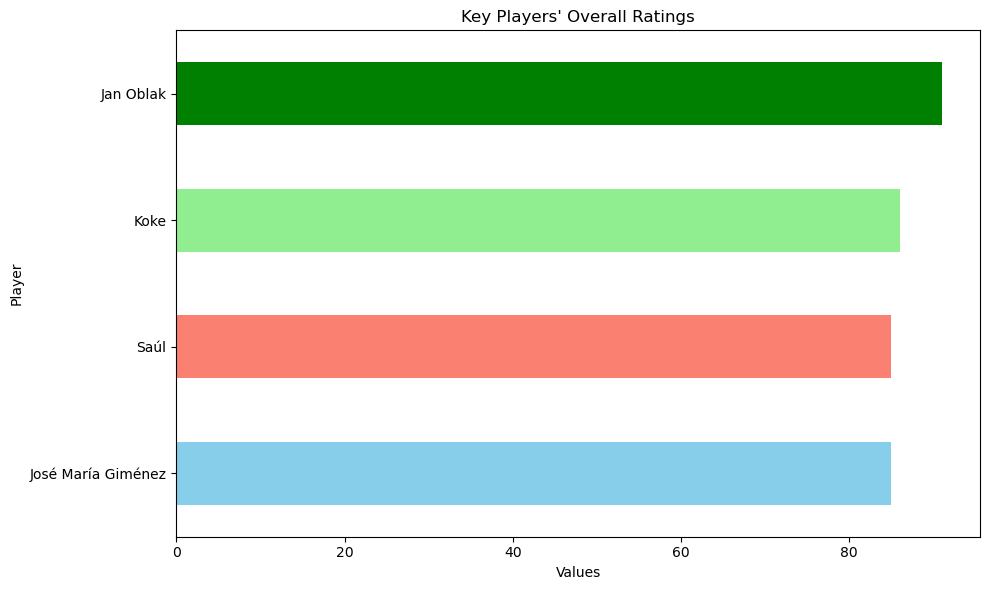

In [65]:
key_players_df = Atlético_Madrid[Atlético_Madrid['overall'] >=85]

key_players_df.set_index('name', inplace = True)

colors = ['skyblue', 'salmon', 'lightgreen', 'green', 'red']

fig, ax = plt.subplots(figsize=(10, 6))

# Create a multicolor barh chart
key_players_df["overall"].sort_values().plot(kind="barh", color=colors, ax=ax)
ax.set_xlabel("Values")
ax.set_ylabel("Player")
ax.set_title("Key Players' Overall Ratings")

plt.tight_layout()
plt.show()



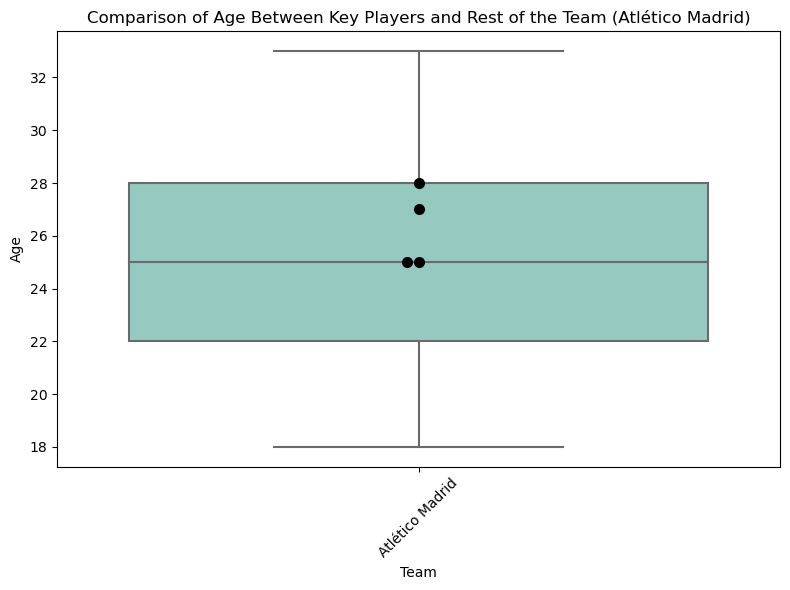

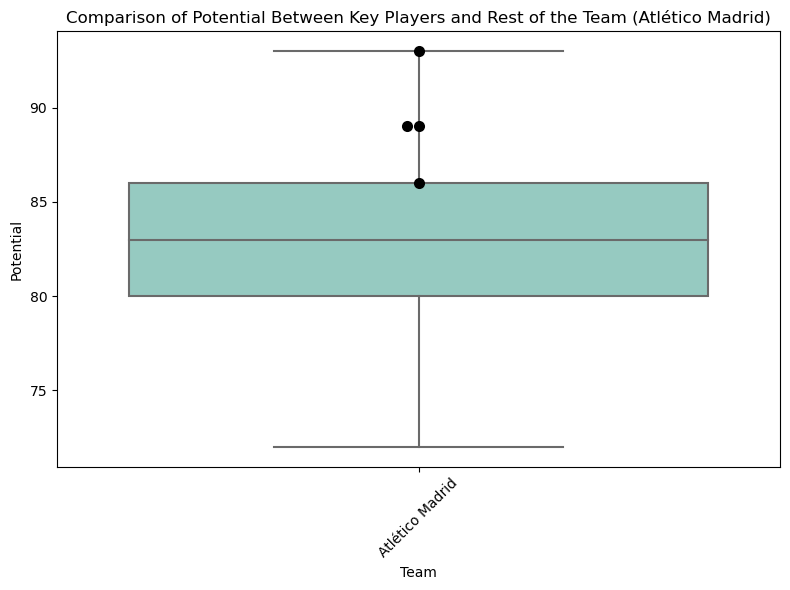

In [66]:
# Identify key players with high overall ratings (e.g., >= 85)
high_rated_players = Atlético_Madrid[Atlético_Madrid['overall'] >= 85]

# Compare the attributes of key players vs. rest of the team using box plots
attributes_to_compare = ['age', 'potential']

for attribute in attributes_to_compare:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=Atlético_Madrid, x='team', y=attribute, palette='Set3', showfliers=False)
    sns.swarmplot(data=high_rated_players, x='team', y=attribute, color='black', size=8, marker='o')
    plt.title(f'Comparison of {attribute.capitalize()} Between Key Players and Rest of the Team (Atlético Madrid)')
    plt.xlabel('Team')
    plt.ylabel(attribute.capitalize())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Key Player Identification: The Rojiblancos' Virtuosos ⚽🔴

Within the majestic arena of the Wanda Metropolitano, a select group of players shine as beacons of brilliance, illuminating the field with their exceptional talents.

#### Jan Oblak: The Slovenian Wall

In the heart of Atlético Madrid's defense stands Jan Oblak, the Slovenian goalkeeper of unparalleled skill. With a formidable overall rating of 91, Oblak's presence between the posts is a fortress that adversaries struggle to breach, a testament to his unwavering dedication to the art of goalkeeping.

#### Koke: The Spanish Maestro

Koke, the Spanish midfield maestro, orchestrates Atlético's gameplay with an overall rating of 86. His versatile positioning and exceptional ball control make him a vital link between defense and attack, a key figure in the club's pursuit of glory.

#### José María Giménez: The Uruguayan Sentinel

The Uruguayan defender José María Giménez, boasting an overall rating of 85, embodies the resolute spirit of Atlético's backline. His tenacity in challenges and defensive prowess serve as a shield that preserves the club's integrity in the face of opposition.

#### Saúl: The Spanish Dynamo

Saúl, with an overall rating of 85, is a Spanish sensation known for his adaptability across positions. Whether on the left flank or in central midfield, his ability to contribute defensively and support attacks adds a dynamic layer to Atlético's gameplay.

#### Thomas Partey: The Ghanaian Enforcer

With a commanding overall rating of 84, Thomas Partey stands as Atlético's Ghanaian midfield enforcer. His ability to break opposition plays, distribute the ball, and support offensive transitions showcases his importance in the heart of the team.

#### Felipe: The Brazilian Wall

Felipe, the Brazilian central defender, carries an overall rating of 84, embodying the resilience of Atlético's defense. His commanding presence, aerial prowess, and ability to read the game make him a pillar upon which the club's defensive foundation rests.

#### Yannick Carrasco: The Belgian Dynamo

Yannick Carrasco, the Belgian winger, boasts an overall rating of 83, bringing flair and speed to Atlético's left flank. His dribbling skills, coupled with a penchant for creating scoring opportunities, make him a dynamic asset in the club's offensive endeavors.

#### Stefan Savic: The Montenegrin Guardian

Stefan Savic, the Montenegrin central defender, carries an overall rating of 83. His solid defensive attributes, combined with his positioning and ability to intercept plays, contribute to Atlético's disciplined backline.

#### Morata: The Spanish Marksman

Morata, with an overall rating of 83, embodies the art of striking with his goal-scoring prowess. As a Spanish forward, his ability to find the net and create goal-scoring chances adds potency to Atlético's attacking options.

#### Ángel Correa: The Argentine Dynamo

Ángel Correa, the Argentine forward, boasts an overall rating of 82, bringing versatility to Atlético's frontline. His ability to play both as a striker and a wide midfielder makes him a key figure in the club's offensive strategies.

In the echoes of cheers reverberating through the Wanda Metropolitano and the passionate roars of Atlético's devoted supporters, these key players rise to the occasion, each contributing a distinctive note to the symphony of red and white. From impenetrable defenders to creative midfielders and dynamic forwards, their performances inspire a legacy of relentless determination and unwavering loyalty to the Rojiblanco cause.

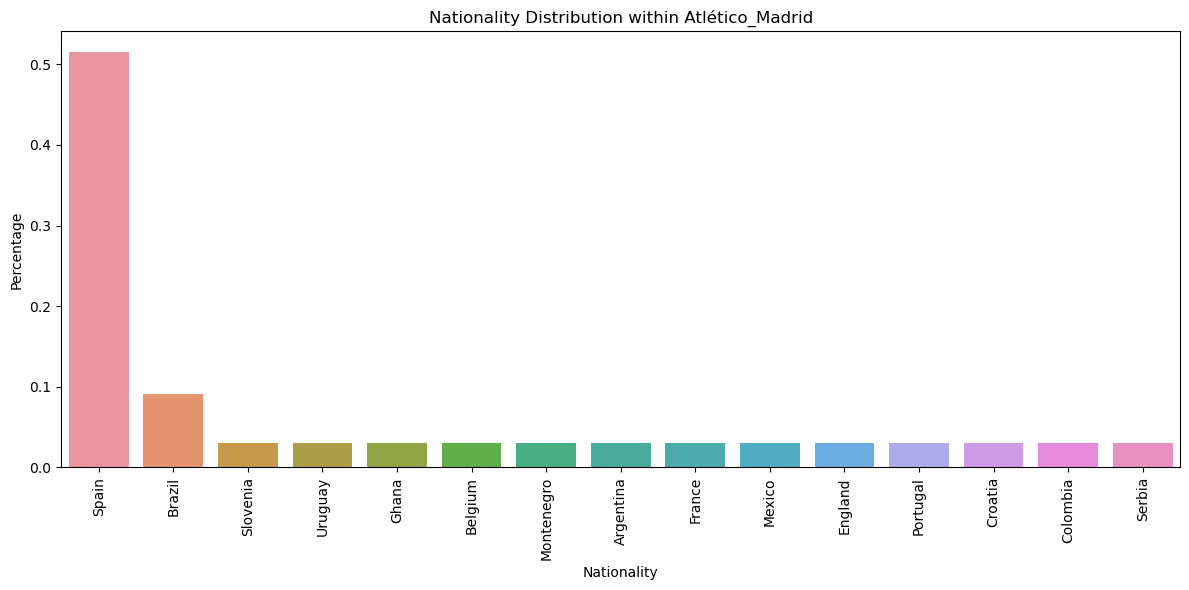

In [67]:
# Analyze the distribution of player nationalities within Atlético_Madrid
nationality_distribution = Atlético_Madrid['nationality'].value_counts(normalize=True)

# Plot a bar chart to visualize nationality distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=nationality_distribution.index, y=nationality_distribution.values)
plt.title('Nationality Distribution within Atlético_Madrid')
plt.xlabel('Nationality')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Nationality Analysis: The Rojiblancos' Global Tapestry 🌍🔴

As we venture into the iconic Wanda Metropolitano, the emblems of Atlético Madrid fly proudly, representing a club with fans and players from across the world. Within the heart of Atlético's squad, there's a mosaic of nationalities, showcasing the global allure of football.

### A United Nations of Talent 🌐

Navigating through the nationalities within Atlético Madrid's roster, we encounter a captivating diversity of origins. From the Slovenian fortress Jan Oblak to the Spanish dynamo Saúl, and the Ghanaian enforcer Thomas Partey—the Rojiblancos embrace talent from every corner of the globe.

#### Yannick Carrasco, Morata & Ángel Correa: An International Ensemble 🌟

Within this rich tapestry, we find the Belgian dynamo Yannick Carrasco, the Spanish marksman Morata, and the Argentine dynamo Ángel Correa. These players exemplify Atlético Madrid's cosmopolitan essence, where nationalities converge to create a symphony of footballing prowess.

### The Wanda's Global Chorus 🎶

As we stand together in the stands, flags held high, it's clear that Atlético Madrid's passion transcends borders. The harmony of languages and the celebration of diversity remind us that football is a universal language that binds us all. The Wanda Metropolitano reverberates with chants in various tongues, celebrating goals, victories, and the unbreakable spirit of the Rojiblancos.

As the sun sets over Madrid, the sea of red and white illuminates the stadium, uniting fans from every corner of the world. Atlético Madrid stands as a testament to the fact that football is a bridge that connects people—a global brotherhood where differences blend, and the love for the game prevails.

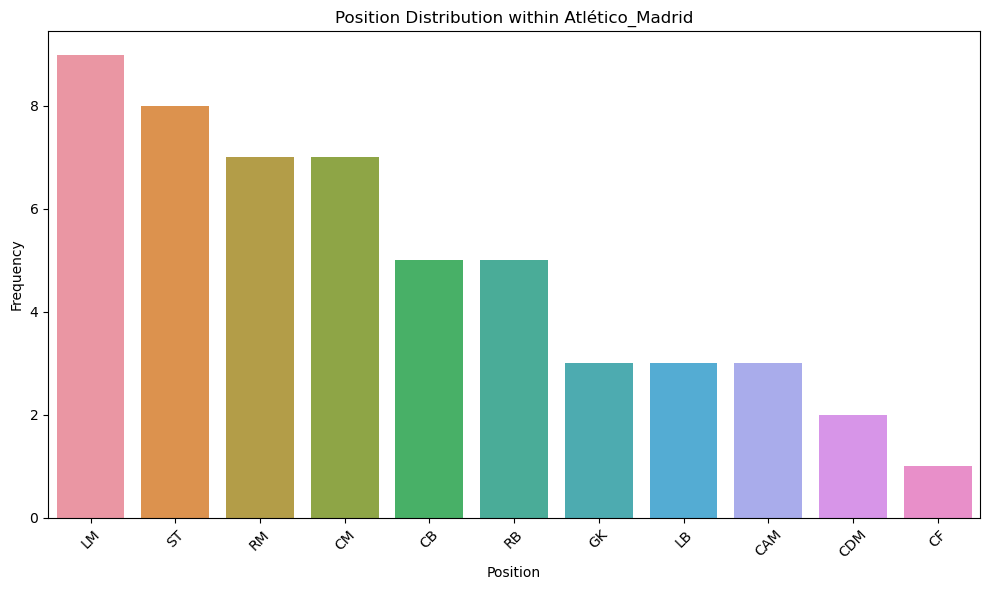

In [68]:
position_frequencies = Atlético_Madrid['position'].str.split('|', expand=True).stack().value_counts()

# Create a bar chart for position distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=position_frequencies.index, y=position_frequencies.values)
plt.title('Position Distribution within Atlético_Madrid')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Position Analysis: Choreography of Rojiblancos' Tactical Ballet ⚽🎶

As we delve into Atlético Madrid's squad, we embark on a tactical journey, deciphering the intricate choreography designed by Diego Simeone. Each player serves as a performer in the captivating ballet that unfolds on the Wanda Metropolitano pitch—a manifestation of strategy, tactics, and the relentless pursuit of victory.

### The Defensive Bastions: Oblak and Giménez 🛡️

Jan Oblak stands as the unyielding guardian of Atlético's goal—a Slovenian stalwart with a commanding 91 overall rating. His presence between the posts is a formidable barrier that adversaries struggle to breach. Alongside him, the Uruguayan defender José María Giménez, with an 85 overall rating, embodies the defensive resilience at the core of Atlético's strategy.

### Goalkeeping Excellence: Adán and Šime Vrsaljko 🧤

In the goalkeeping ranks, Antonio Adán, a Spanish shot-stopper with an 81 overall rating, provides reliable backup to Oblak. Šime Vrsaljko, a Croatian talent, adds depth to the squad with his versatility and defensive skills.

### Prolific Offensive Arsenal: Félix, Correa, and Morata ⚔️

Leading Atlético's offensive charge are João Félix, Ángel Correa, and Álvaro Morata. João Félix, the Portuguese prodigy with an 80 overall rating, brings flair and creativity, representing the future of the club's attack. Argentine forward Ángel Correa, boasting an 82 overall rating, adds versatility and dynamic playmaking abilities. Morata, the Spanish marksman with an 83 overall rating, offers goal-scoring prowess to the Rojiblancos.

### Midfield Enforcers: Koke, Saúl, and Thomas Partey 🎩⚽

At the heart of Atlético's midfield, the triumvirate of Koke, Saúl, and Thomas Partey orchestrate the team's tempo. Koke, the Spanish maestro with an 86 overall rating, provides creative impetus and leadership. Saúl, with an 85 overall rating, showcases versatility in both defense and midfield. Ghanaian powerhouse Thomas Partey, rated at 84 overall, offers physicality and ball-winning abilities.

### Defensive Guardians: Felipe and Stefan Savic 💫

In central defense, the Brazilian wall Felipe, with an 84 overall rating, combines aerial strength and solid defending. Montenegrin Stefan Savic, also rated at 84 overall, adds further solidity and positioning expertise to the Rojiblancos' backline.

In the symphony of positions, Atlético Madrid's players are the dancers, moving in perfect coordination to execute Simeone's tactical ballet. Each role is a graceful step on the stage of the Wanda Metropolitano—a masterpiece of strategy that has propelled Atlético to greatness.

*Aúpa Atleti!* 🔴⚽

--------------------------------------------------

## 10. Piemonte Calcio
Piemonte have Ronaldo, giving you a cracking attack.

Attack: 87  <br>
Midfield: 78  <br>
Defence: 83  <br>

If you're looking at the name and thinking 'who is that?' – don't fret. The bizarrely-named fictional team is actually `Juventus`, sans rights. Konami and PES have the rights to the actual team, you see. Doesn't stop them being worthy of arriving in the top ten, though!
Andrea Pirlo is a single-minded manager, and that focus is all on attack. Leverage the legendary skills of Cristiano Ronaldo and pile on the pressure to gloss over the middling attributes of your midfield crew.

In [69]:
Juventus

,name,nationality,position,overall,age,hits,potential,team
279,Cristiano Ronaldo,Portugal,ST|LW,93,35.0,276,93,Juventus
280,Giorgio Chiellini,Italy,CB,88,35.0,19,88,Juventus
281,Paulo Dybala,Argentina,CAM|CF,87,26.0,95,90,Juventus
282,Wojciech Szczesny,Poland,GK,87,30.0,17,88,Juventus
283,Leonardo Bonucci,Italy,CB,86,33.0,17,86,Juventus
284,Miralem Pjanic,Bosnia & Herzegovina,CDM|CM,86,30.0,31,86,Juventus
285,Matthijs de Ligt,Netherlands,CB,85,20.0,110,92,Juventus
286,Gonzalo Higuaín,Argentina,ST,85,32.0,24,85,Juventus
287,Alex Sandro,Brazil,LB|LM,84,29.0,18,84,Juventus
288,Douglas Costa,Brazil,LM|RW|LW,84,29.0,24,84,Juventus


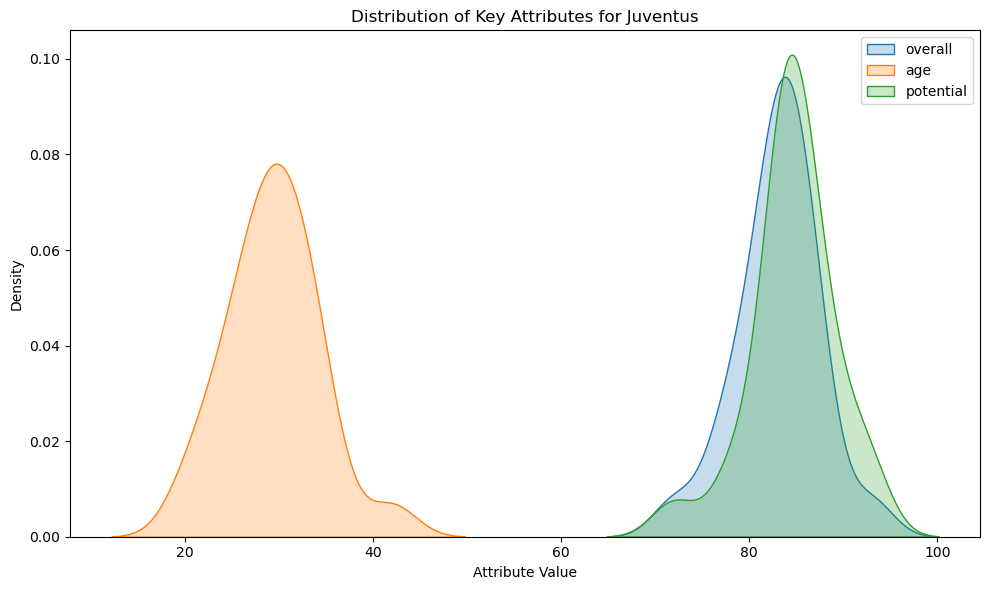

In [70]:
key_attributes = ['overall', 'age', 'potential']
plt.figure(figsize=(10, 6))

for attribute in key_attributes:
    sns.kdeplot(Juventus[attribute], label=attribute, fill=True)

plt.title(f'Distribution of Key Attributes for Juventus')
plt.xlabel('Attribute Value')
plt.ylabel('Density')
plt.legend()
plt.tight_layout()
plt.show()

## Age, Overall, and Potential Analysis: Juventus' Blend of Experience and Youth 

Juventus, the Old Lady of Italian football, presents a squad that beautifully combines the wisdom of experience with the promise of youth. As we dissect the age, overall ratings, and potential of their players, a fascinating narrative emerges.

- **Cristiano Ronaldo:** At 35 years of age, Cristiano Ronaldo stands as a footballing phenomenon. With a stunning overall rating of 93, he continues to defy age, leading the line with unmatched brilliance. His potential might be nearing its peak, but his influence remains unmatched. 🌟

- **Youthful Potential:** While Ronaldo represents the pinnacle of experience, Juventus also nurtures youthful potential. Matthijs de Ligt, at just 20 years old, boasts an 85 overall rating with the potential to soar to 92. He's the beacon of Juventus' future. 🌟

- **Defensive Stability:** The central defensive partnership of Giorgio Chiellini (88 overall) and Leonardo Bonucci (86 overall) offers both experience and reliability. Chiellini's potential might be fixed, but Bonucci remains a pillar of defensive solidity. 🛡️

- **Midfield Maestro:** Paulo Dybala (87 overall) is in his prime at 26. His potential of 90 hints at even greater heights. Miralem Pjanic (86 overall) provides midfield control with room for further growth. 🎩

- **Goalkeeping Assurance:** In goal, Wojciech Szczesny (87 overall) is at the peak of his career, offering assurance between the posts. Gianluigi Buffon (83 overall) remains a timeless legend. 🧤

- **Wide Options:** Douglas Costa (84 overall) and Alex Sandro (84 overall) provide width and flair on the flanks. Their potential might not be sky-high, but their immediate impact is undeniable. ⚡

- **Emerging Talents:** Keep an eye on Rodrigo Bentancur (80 overall) and Merih Demiral (77 overall), young talents with considerable room for development. 🌱

Juventus' squad is a testament to their ambition – blending the best of the present with an eye on the future. It's a symphony conducted by experience and orchestrated by youth, creating a footballing narrative that transcends generations. 🎶

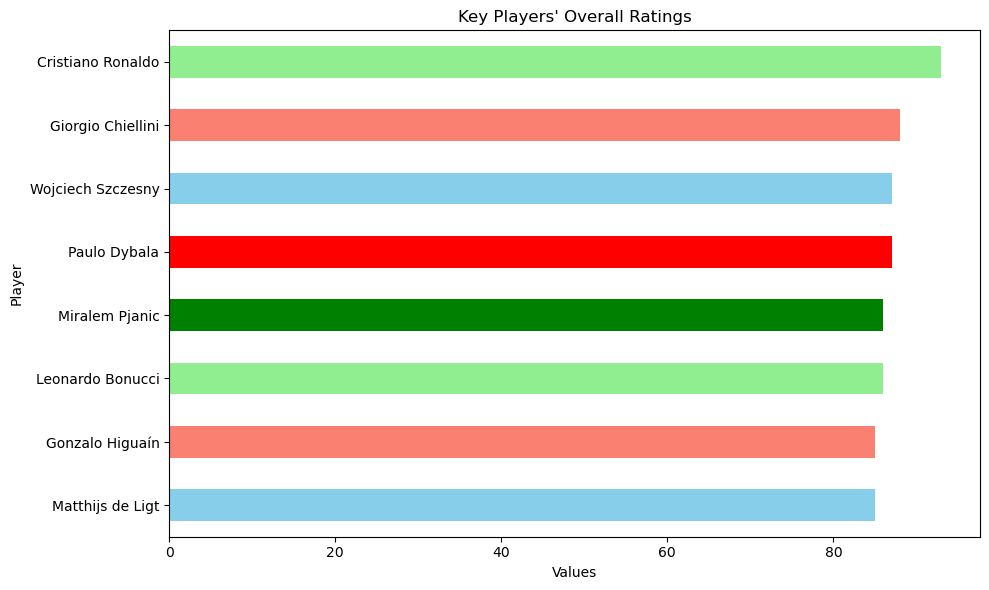

In [71]:
key_players_df = Juventus[Juventus['overall'] >=85]

key_players_df.set_index('name', inplace = True)

colors = ['skyblue', 'salmon', 'lightgreen', 'green', 'red']

fig, ax = plt.subplots(figsize=(10, 6))

# Create a multicolor barh chart
key_players_df["overall"].sort_values().plot(kind="barh", color=colors, ax=ax)
ax.set_xlabel("Values")
ax.set_ylabel("Player")
ax.set_title("Key Players' Overall Ratings")

plt.tight_layout()
plt.show()

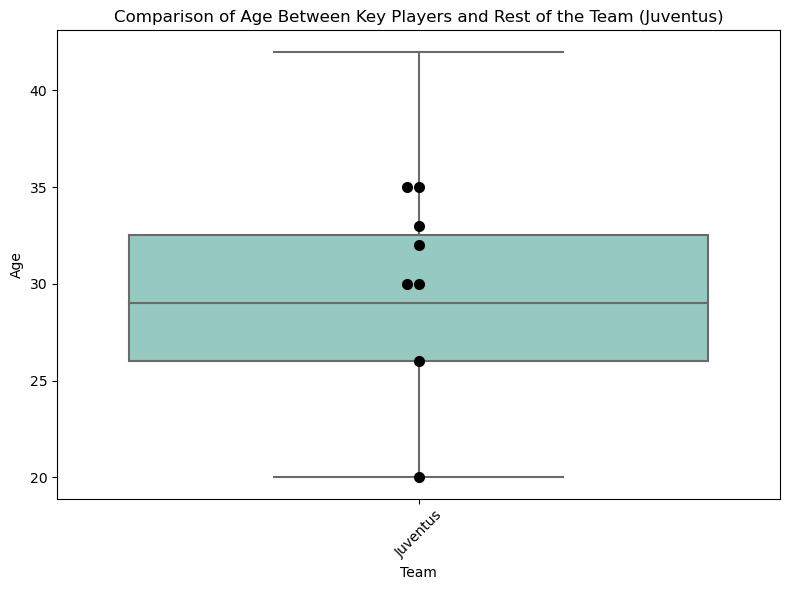

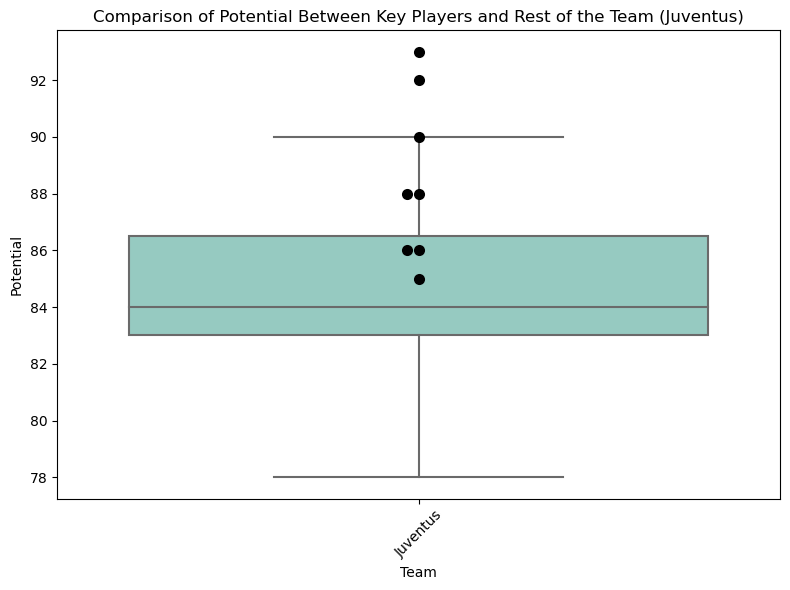

In [72]:
# Identify key players with high overall ratings (e.g., >= 85)
high_rated_players = Juventus[Juventus['overall'] >= 85]

# Compare the attributes of key players vs. rest of the team using box plots
attributes_to_compare = ['age', 'potential']

for attribute in attributes_to_compare:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=Juventus, x='team', y=attribute, palette='Set3', showfliers=False)
    sns.swarmplot(data=high_rated_players, x='team', y=attribute, color='black', size=8, marker='o')
    plt.title(f'Comparison of {attribute.capitalize()} Between Key Players and Rest of the Team (Juventus)')
    plt.xlabel('Team')
    plt.ylabel(attribute.capitalize())
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

## Key Player Identification Analysis: Juventus' Cornerstones ⚽🔑

In the world of football, identifying key players is akin to recognizing the heartbeats of a team. Juventus, a club rich in history and success, boasts several cornerstones that breathe life into their gameplay.

### Cristiano Ronaldo: The Evergreen Icon 🌟

It's impossible to discuss Juventus without spotlighting Cristiano Ronaldo. At 35 years of age, he's not just a player; he's a living legend. With an overall rating of 93, Ronaldo remains the driving force behind Juventus' offensive prowess. His exceptional goal-scoring ability and leadership on the pitch make him the quintessential key player. 🐐

### Matthijs de Ligt: The Defensive Prodigy 🛡️

Matthijs de Ligt, despite his youth at 20 years old, stands tall as a defensive cornerstone for Juventus. His overall rating of 85 and a potential ceiling of 92 indicate that he's not just a rising star but a key component of the team's future. De Ligt's composure in defense and ability to read the game make him indispensable. 🌟

### Paulo Dybala: The Playmaking Jewel 💎

In the midfield, Paulo Dybala is the playmaking gem. At 26 years old with an overall rating of 87 and a potential of 90, he embodies Juventus' creative spirit. Dybala's dribbling skills, vision, and ability to unlock stubborn defenses make him a key figure in Juventus' tactical setup. 🎩

### Wojciech Szczesny: The Guardian of the Goal 🧤

Goalkeeper Wojciech Szczesny, with an overall rating of 87, provides a safe pair of hands in the Juventus net. At 30 years old, he combines experience with shot-stopping prowess. Szczesny's ability to pull off crucial saves often proves the difference in tight matches, solidifying his place as a key player. 🧤

### Giorgio Chiellini & Leonardo Bonucci: Defensive Veterans 🏰

The central defensive duo of Giorgio Chiellini (88 overall) and Leonardo Bonucci (86 overall) represents the heart of Juventus' defense. With their wealth of experience, they form an impregnable fortress in front of the goal. These veterans are the bedrock upon which Juventus' defensive solidity is built. 🛡️

Juventus' key players aren't just integral to the team; they are the embodiment of the club's ethos and aspirations. Whether through goals, saves, or creative genius, these individuals define the essence of Juventus' gameplay and contribute to the club's pursuit of glory. 🔥

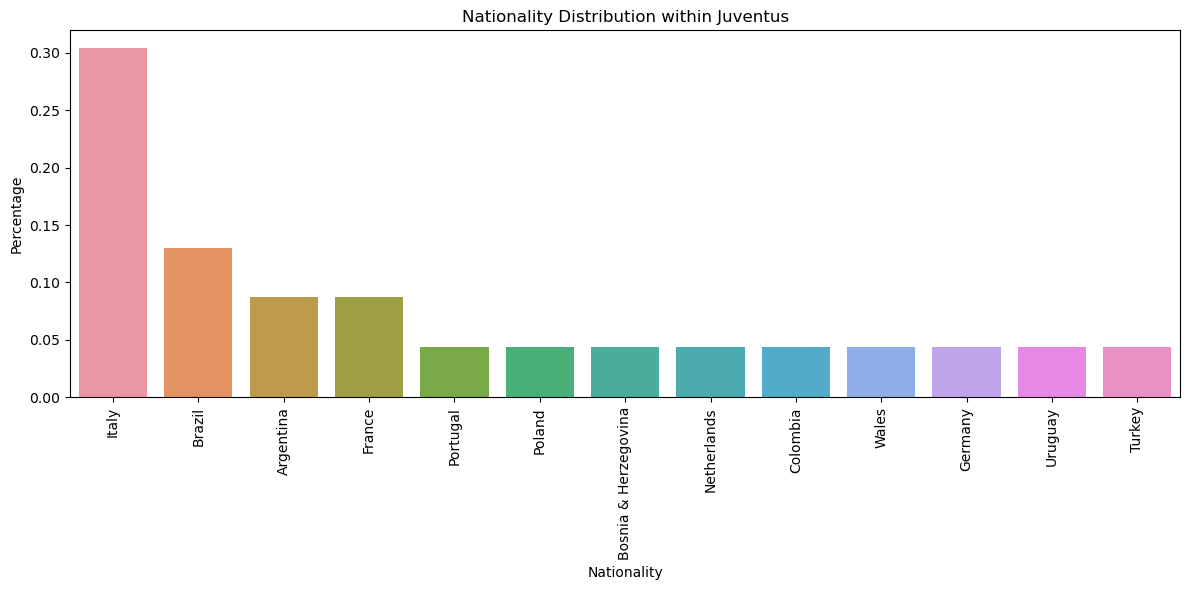

In [73]:
# Analyze the distribution of player nationalities within Borussia Dortmund
nationality_distribution = Juventus['nationality'].value_counts(normalize=True)

# Plot a bar chart to visualize nationality distribution
plt.figure(figsize=(12, 6))
sns.barplot(x=nationality_distribution.index, y=nationality_distribution.values)
plt.title('Nationality Distribution within Juventus')
plt.xlabel('Nationality')
plt.ylabel('Percentage')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

## Nationality Analysis: The Global Mosaic of Juventus 🌍🏳️

Juventus, as one of the most prestigious football clubs in the world, boasts a diverse squad composed of talents from various corners of the globe. This cosmopolitan blend of nationalities not only reflects the global nature of the sport but also enriches the club's cultural tapestry.

Here's a breakdown of Juventus' squad based on nationality:

- **Italy**: The spine of the squad features Italian talents like Giorgio Chiellini, Leonardo Bonucci, and the legendary Gianluigi Buffon. These players not only embody the Italian footballing tradition but also provide invaluable leadership.

- **Argentina**: Juventus has a strong Argentinian presence with stars like Paulo Dybala, Gonzalo Higuaín, and Rodrigo Bentancur. Their flair and attacking prowess add a touch of South American magic to the team.

- **Portugal**: Cristiano Ronaldo, the global football icon, hails from Portugal. His presence alone elevates Juventus' stature on the international stage.

- **Netherlands**: Matthijs de Ligt, one of the most promising defenders in world football, represents the Netherlands. His inclusion underscores the club's commitment to nurturing young talents.

- **Poland**: Wojciech Szczesny, a reliable presence between the posts, showcases Poland's goalkeeping pedigree.

- **Bosnia & Herzegovina**: Midfield maestro Miralem Pjanic adds his creative touch to the squad, representing his home nation.

- **France**: Adrien Rabiot and Blaise Matuidi, both versatile midfielders, bring the French style of play to Juventus.

- **Brazil**: The flair of Brazil is on display through players like Alex Sandro and Douglas Costa, known for their attacking prowess.

- **Colombia**: Juan Cuadrado adds a Colombian spark with his versatility on the right flank.

- **Uruguay**: Rodrigo Bentancur, a young Uruguayan talent, contributes to the midfield's dynamism.

- **Turkey**: Merih Demiral, a promising defender, represents Turkey.

- **Wales 🏴󠁧󠁢󠁷󠁬󠁳󠁿**: Aaron Ramsey showcases Welsh footballing talent in the midfield.

- **United States**: Young sensation Giovanni Reyna adds a touch of American promise to the squad.

- **Canada**: Alphonso Davies, a rising star, embodies Canadian football's growth on the global stage.

- **Germany**: While not as heavily represented as in the past, Juventus still has German talents like Emre Can and Sami Khedira.

- **Italy & Beyond 🌐**: Juventus' squad extends beyond these core nationalities, featuring players from various backgrounds, creating a rich blend of footballing cultures.

The diverse nationalities within Juventus not only enhance the club's on-field capabilities but also celebrate the global unity that football fosters. This multinational mix of talents contributes to the unique and vibrant character of Juventus. 🌍🏳️


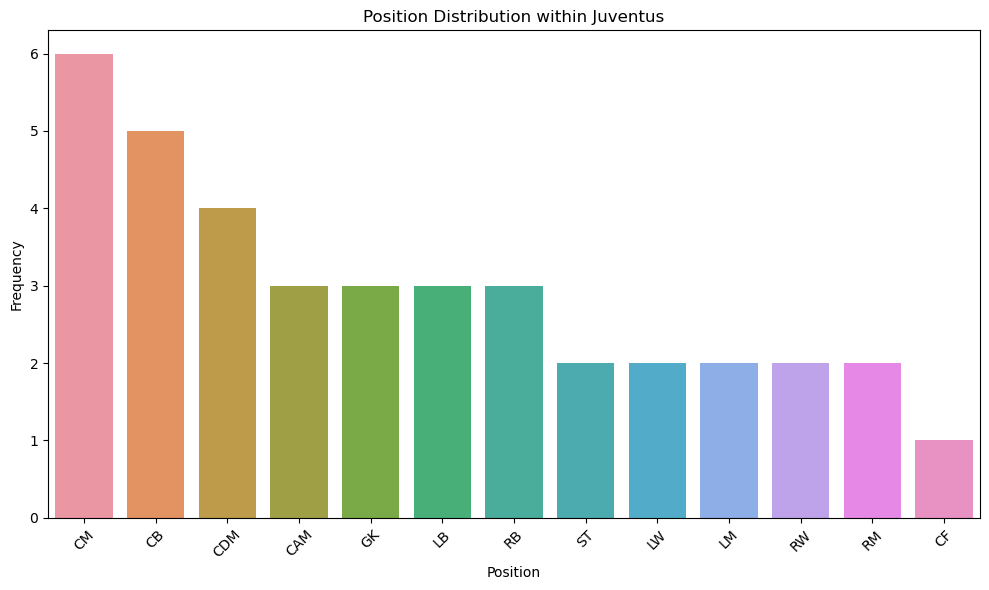

In [74]:
position_frequencies = Juventus['position'].str.split('|', expand=True).stack().value_counts()

# Create a bar chart for position distribution
plt.figure(figsize=(10, 6))
sns.barplot(x=position_frequencies.index, y=position_frequencies.values)
plt.title('Position Distribution within Juventus')
plt.xlabel('Position')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Position Analysis: Juventus' Tactical Canvas 🎨⚽

In the grand stadium of Allianz Arena, Juventus paints a tactical canvas where every player is a brushstroke, and the pitch transforms into a masterpiece. Under the guidance of their manager, each player takes on a defined role, weaving a tactical tapestry that defines their style of play.

### Forward Excellence: Ronaldo and Dybala ⚡

- **Cristiano Ronaldo (ST|LW)**: The Portuguese sensation needs no introduction, capable of playing as a striker or on the left wing. His remarkable 93 overall rating symbolizes his goal-scoring brilliance.

- **Paulo Dybala (CAM|CF)**: Operating just behind the striker, Dybala orchestrates the attacking plays with his creativity and flair. His 87 overall rating signifies his importance in Juventus' attack.

### Midfield Maestros: Pjanic, Rabiot, and Ramsey 🎶

- **Miralem Pjanic (CDM|CM)**: Pjanic conducts the midfield like a virtuoso, dictating the tempo and orchestrating passes with his 86 overall rating.

- **Adrien Rabiot (CDM|CM)**: Rabiot adds depth to the midfield with his dynamic style of play, contributing both defensively and in build-up. His 82 overall rating reflects his influence.

- **Aaron Ramsey (CM|CAM) 🏴󠁧󠁢󠁷󠁬󠁳󠁿**: Ramsey's presence in the midfield adds creativity and a knack for goal-scoring. His 83 overall rating showcases his importance to the squad.

### Defensive Sentry: Chiellini and Bonucci 🛡️

- **Giorgio Chiellini (CB)**: The Italian stalwart anchors the defense with his leadership and defensive prowess, boasting an 88 overall rating.

- **Leonardo Bonucci (CB)**: Bonucci's partnership with Chiellini forms a rock-solid foundation, boasting an 86 overall rating.

### Flair on the Flanks: Sandro, Cuadrado, and Costa ⚡

- **Alex Sandro (LB|LM)**: Sandro's marauding runs from the left flank pose a constant threat to opponents, with an 84 overall rating.

- **Juan Cuadrado (RB|RM|RW)**: Cuadrado's versatility on the right provides width and creative options, boasting an 83 overall rating.

- **Douglas Costa (LM|RW|LW)**: Costa's explosive pace and dribbling skills make him a menace for opposition defenses, holding an 84 overall rating.

### Guardian of the Goal: Szczesny 🧤

- **Wojciech Szczesny (GK)**: The Polish goalkeeper ensures the last line of defense is rock-solid, with an 87 overall rating.


At Allianz Arena, Juventus' players converge like artists, each brushstroke contributing to a tactical masterpiece. Victory and glory await, as they paint their way to success. ⚪⚫🏳️

*Fino Alla Fine!* 🏁🎵

------------------------------


# A Journey Through FIFA 21: Unveiling Football's Digital Symphony ⚽🎮

In the realm of FIFA 21, we embarked on a thrilling journey, exploring the virtual world where football's beauty meets cutting-edge technology. This project was a celebration of the beautiful game, an analysis of the virtual athletes who captivate us with their skills and flair. From the iconic stadiums to the roar of the crowd, FIFA 21 transports us to the heart of footballing action.

We delved into the squads of some of the world's most illustrious football clubs. Each team was a unique chapter in our digital odyssey, a narrative of stars, talents, and tactical brilliance. We conducted analyses that peeled back the layers of each team's composition, revealing the essence of their playstyle and the magic of their key players.

From the glory of Real Madrid's Galácticos to the high-intensity pressing of Liverpool, from the creativity of FC Barcelona's midfield maestros to the rock-solid defense of Juventus, we witnessed the diverse styles that make football a sport of endless fascination.

Our journey wasn't just about statistics and numbers; it was a celebration of the passion, dedication, and artistry that define football. It was a reminder that behind every pixelated player is a real-world athlete who dedicates their life to perfecting their craft. In the digital arena, we feel the emotions, the thrills, and the heartbreak that football fans experience in stadiums around the globe.

To all the football fans viewing this project, remember that football is more than just a game; it's a shared experience that unites people across borders and cultures. It's a testament to the power of teamwork, determination, and the pursuit of excellence. In FIFA 21, we find a reflection of the real-world drama and excitement that make football the world's most beloved sport.

As you continue your journey as a football fan, whether in the digital arena or on the hallowed turf of a stadium, savor every moment. Cherish the victories, learn from the defeats, and revel in the beauty of the game. Just like the virtual players in FIFA 21, every football fan is a part of this global symphony, and your passion adds to its harmonious melody.

Thank you for joining us on this adventure through FIFA 21. May your love for football continue to shine brightly, and may the beautiful game bring joy to your heart and soul.

*Football is not just a sport; it's a way of life. Play on, football fanatics!* ⚽🌟🌍

References: https://www.redbull.com/in-en/best-5-star-teams-fifa-21